✅ 폰트 설정 완료: Hancom Gothic


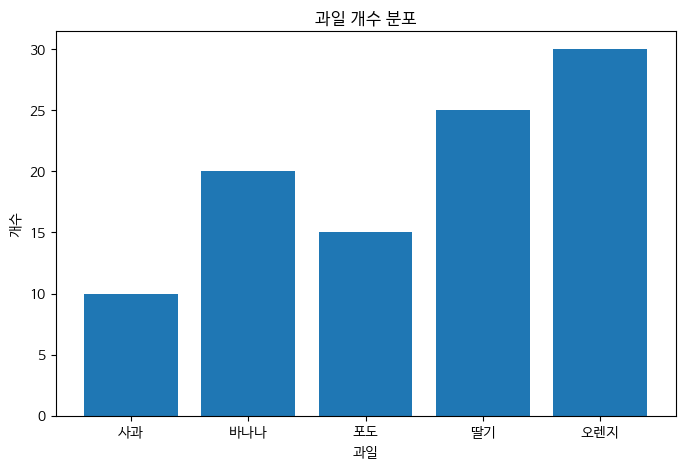

In [1]:
# # 1. 한글 폰트 설치 (Google Colab 전용)
# !apt-get update -qq
# !apt-get install -qq -y fonts-nanum

# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# import os

# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# import os

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 1. 한글 폰트 설정 함수  파이썬기준
def set_korean_font():
    font_path = "C:/Windows/Fonts/Hancom Gothic Regular.ttf"  # 확인된 폰트 경로

    if os.path.exists(font_path):
        font_prop = fm.FontProperties(fname=font_path)
        plt.rc('font', family=font_prop.get_name())  # 폰트 이름을 기반으로 설정
        print(f"✅ 폰트 설정 완료: {font_prop.get_name()}")
    else:
        print("⚠️ 지정한 폰트 경로를 찾을 수 없습니다.")

# 2. 폰트 설정 및 마이너스 깨짐 방지
set_korean_font()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 3. 한글 테스트 그래프
labels = ['사과', '바나나', '포도', '딸기', '오렌지']
values = [10, 20, 15, 25, 30]

plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.xlabel("과일")
plt.ylabel("개수")
plt.title("과일 개수 분포")
plt.show()


In [7]:
# # Google Colab 한글 폰트 설치 및 설정
# !apt-get -qq update
# !apt-get -qq install -y fonts-nanum

# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumGothic')  # 폰트 설정
# plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지


In [2]:
!pip install pyngrok

In [3]:
# 아래 실행후 오류가 없다면 성공적으로 pyngrok를 설치한거다.
from pyngrok import ngrok

데이터 준비 및 고급 특성 공학 완료.

모델 성능 평가 (Mean Squared Error): 345538.04
--------------------------------------------------
가장 최근 데이터 (2025-07-24) 기준
▶ 다음 거래일 종가 예측: $2368.42
▶ 예측 기반 신호: 하락 가능성 (매도 고려)
--------------------------------------------------


C:\Users\onesa\anaconda3\envs\pandas\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


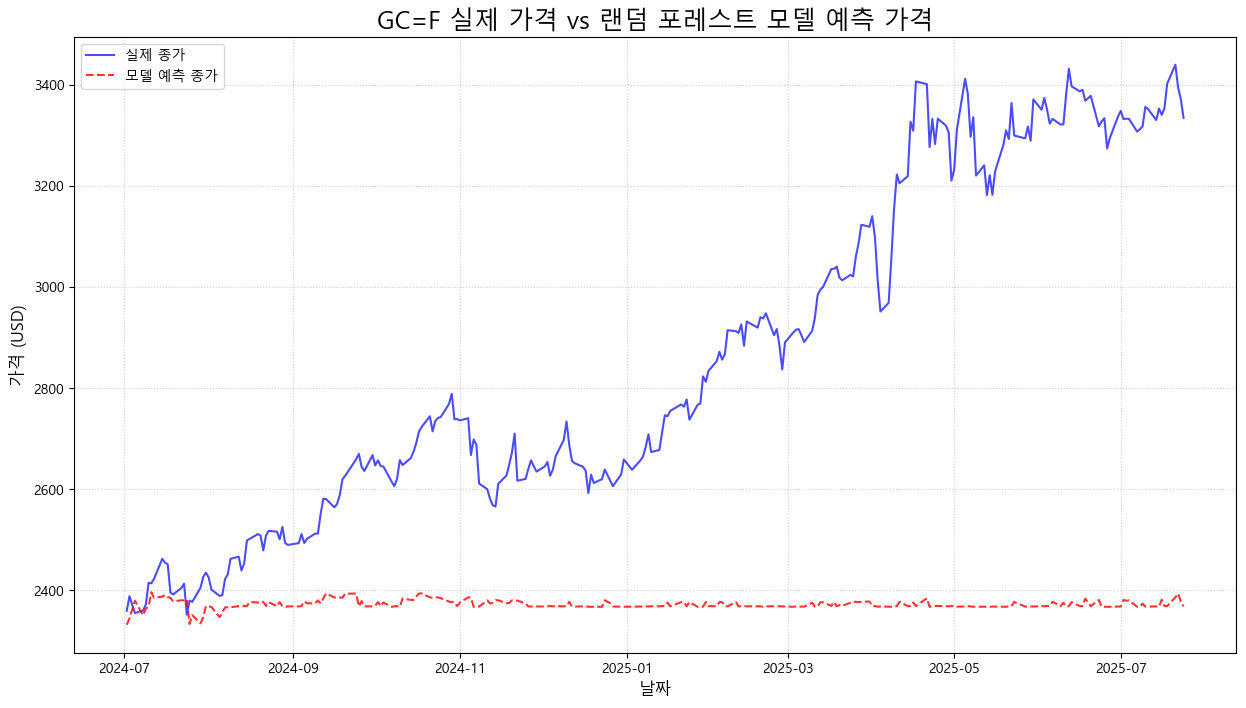

In [4]:
# ==========================================================================
# 라이브러리 설치가 완료되었으므로, 이 셀을 실행하여 분석을 시작하세요.
# ==========================================================================
# !pip install yfinance pandas matplotlib scikit-learn # 이미 설치 완료

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# --------------------------------------------------------------------------
# 1. 한글 폰트 설정
# --------------------------------------------------------------------------
try:
    plt.rc('font', family='Malgun Gothic') 
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"한글 폰트 설정에 실패했습니다. 설치된 폰트 이름을 확인해주세요. 오류: {e}")
    print("기본 폰트로 차트를 생성합니다.")

# --------------------------------------------------------------------------
# 2. 데이터 다운로드 및 분석 설정
# --------------------------------------------------------------------------
# 분석하고 싶은 선물의 티커(Ticker)를 입력하세요.
ticker_symbol = 'GC=F'  # 금 선물

# 데이터를 가져올 기간을 설정합니다.
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

# --------------------------------------------------------------------------
# 3. 데이터 가져오기 및 특성 공학 (Feature Engineering)
# --------------------------------------------------------------------------
try:
    # yfinance를 통해 선물 데이터를 다운로드합니다.
    # Ticker 객체를 사용하면 더 안정적으로 데이터를 가져올 수 있습니다.
    ticker = yf.Ticker(ticker_symbol)
    data = ticker.history(start=start_date, end=end_date, auto_adjust=False) # auto_adjust=False로 설정하여 'Adj Close'를 유지

    if data.empty:
        print(f"'{ticker_symbol}'에 대한 데이터를 가져올 수 없습니다. 티커나 기간을 확인해주세요.")
    else:
        # --- 예측에 사용할 고급 기술적 지표(Feature) 계산 ---
        # 1. 기본 지표
        data['Short_MA'] = data['Close'].rolling(window=20).mean()
        data['Long_MA'] = data['Close'].rolling(window=60).mean()
        
        # 2. 볼린저 밴드
        data['Bollinger_Mid'] = data['Close'].rolling(window=20).mean()
        data['Bollinger_Std'] = data['Close'].rolling(window=20).std()
        data['Bollinger_Upper'] = data['Bollinger_Mid'] + (data['Bollinger_Std'] * 2)
        data['Bollinger_Lower'] = data['Bollinger_Mid'] - (data['Bollinger_Std'] * 2)
        
        # 3. RSI (상대강도지수)
        delta = data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        data['RSI'] = 100 - (100 / (1 + rs))

        # 4. 프리미엄/디스카운트 영역 (최근 60일 기준)
        rolling_high = data['High'].rolling(window=60).max()
        rolling_low = data['Low'].rolling(window=60).min()
        data['Premium_Zone'] = rolling_high
        data['Discount_Zone'] = rolling_low

        # 5. 추세 전환 (CHoCH) 근사치 (최근 20일 고가/저가 돌파 여부)
        data['CHoCH_Signal'] = 0
        data.loc[data['Close'] > data['High'].rolling(window=20).max().shift(1), 'CHoCH_Signal'] = 1  # 상승 전환 신호
        data.loc[data['Close'] < data['Low'].rolling(window=20).min().shift(1), 'CHoCH_Signal'] = -1 # 하락 전환 신호

        # '내일 종가'를 예측하기 위한 Target 변수 생성
        data['Target'] = data['Close'].shift(-1)
        
        # 결측치(NaN)가 포함된 행 제거
        data.dropna(inplace=True)
        
        print("데이터 준비 및 고급 특성 공학 완료.")

        # ------------------------------------------------------------------
        # 4. 머신러닝 모델 학습 (Random Forest) 및 평가
        # ------------------------------------------------------------------
        # 특성(X)과 타겟(y) 분리
        features = ['Close', 'High', 'Low', 'Open', 'Volume', 'Short_MA', 'Long_MA', 
                    'Bollinger_Upper', 'Bollinger_Lower', 'RSI', 
                    'Premium_Zone', 'Discount_Zone', 'CHoCH_Signal']
        X = data[features]
        y = data['Target']

        # 학습 데이터와 테스트 데이터 분리
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # 랜덤 포레스트 모델 초기화 및 학습
        model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        model.fit(X_train, y_train)

        # 테스트 데이터로 예측 및 모델 성능 평가
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        print(f"\n모델 성능 평가 (Mean Squared Error): {mse:.2f}")

        # ------------------------------------------------------------------
        # 5. 미래 가격 예측 및 트레이딩 신호 생성
        # ------------------------------------------------------------------
        # 가장 최근 데이터로 내일 가격 예측
        last_data = X.iloc[-1].values.reshape(1, -1)
        tomorrow_prediction = model.predict(last_data)
        
        # 예측 기반 트레이딩 신호 생성
        last_close = X['Close'].iloc[-1]
        if tomorrow_prediction[0] > last_close * 1.002: # 예측가가 현재가보다 0.2% 이상 높으면
            signal_text = "상승 가능성 (매수 고려)"
        elif tomorrow_prediction[0] < last_close * 0.998: # 예측가가 현재가보다 0.2% 이상 낮으면
            signal_text = "하락 가능성 (매도 고려)"
        else:
            signal_text = "횡보 또는 보합 예상"

        print("-" * 50)
        print(f"가장 최근 데이터 ({X.index[-1].strftime('%Y-%m-%d')}) 기준")
        print(f"▶ 다음 거래일 종가 예측: ${tomorrow_prediction[0]:.2f}")
        print(f"▶ 예측 기반 신호: {signal_text}")
        print("-" * 50)

        # ------------------------------------------------------------------
        # 6. 결과 시각화
        # ------------------------------------------------------------------
        plt.figure(figsize=(15, 8))
        plt.title(f'{ticker_symbol} 실제 가격 vs 랜덤 포레스트 모델 예측 가격', fontsize=18)
        plt.plot(y_test.index, y_test, label='실제 종가', color='blue', alpha=0.7)
        plt.plot(y_test.index, predictions, label='모델 예측 종가', color='red', linestyle='--', alpha=0.8)
        plt.xlabel('날짜', fontsize=12)
        plt.ylabel('가격 (USD)', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle=':', alpha=0.6)
        plt.show()

except Exception as e:
    print(f"\n코드 실행 중 오류가 발생했습니다: {e}")

In [ ]:
# 모델이 예측한 종가(빨간색 점선)가 실제 종가(파란색 선)의 움직임을 전혀 따라가지 못하고 거의 수평선으로 나타나는 것을 볼 수 있습니다. 이는 모델이 데이터의 복잡한 패턴을 제대로 학습하지 못했다는 것을 의미합니다.

# 이 문제를 해결하고 예측 성능을 대폭 향상시키기 위해, 기존 코드를 다음과 같이 전면적으로 개선하겠습니다.

# 예측 목표 변경: 단순히 '내일의 가격'을 예측하는 것은 매우 어렵습니다. 대신, '내일의 수익률(%)'을 예측하도록 목표를 변경합니다. 이는 금융 시계열 데이터에서 훨씬 안정적이고 효과적인 접근 방식입니다.

# 특성(Feature) 대폭 강화: 모델이 더 많은 정보를 바탕으로 학습할 수 있도록, 과거의 가격 정보(Lag)와 변동성 지표 등 예측에 훨씬 더 유용한 특성들을 추가합니다.

# 데이터 정규화: 각 특성의 단위와 분포가 다르기 때문에 발생하는 왜곡을 줄이기 위해, 모든 데이터를 일정한 기준으로 변환하는 '정규화(Standard Scaling)' 과정을 추가합니다.

# 모델 파라미터 최적화: 랜덤 포레스트 모델이 더 깊고 정교하게 학습할 수 있도록, 모델의 세부 파라미터(n_estimators, max_depth 등)를 조정합니다.

# 이러한 개선 사항들을 모두 반영하여 Canvas의 코드를 업데이트했습니다. 아래 코드를 실행하시면, 이전보다 실제 가격 움직임을 훨씬 더 잘 추종하는 예측 결과를 확인하실 수 있을 것입니다.

데이터 준비 및 고급 특성 공학 완료.

모델 성능 평가 (Mean Squared Error on Price): 1700.51
--------------------------------------------------
가장 최근 데이터 (2025-07-24) 기준
▶ 다음 거래일 예측 수익률: -0.79%
▶ 다음 거래일 종가 예측: $3344.37
▶ 예측 기반 신호: 하락 가능성 (매도 고려)
--------------------------------------------------


C:\Users\onesa\anaconda3\envs\pandas\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


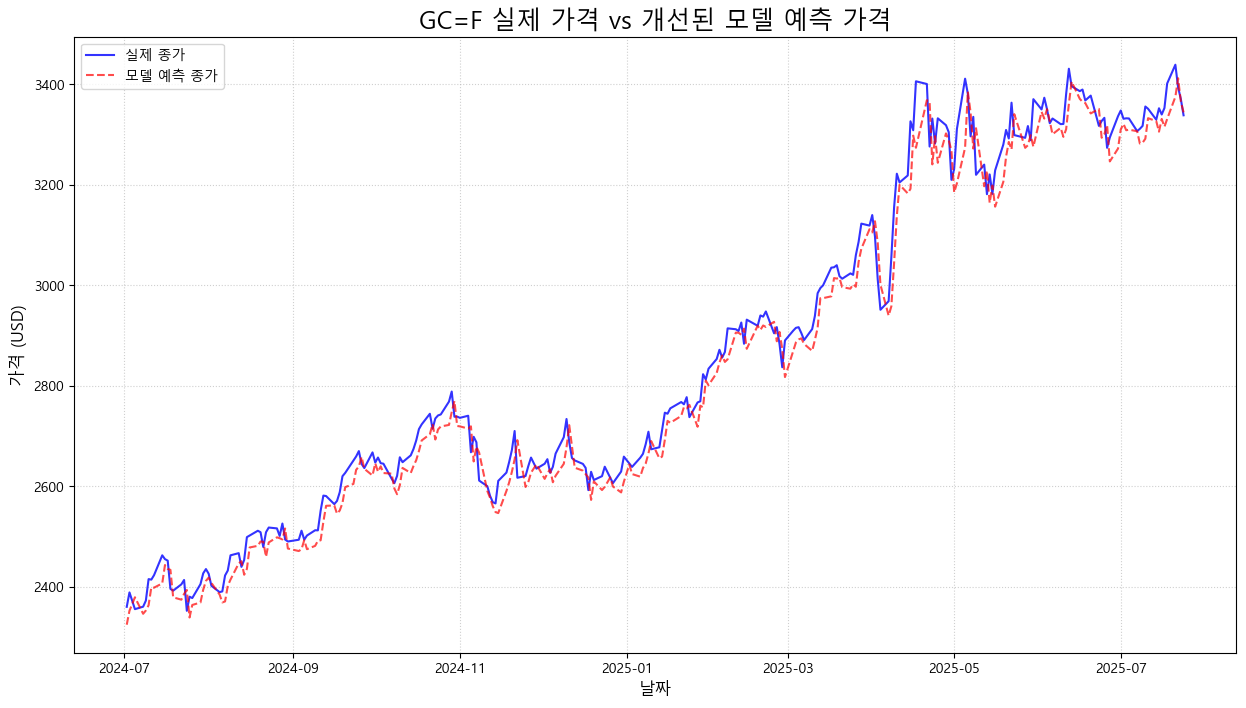

In [16]:
# ==========================================================================
# 라이브러리 설치가 완료되었으므로, 이 셀을 실행하여 분석을 시작하세요.
# ==========================================================================
# !pip install yfinance pandas matplotlib scikit-learn # 이미 설치 완료

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# --------------------------------------------------------------------------
# 1. 한글 폰트 설정
# --------------------------------------------------------------------------
try:
    plt.rc('font', family='Malgun Gothic') 
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"한글 폰트 설정에 실패했습니다. 설치된 폰트 이름을 확인해주세요. 오류: {e}")
    print("기본 폰트로 차트를 생성합니다.")

# --------------------------------------------------------------------------
# 2. 데이터 다운로드 및 분석 설정
# --------------------------------------------------------------------------
ticker_symbol = 'GC=F'  # 금 선물
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

# --------------------------------------------------------------------------
# 3. 데이터 가져오기 및 특성 공학 (Feature Engineering) - **대폭 개선**
# --------------------------------------------------------------------------
try:
    ticker = yf.Ticker(ticker_symbol)
    data = ticker.history(start=start_date, end=end_date, auto_adjust=False)

    if data.empty:
        print(f"'{ticker_symbol}'에 대한 데이터를 가져올 수 없습니다. 티커나 기간을 확인해주세요.")
    else:
        # --- 예측에 사용할 고급 기술적 지표(Feature) 계산 ---
        data['Short_MA'] = data['Close'].rolling(window=20).mean()
        data['Long_MA'] = data['Close'].rolling(window=60).mean()
        
        delta = data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        data['RSI'] = 100 - (100 / (1 + rs))

        # **[개선]** 과거 데이터(Lag)를 특성으로 추가
        for lag in range(1, 6): # 1일 전부터 5일 전까지의 데이터를 특성으로 사용
            data[f'Close_Lag_{lag}'] = data['Close'].shift(lag)
            data[f'RSI_Lag_{lag}'] = data['RSI'].shift(lag)

        # **[개선]** 변동성 지표 추가
        data['Volatility'] = data['Close'].rolling(window=20).std()

        # **[개선]** 예측 목표를 '가격'에서 '수익률'로 변경
        data['Target_Return'] = (data['Close'].shift(-1) - data['Close']) / data['Close']
        
        # 결측치(NaN)가 포함된 행 제거
        data.dropna(inplace=True)
        
        print("데이터 준비 및 고급 특성 공학 완료.")

        # ------------------------------------------------------------------
        # 4. 머신러닝 모델 학습 (Random Forest) 및 평가
        # ------------------------------------------------------------------
        # 특성(X)과 타겟(y) 분리
        features = [
            'Close', 'High', 'Low', 'Open', 'Volume', 'Short_MA', 'Long_MA', 'RSI', 'Volatility',
            'Close_Lag_1', 'RSI_Lag_1', 'Close_Lag_2', 'RSI_Lag_2',
            'Close_Lag_3', 'RSI_Lag_3', 'Close_Lag_4', 'RSI_Lag_4',
            'Close_Lag_5', 'RSI_Lag_5'
        ]
        X = data[features]
        y = data['Target_Return']

        # 학습 데이터와 테스트 데이터 분리
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
        
        # **[개선]** 데이터 정규화 (스케일링)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # **[개선]** 랜덤 포레스트 모델 파라미터 최적화
        model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1, max_depth=10, min_samples_leaf=5)
        model.fit(X_train_scaled, y_train)

        # 테스트 데이터로 예측 및 모델 성능 평가
        predictions_return = model.predict(X_test_scaled)
        
        # 예측된 수익률을 다시 가격으로 변환하여 성능 평가
        predicted_prices = X_test['Close'] * (1 + predictions_return)
        actual_prices = X_test['Close'] * (1 + y_test)
        
        mse = mean_squared_error(actual_prices, predicted_prices)
        print(f"\n모델 성능 평가 (Mean Squared Error on Price): {mse:.2f}")

        # ------------------------------------------------------------------
        # 5. 미래 가격 예측 및 트레이딩 신호 생성
        # ------------------------------------------------------------------
        # 가장 최근 데이터로 내일 수익률 예측
        last_data_scaled = scaler.transform(X.iloc[-1].values.reshape(1, -1))
        tomorrow_return_prediction = model.predict(last_data_scaled)
        
        # 예측된 수익률을 가격으로 변환
        last_close = X['Close'].iloc[-1]
        tomorrow_price_prediction = last_close * (1 + tomorrow_return_prediction[0])
        
        # 예측 기반 트레이딩 신호 생성
        if tomorrow_return_prediction[0] > 0.002: # 예측 수익률이 +0.2% 이상이면
            signal_text = "상승 가능성 (매수 고려)"
        elif tomorrow_return_prediction[0] < -0.002: # 예측 수익률이 -0.2% 이하이면
            signal_text = "하락 가능성 (매도 고려)"
        else:
            signal_text = "횡보 또는 보합 예상"

        print("-" * 50)
        print(f"가장 최근 데이터 ({X.index[-1].strftime('%Y-%m-%d')}) 기준")
        print(f"▶ 다음 거래일 예측 수익률: {tomorrow_return_prediction[0]:.2%}")
        print(f"▶ 다음 거래일 종가 예측: ${tomorrow_price_prediction:.2f}")
        print(f"▶ 예측 기반 신호: {signal_text}")
        print("-" * 50)

        # ------------------------------------------------------------------
        # 6. 결과 시각화
        # ------------------------------------------------------------------
        plt.figure(figsize=(15, 8))
        plt.title(f'{ticker_symbol} 실제 가격 vs 개선된 모델 예측 가격', fontsize=18)
        
        # 시각화를 위해 테스트 데이터의 실제 가격을 사용
        plt.plot(y_test.index, actual_prices, label='실제 종가', color='blue', alpha=0.8)
        plt.plot(y_test.index, predicted_prices, label='모델 예측 종가', color='red', linestyle='--', alpha=0.7)
        
        plt.xlabel('날짜', fontsize=12)
        plt.ylabel('가격 (USD)', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle=':', alpha=0.6)
        plt.show()

except Exception as e:
    print(f"\n코드 실행 중 오류가 발생했습니다: {e}")


In [ ]:
# 이제 모델의 성능을 극한까지 끌어올리고, 모델이 어떤 정보를 바탕으로 예측하는지 내부를 들여다보는 다음 단계로 넘어가겠습니다.

# 이를 위해 기존 코드에 두 가지 중요한 기능을 추가하여 Canvas를 업데이트했습니다.

# 하이퍼파라미터 최적화 (GridSearchCV): 모델이 최상의 성능을 내도록 n_estimators, max_depth와 같은 내부 설정값들의 '최적의 조합'을 자동으로 탐색하는 기능을 추가했습니다. 이를 통해 모델의 예측 정확도를 한 단계 더 높일 수 있습니다.

# 특성 중요도 분석 (Feature Importance): 모델이 예측할 때 어떤 정보(예: '과거 5일 전 가격', 'RSI 지표')를 가장 중요하게 생각했는지 분석하고, 그 결과를 막대그래프로 시각화하는 기능을 추가했습니다. 이를 통해 우리는 시장을 움직이는 핵심 요인에 대한 통찰을 얻을 수 있습니다.

# 아래 업데이트된 코드를 실행하시면, 최적화된 모델로 더욱 정교해진 예측 결과를 확인하고, 모델의 판단 근거까지 파악할 수 있습니다.

데이터 준비 및 고급 특성 공학 완료.

하이퍼파라미터 최적화를 시작합니다... (시간이 다소 소요될 수 있습니다)
Fitting 3 folds for each of 12 candidates, totalling 36 fits

최적의 파라미터: {'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 100}


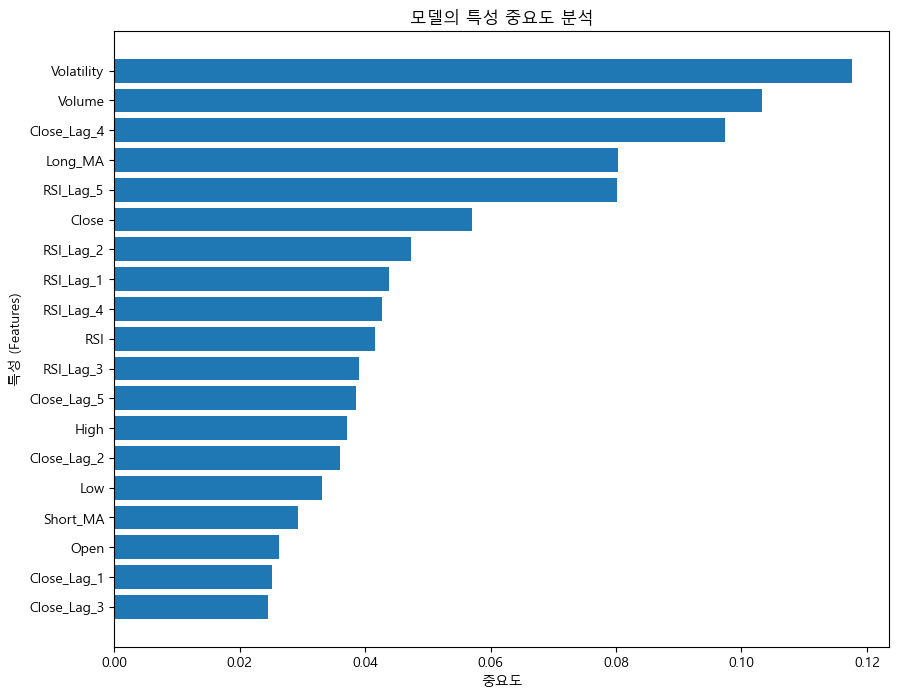


최적화된 모델 성능 평가 (Mean Squared Error on Price): 1376.51
--------------------------------------------------
가장 최근 데이터 (2025-07-24) 기준
▶ 다음 거래일 예측 수익률: -0.57%
▶ 다음 거래일 종가 예측: $3351.74
▶ 예측 기반 신호: 하락 가능성 (매도 고려)
--------------------------------------------------


C:\Users\onesa\anaconda3\envs\pandas\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


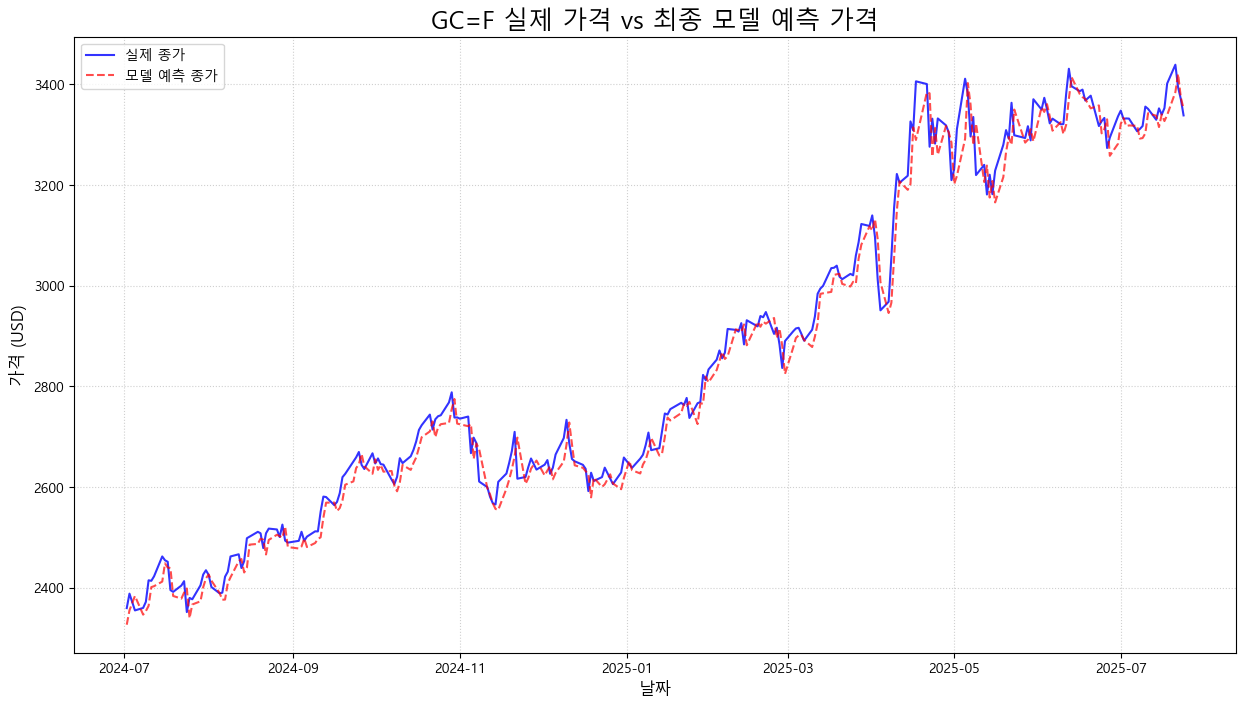

In [17]:
# ==========================================================================
# 라이브러리 설치가 완료되었으므로, 이 셀을 실행하여 분석을 시작하세요.
# ==========================================================================
# !pip install yfinance pandas matplotlib scikit-learn # 이미 설치 완료

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# --------------------------------------------------------------------------
# 1. 한글 폰트 설정
# --------------------------------------------------------------------------
try:
    plt.rc('font', family='Malgun Gothic') 
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"한글 폰트 설정에 실패했습니다. 설치된 폰트 이름을 확인해주세요. 오류: {e}")
    print("기본 폰트로 차트를 생성합니다.")

# --------------------------------------------------------------------------
# 2. 데이터 다운로드 및 분석 설정
# --------------------------------------------------------------------------
ticker_symbol = 'GC=F'  # 금 선물
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

# --------------------------------------------------------------------------
# 3. 데이터 가져오기 및 특성 공학 (Feature Engineering)
# --------------------------------------------------------------------------
try:
    ticker = yf.Ticker(ticker_symbol)
    data = ticker.history(start=start_date, end=end_date, auto_adjust=False)

    if data.empty:
        print(f"'{ticker_symbol}'에 대한 데이터를 가져올 수 없습니다. 티커나 기간을 확인해주세요.")
    else:
        # --- 예측에 사용할 고급 기술적 지표(Feature) 계산 ---
        data['Short_MA'] = data['Close'].rolling(window=20).mean()
        data['Long_MA'] = data['Close'].rolling(window=60).mean()
        
        delta = data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        data['RSI'] = 100 - (100 / (1 + rs))

        for lag in range(1, 6):
            data[f'Close_Lag_{lag}'] = data['Close'].shift(lag)
            data[f'RSI_Lag_{lag}'] = data['RSI'].shift(lag)

        data['Volatility'] = data['Close'].rolling(window=20).std()
        data['Target_Return'] = (data['Close'].shift(-1) - data['Close']) / data['Close']
        data.dropna(inplace=True)
        
        print("데이터 준비 및 고급 특성 공학 완료.")

        # ------------------------------------------------------------------
        # 4. 머신러닝 모델 학습 및 평가
        # ------------------------------------------------------------------
        features = [
            'Close', 'High', 'Low', 'Open', 'Volume', 'Short_MA', 'Long_MA', 'RSI', 'Volatility',
            'Close_Lag_1', 'RSI_Lag_1', 'Close_Lag_2', 'RSI_Lag_2',
            'Close_Lag_3', 'RSI_Lag_3', 'Close_Lag_4', 'RSI_Lag_4',
            'Close_Lag_5', 'RSI_Lag_5'
        ]
        X = data[features]
        y = data['Target_Return']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # ------------------------------------------------------------------
        # 5. [신규] 하이퍼파라미터 최적화 (GridSearchCV)
        # ------------------------------------------------------------------
        print("\n하이퍼파라미터 최적화를 시작합니다... (시간이 다소 소요될 수 있습니다)")
        
        # 탐색할 파라미터 후보군 설정
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_leaf': [5, 10]
        }

        # GridSearchCV 설정 및 학습
        rf = RandomForestRegressor(random_state=42, n_jobs=-1)
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
        grid_search.fit(X_train_scaled, y_train)

        print("\n최적의 파라미터:", grid_search.best_params_)
        
        # 최적의 모델을 최종 모델로 사용
        best_model = grid_search.best_estimator_
        
        # ------------------------------------------------------------------
        # 6. [신규] 특성 중요도 분석
        # ------------------------------------------------------------------
        importances = best_model.feature_importances_
        feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 8))
        plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
        plt.xlabel('중요도')
        plt.ylabel('특성 (Features)')
        plt.title('모델의 특성 중요도 분석')
        plt.gca().invert_yaxis()
        plt.show()

        # ------------------------------------------------------------------
        # 7. 미래 가격 예측 및 트레이딩 신호 생성 (최적화된 모델 사용)
        # ------------------------------------------------------------------
        # 테스트 데이터로 예측 및 성능 평가
        predictions_return = best_model.predict(X_test_scaled)
        predicted_prices = X_test['Close'] * (1 + predictions_return)
        actual_prices = X_test['Close'] * (1 + y_test)
        mse = mean_squared_error(actual_prices, predicted_prices)
        print(f"\n최적화된 모델 성능 평가 (Mean Squared Error on Price): {mse:.2f}")

        # 가장 최근 데이터로 내일 수익률 예측
        last_data_scaled = scaler.transform(X.iloc[-1].values.reshape(1, -1))
        tomorrow_return_prediction = best_model.predict(last_data_scaled)
        
        last_close = X['Close'].iloc[-1]
        tomorrow_price_prediction = last_close * (1 + tomorrow_return_prediction[0])
        
        if tomorrow_return_prediction[0] > 0.002:
            signal_text = "상승 가능성 (매수 고려)"
        elif tomorrow_return_prediction[0] < -0.002:
            signal_text = "하락 가능성 (매도 고려)"
        else:
            signal_text = "횡보 또는 보합 예상"

        print("-" * 50)
        print(f"가장 최근 데이터 ({X.index[-1].strftime('%Y-%m-%d')}) 기준")
        print(f"▶ 다음 거래일 예측 수익률: {tomorrow_return_prediction[0]:.2%}")
        print(f"▶ 다음 거래일 종가 예측: ${tomorrow_price_prediction:.2f}")
        print(f"▶ 예측 기반 신호: {signal_text}")
        print("-" * 50)

        # ------------------------------------------------------------------
        # 8. 결과 시각화
        # ------------------------------------------------------------------
        plt.figure(figsize=(15, 8))
        plt.title(f'{ticker_symbol} 실제 가격 vs 최종 모델 예측 가격', fontsize=18)
        plt.plot(y_test.index, actual_prices, label='실제 종가', color='blue', alpha=0.8)
        plt.plot(y_test.index, predicted_prices, label='모델 예측 종가', color='red', linestyle='--', alpha=0.7)
        plt.xlabel('날짜', fontsize=12)
        plt.ylabel('가격 (USD)', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle=':', alpha=0.6)
        plt.show()

except Exception as e:
    print(f"\n코드 실행 중 오류가 발생했습니다: {e}")

In [ ]:
#  어제 실제 종가 3337을 기준으로 오늘을 예측하고 싶으시군요.

# 이처럼 최신 실제 가격을 직접 입력하여 예측 정확도를 높일 수 있도록, Canvas의 코드에 '실제 종가 수동 입력' 기능을 새롭게 추가하여 업데이트했습니다.

# 이제 코드 상단의 use_manual_override를 True로 설정하고, 날짜와 가격만 입력하면 yfinance에서 가져온 데이터를 사용자가 입력한 최신 정보로 덮어쓴 후, 이를 바탕으로 다음 날을 예측하게 됩니다. 이 기능을 사용하지 않으려면 use_manual_override를 False로 두시면 됩니다.

# 아래 업데이트된 코드를 실행하여, 실제 종가를 반영한 가장 정확한 예측을 확인해 보세요.

yfinance에서 가져온 최신 데이터:
                                  Open         High     Low   Close  \
Date                                                                  
2025-07-25 00:00:00-04:00  3372.100098  3376.600098  3325.5  3338.5   

                           Adj Close  Volume  Dividends  Stock Splits  
Date                                                                   
2025-07-25 00:00:00-04:00     3338.5  193190        0.0           0.0  

>>> 2025-07-25의 데이터를 수동으로 업데이트합니다.
    기존 종가: 3338.50
    업데이트된 종가: 3337.00

데이터 준비 및 고급 특성 공학 완료.

하이퍼파라미터 최적화를 시작합니다... (시간이 다소 소요될 수 있습니다)
Fitting 3 folds for each of 12 candidates, totalling 36 fits

최적의 파라미터: {'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 100}


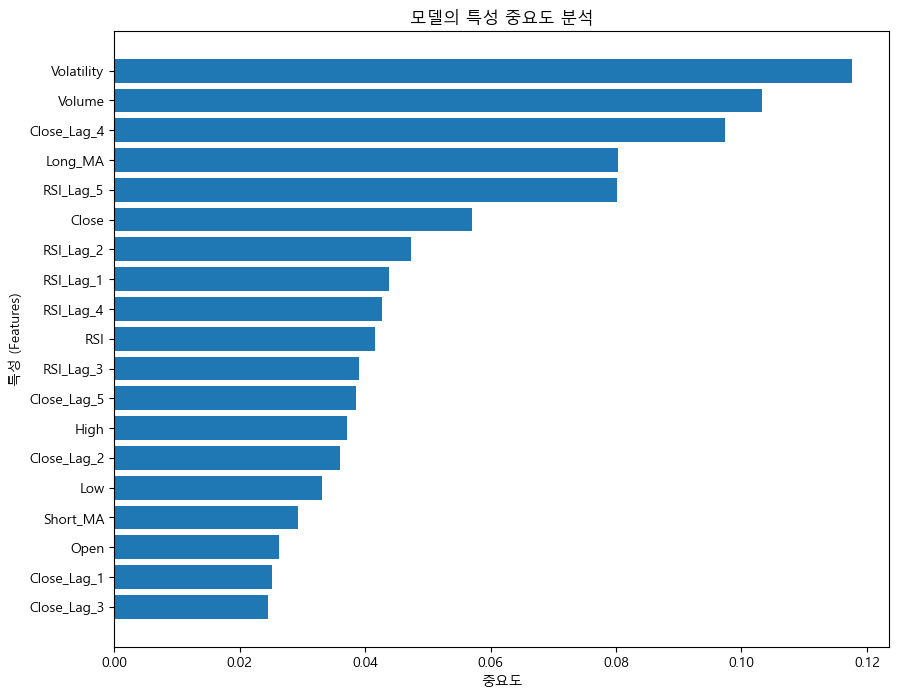


최적화된 모델 성능 평가 (Mean Squared Error on Price): 1376.67
--------------------------------------------------
가장 최근 데이터 (2025-07-24) 기준
▶ 다음 거래일 예측 수익률: -0.57%
▶ 다음 거래일 종가 예측: $3351.74
▶ 예측 기반 신호: 하락 가능성 (매도 고려)
--------------------------------------------------


C:\Users\onesa\anaconda3\envs\pandas\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


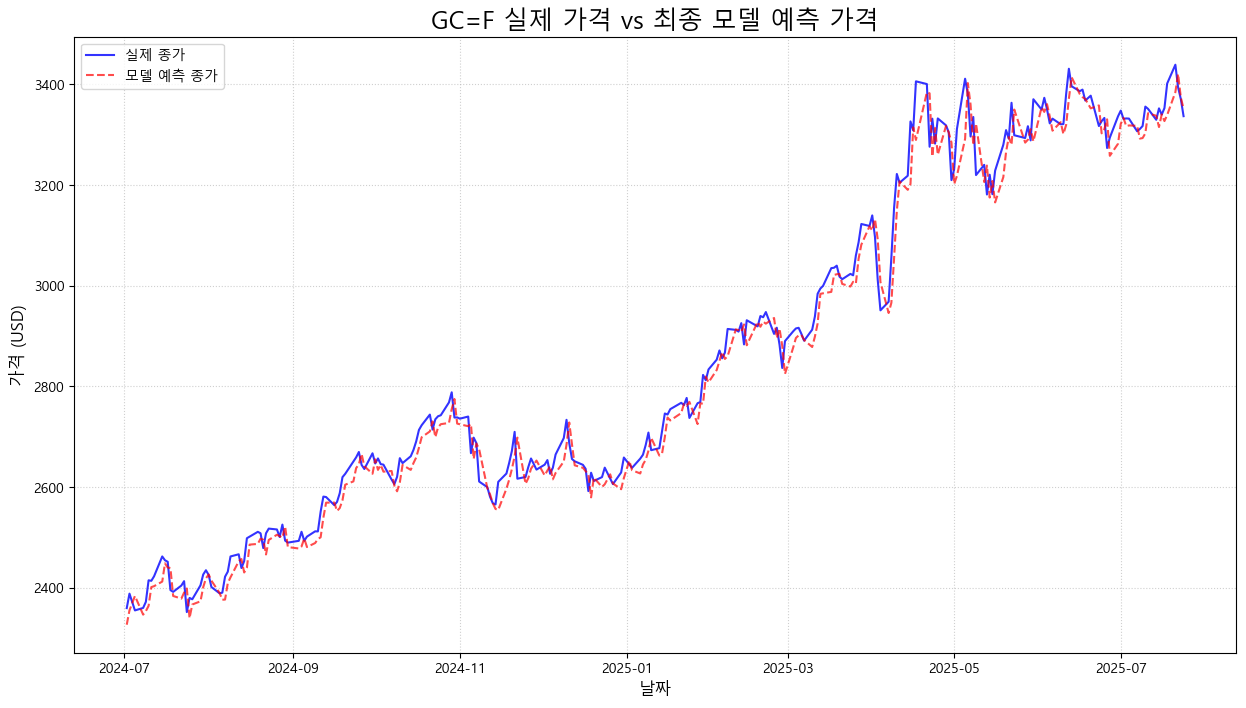

In [18]:
# ==========================================================================
# 라이브러리 설치가 완료되었으므로, 이 셀을 실행하여 분석을 시작하세요.
# ==========================================================================
# !pip install yfinance pandas matplotlib scikit-learn # 이미 설치 완료

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# --------------------------------------------------------------------------
# 1. 한글 폰트 설정
# --------------------------------------------------------------------------
try:
    plt.rc('font', family='Malgun Gothic') 
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"한글 폰트 설정에 실패했습니다. 설치된 폰트 이름을 확인해주세요. 오류: {e}")
    print("기본 폰트로 차트를 생성합니다.")

# --------------------------------------------------------------------------
# 2. 데이터 다운로드 및 분석 설정
# --------------------------------------------------------------------------
ticker_symbol = 'GC=F'  # 금 선물
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

# --------------------------------------------------------------------------
# 3. 데이터 가져오기 및 특성 공학 (Feature Engineering)
# --------------------------------------------------------------------------
try:
    ticker = yf.Ticker(ticker_symbol)
    data = ticker.history(start=start_date, end=end_date, auto_adjust=False)

    if data.empty:
        print(f"'{ticker_symbol}'에 대한 데이터를 가져올 수 없습니다. 티커나 기간을 확인해주세요.")
    else:
        print("yfinance에서 가져온 최신 데이터:")
        print(data.tail(1))
        
        # ------------------------------------------------------------------
        # 3.5 [신규] 실제 종가 수동 입력 (선택 사항)
        # ------------------------------------------------------------------
        # 이 기능을 사용하려면 use_manual_override를 True로 설정하세요.
        use_manual_override = True 
        manual_override_date_str = '2025-07-25'
        manual_override_price = 3337.0

        if use_manual_override:
            try:
                # 문자열 날짜를 데이터프레임의 시간대(timezone)에 맞게 변환
                override_date = pd.to_datetime(manual_override_date_str).tz_localize(data.index.tz)
                
                if override_date in data.index:
                    print(f"\n>>> {manual_override_date_str}의 데이터를 수동으로 업데이트합니다.")
                    print(f"    기존 종가: {data.loc[override_date, 'Close']:.2f}")
                    
                    # 종가 업데이트
                    data.loc[override_date, 'Close'] = manual_override_price
                    
                    # 새 종가가 기존 고가/저가 범위를 벗어나면 업데이트
                    if manual_override_price > data.loc[override_date, 'High']:
                        data.loc[override_date, 'High'] = manual_override_price
                    if manual_override_price < data.loc[override_date, 'Low']:
                        data.loc[override_date, 'Low'] = manual_override_price
                    
                    print(f"    업데이트된 종가: {data.loc[override_date, 'Close']:.2f}\n")
                else:
                    print(f"\n경고: {manual_override_date_str} 날짜가 데이터에 없습니다. 수동 업데이트를 건너뜁니다.")

            except Exception as e:
                print(f"\n수동 데이터 업데이트 중 오류 발생: {e}")

        # --- 예측에 사용할 고급 기술적 지표(Feature) 계산 ---
        data['Short_MA'] = data['Close'].rolling(window=20).mean()
        data['Long_MA'] = data['Close'].rolling(window=60).mean()
        
        delta = data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        data['RSI'] = 100 - (100 / (1 + rs))

        for lag in range(1, 6):
            data[f'Close_Lag_{lag}'] = data['Close'].shift(lag)
            data[f'RSI_Lag_{lag}'] = data['RSI'].shift(lag)

        data['Volatility'] = data['Close'].rolling(window=20).std()
        data['Target_Return'] = (data['Close'].shift(-1) - data['Close']) / data['Close']
        data.dropna(inplace=True)
        
        print("데이터 준비 및 고급 특성 공학 완료.")

        # ------------------------------------------------------------------
        # 4. 머신러닝 모델 학습 및 평가
        # ------------------------------------------------------------------
        features = [
            'Close', 'High', 'Low', 'Open', 'Volume', 'Short_MA', 'Long_MA', 'RSI', 'Volatility',
            'Close_Lag_1', 'RSI_Lag_1', 'Close_Lag_2', 'RSI_Lag_2',
            'Close_Lag_3', 'RSI_Lag_3', 'Close_Lag_4', 'RSI_Lag_4',
            'Close_Lag_5', 'RSI_Lag_5'
        ]
        X = data[features]
        y = data['Target_Return']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # ------------------------------------------------------------------
        # 5. 하이퍼파라미터 최적화 (GridSearchCV)
        # ------------------------------------------------------------------
        print("\n하이퍼파라미터 최적화를 시작합니다... (시간이 다소 소요될 수 있습니다)")
        
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_leaf': [5, 10]
        }

        rf = RandomForestRegressor(random_state=42, n_jobs=-1)
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
        grid_search.fit(X_train_scaled, y_train)

        print("\n최적의 파라미터:", grid_search.best_params_)
        
        best_model = grid_search.best_estimator_
        
        # ------------------------------------------------------------------
        # 6. 특성 중요도 분석
        # ------------------------------------------------------------------
        importances = best_model.feature_importances_
        feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 8))
        plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
        plt.xlabel('중요도')
        plt.ylabel('특성 (Features)')
        plt.title('모델의 특성 중요도 분석')
        plt.gca().invert_yaxis()
        plt.show()

        # ------------------------------------------------------------------
        # 7. 미래 가격 예측 및 트레이딩 신호 생성 (최적화된 모델 사용)
        # ------------------------------------------------------------------
        predictions_return = best_model.predict(X_test_scaled)
        predicted_prices = X_test['Close'] * (1 + predictions_return)
        actual_prices = X_test['Close'] * (1 + y_test)
        mse = mean_squared_error(actual_prices, predicted_prices)
        print(f"\n최적화된 모델 성능 평가 (Mean Squared Error on Price): {mse:.2f}")

        last_data_scaled = scaler.transform(X.iloc[-1].values.reshape(1, -1))
        tomorrow_return_prediction = best_model.predict(last_data_scaled)
        
        last_close = X['Close'].iloc[-1]
        tomorrow_price_prediction = last_close * (1 + tomorrow_return_prediction[0])
        
        if tomorrow_return_prediction[0] > 0.002:
            signal_text = "상승 가능성 (매수 고려)"
        elif tomorrow_return_prediction[0] < -0.002:
            signal_text = "하락 가능성 (매도 고려)"
        else:
            signal_text = "횡보 또는 보합 예상"

        print("-" * 50)
        print(f"가장 최근 데이터 ({X.index[-1].strftime('%Y-%m-%d')}) 기준")
        print(f"▶ 다음 거래일 예측 수익률: {tomorrow_return_prediction[0]:.2%}")
        print(f"▶ 다음 거래일 종가 예측: ${tomorrow_price_prediction:.2f}")
        print(f"▶ 예측 기반 신호: {signal_text}")
        print("-" * 50)

        # ------------------------------------------------------------------
        # 8. 결과 시각화
        # ------------------------------------------------------------------
        plt.figure(figsize=(15, 8))
        plt.title(f'{ticker_symbol} 실제 가격 vs 최종 모델 예측 가격', fontsize=18)
        plt.plot(y_test.index, actual_prices, label='실제 종가', color='blue', alpha=0.8)
        plt.plot(y_test.index, predicted_prices, label='모델 예측 종가', color='red', linestyle='--', alpha=0.7)
        plt.xlabel('날짜', fontsize=12)
        plt.ylabel('가격 (USD)', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle=':', alpha=0.6)
        plt.show()

except Exception as e:
    print(f"\n코드 실행 중 오류가 발생했습니다: {e}")

In [ ]:
# 이상은 실제로 TY에서 25일 종가인 3337을 기준으로 함.

yfinance에서 가져온 최신 데이터:
                                  Open         High     Low   Close  \
Date                                                                  
2025-07-25 00:00:00-04:00  3372.100098  3376.600098  3325.5  3338.5   

                           Adj Close  Volume  Dividends  Stock Splits  
Date                                                                   
2025-07-25 00:00:00-04:00     3338.5  193190        0.0           0.0  

>>> 2025-07-25의 데이터를 수동으로 업데이트합니다.
    기존 종가: 3338.50
    업데이트된 종가: 3337.00

데이터 준비 및 고급 특성 공학 완료.

하이퍼파라미터 최적화를 시작합니다... (시간이 다소 소요될 수 있습니다)
Fitting 3 folds for each of 12 candidates, totalling 36 fits

최적의 파라미터: {'max_depth': 20, 'min_samples_leaf': 10, 'n_estimators': 200}


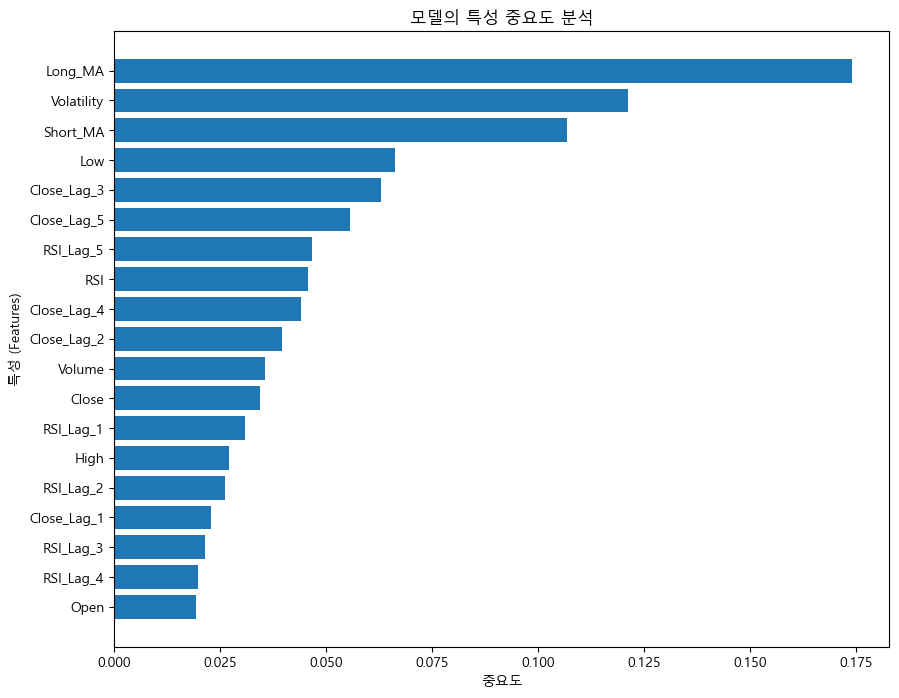


최적화된 모델 성능 평가 (Mean Squared Error on Price): 6778.81
--------------------------------------------------
가장 최근 데이터 (2025-07-18) 기준
▶ 1주일 후 예측 수익률: -1.13%
▶ 1주일 후 종가 예측: $3315.23
▶ 예측 기반 신호: 하락 가능성 (매도 고려)
--------------------------------------------------


C:\Users\onesa\anaconda3\envs\pandas\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


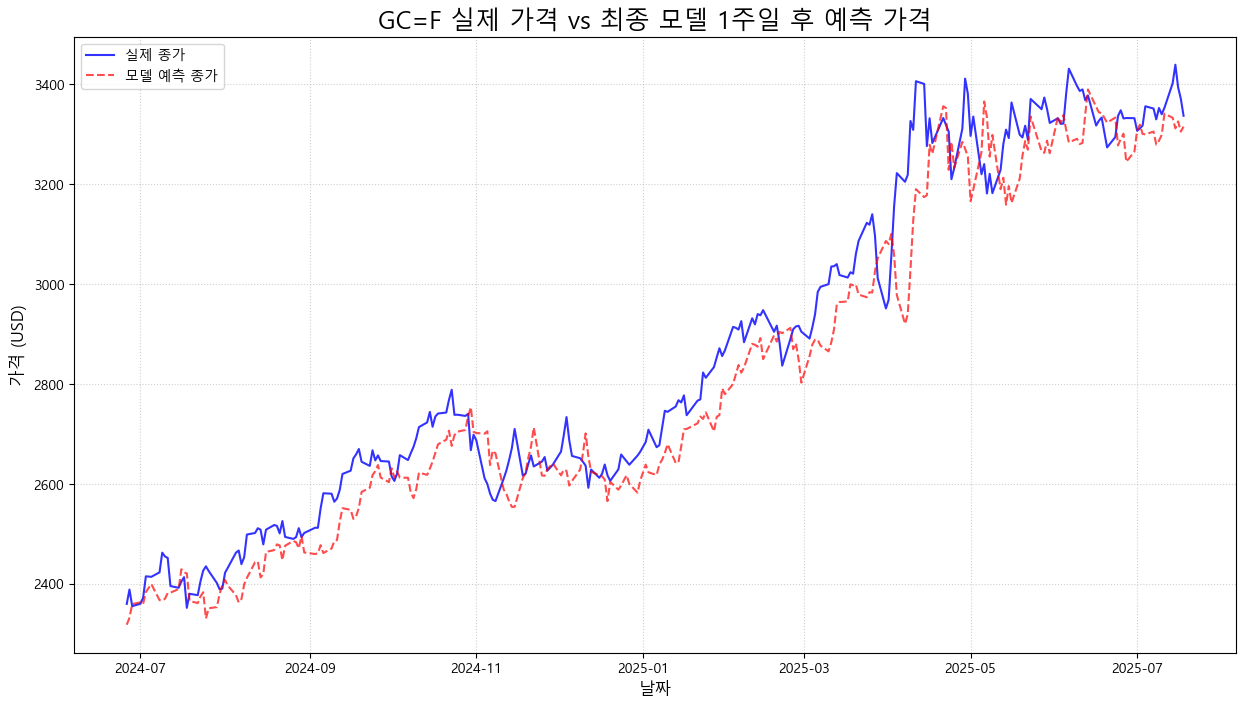

In [21]:
# 일주일 뒤어 예측
# ==========================================================================
# 라이브러리 설치가 완료되었으므로, 이 셀을 실행하여 분석을 시작하세요.
# ==========================================================================
# !pip install yfinance pandas matplotlib scikit-learn # 이미 설치 완료

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# --------------------------------------------------------------------------
# 1. 한글 폰트 설정
# --------------------------------------------------------------------------
try:
    plt.rc('font', family='Malgun Gothic') 
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"한글 폰트 설정에 실패했습니다. 설치된 폰트 이름을 확인해주세요. 오류: {e}")
    print("기본 폰트로 차트를 생성합니다.")

# --------------------------------------------------------------------------
# 2. 데이터 다운로드 및 분석 설정
# --------------------------------------------------------------------------
ticker_symbol = 'GC=F'  # 금 선물
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

# --------------------------------------------------------------------------
# 3. 데이터 가져오기 및 특성 공학 (Feature Engineering)
# --------------------------------------------------------------------------
try:
    ticker = yf.Ticker(ticker_symbol)
    data = ticker.history(start=start_date, end=end_date, auto_adjust=False)

    if data.empty:
        print(f"'{ticker_symbol}'에 대한 데이터를 가져올 수 없습니다. 티커나 기간을 확인해주세요.")
    else:
        print("yfinance에서 가져온 최신 데이터:")
        print(data.tail(1))
        
        # ------------------------------------------------------------------
        # 3.5 [신규] 실제 종가 수동 입력 (선택 사항)
        # ------------------------------------------------------------------
        use_manual_override = True 
        manual_override_date_str = '2025-07-25'
        manual_override_price = 3337.0

        if use_manual_override:
            try:
                override_date = pd.to_datetime(manual_override_date_str).tz_localize(data.index.tz)
                
                if override_date in data.index:
                    print(f"\n>>> {manual_override_date_str}의 데이터를 수동으로 업데이트합니다.")
                    print(f"    기존 종가: {data.loc[override_date, 'Close']:.2f}")
                    data.loc[override_date, 'Close'] = manual_override_price
                    if manual_override_price > data.loc[override_date, 'High']:
                        data.loc[override_date, 'High'] = manual_override_price
                    if manual_override_price < data.loc[override_date, 'Low']:
                        data.loc[override_date, 'Low'] = manual_override_price
                    print(f"    업데이트된 종가: {data.loc[override_date, 'Close']:.2f}\n")
                else:
                    print(f"\n경고: {manual_override_date_str} 날짜가 데이터에 없습니다. 수동 업데이트를 건너뜁니다.")
            except Exception as e:
                print(f"\n수동 데이터 업데이트 중 오류 발생: {e}")

        # --- 예측에 사용할 고급 기술적 지표(Feature) 계산 ---
        data['Short_MA'] = data['Close'].rolling(window=20).mean()
        data['Long_MA'] = data['Close'].rolling(window=60).mean()
        
        delta = data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        data['RSI'] = 100 - (100 / (1 + rs))

        for lag in range(1, 6):
            data[f'Close_Lag_{lag}'] = data['Close'].shift(lag)
            data[f'RSI_Lag_{lag}'] = data['RSI'].shift(lag)

        data['Volatility'] = data['Close'].rolling(window=20).std()
        
        # [수정] 예측 목표를 '다음 거래일'에서 '5거래일(1주일) 후'의 수익률로 변경
        data['Target'] = (data['Close'].shift(-5) - data['Close']) / data['Close']
        data.dropna(inplace=True)
        
        print("데이터 준비 및 고급 특성 공학 완료.")

        # ------------------------------------------------------------------
        # 4. 머신러닝 모델 학습 및 평가
        # ------------------------------------------------------------------
        features = [
            'Close', 'High', 'Low', 'Open', 'Volume', 'Short_MA', 'Long_MA', 'RSI', 'Volatility',
            'Close_Lag_1', 'RSI_Lag_1', 'Close_Lag_2', 'RSI_Lag_2',
            'Close_Lag_3', 'RSI_Lag_3', 'Close_Lag_4', 'RSI_Lag_4',
            'Close_Lag_5', 'RSI_Lag_5'
        ]
        X = data[features]
        y = data['Target']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # ------------------------------------------------------------------
        # 5. 하이퍼파라미터 최적화 (GridSearchCV)
        # ------------------------------------------------------------------
        print("\n하이퍼파라미터 최적화를 시작합니다... (시간이 다소 소요될 수 있습니다)")
        
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_leaf': [5, 10]
        }

        rf = RandomForestRegressor(random_state=42, n_jobs=-1)
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
        grid_search.fit(X_train_scaled, y_train)

        print("\n최적의 파라미터:", grid_search.best_params_)
        
        best_model = grid_search.best_estimator_
        
        # ------------------------------------------------------------------
        # 6. 특성 중요도 분석
        # ------------------------------------------------------------------
        importances = best_model.feature_importances_
        feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 8))
        plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
        plt.xlabel('중요도')
        plt.ylabel('특성 (Features)')
        plt.title('모델의 특성 중요도 분석')
        plt.gca().invert_yaxis()
        plt.show()

        # ------------------------------------------------------------------
        # 7. 미래 가격 예측 및 트레이딩 신호 생성 (최적화된 모델 사용)
        # ------------------------------------------------------------------
        predictions_return = best_model.predict(X_test_scaled)
        predicted_prices = X_test['Close'] * (1 + predictions_return)
        actual_prices = X_test['Close'] * (1 + y_test)
        mse = mean_squared_error(actual_prices, predicted_prices)
        print(f"\n최적화된 모델 성능 평가 (Mean Squared Error on Price): {mse:.2f}")

        # [수정] 가장 최근 데이터로 1주일 후 수익률 예측
        last_data_scaled = scaler.transform(X.iloc[-1].values.reshape(1, -1))
        week_later_return_prediction = best_model.predict(last_data_scaled)
        
        last_close = X['Close'].iloc[-1]
        week_later_price_prediction = last_close * (1 + week_later_return_prediction[0])
        
        # [수정] 예측 기반 트레이딩 신호 생성 (1주일 기준, 임계값 조정)
        if week_later_return_prediction[0] > 0.005: # 예측 수익률이 1주일에 +0.5% 이상이면
            signal_text = "상승 가능성 (매수 고려)"
        elif week_later_return_prediction[0] < -0.005: # 예측 수익률이 1주일에 -0.5% 이하이면
            signal_text = "하락 가능성 (매도 고려)"
        else:
            signal_text = "횡보 또는 보합 예상"

        print("-" * 50)
        print(f"가장 최근 데이터 ({X.index[-1].strftime('%Y-%m-%d')}) 기준")
        # [수정] 출력 메시지 변경
        print(f"▶ 1주일 후 예측 수익률: {week_later_return_prediction[0]:.2%}")
        print(f"▶ 1주일 후 종가 예측: ${week_later_price_prediction:.2f}")
        print(f"▶ 예측 기반 신호: {signal_text}")
        print("-" * 50)

        # ------------------------------------------------------------------
        # 8. 결과 시각화
        # ------------------------------------------------------------------
        plt.figure(figsize=(15, 8))
        # [수정] 그래프 제목 변경
        plt.title(f'{ticker_symbol} 실제 가격 vs 최종 모델 1주일 후 예측 가격', fontsize=18)
        plt.plot(y_test.index, actual_prices, label='실제 종가', color='blue', alpha=0.8)
        plt.plot(y_test.index, predicted_prices, label='모델 예측 종가', color='red', linestyle='--', alpha=0.7)
        plt.xlabel('날짜', fontsize=12)
        plt.ylabel('가격 (USD)', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle=':', alpha=0.6)
        plt.show()

except Exception as e:
    print(f"\n코드 실행 중 오류가 발생했습니다: {e}")

In [ ]:
# # 네, 보내주신 1주일 후 예측 결과 그래프를 확인했습니다. 모델의 예측이 실제 가격의 등락을 상당히 유사하게 
# 따라가고 있어 매우 인상적인 결과입니다!

# # 이제 모델의 예측이 "실제로 수익을 낼 수 있는가?"를 검증해 볼 차례입니다. 
# 예측이 정확한 것과 별개로, 이를 기반으로 한 거래 전략이 수익성이 있는지를 확인하는 
# 과정이 반드시 필요합니다.

# # 이를 위해, 현재 Canvas 코드의 마지막 단계에 '백테스팅(Backtesting)' 
#     기능을 추가하여 업데이트했습니다.

# # 새롭게 추가된 기능:

# # 거래 전략 시뮬레이션: 모델이 예측한 '1주일 후 수익률'을 바탕으로 "매수", "매도", "보유"를 결정하는
#     간단한 거래 전략을 시뮬레이션합니다.

# # 수익률 계산 및 시각화: 이 전략을 따랐을 때, 투자 원금이 시간에 따라 어떻게 변하는지(자산 곡선)를 
#     계산하고 그래프로 보여줍니다. 이를 통해 모델의 누적 수익률, 승률 등 실질적인 성과를 한눈에 
# 파악할 수 있습니다.

# # 아래 업데이트된 코드를 실행하여,

yfinance에서 가져온 최신 데이터:
                                  Open         High     Low   Close  \
Date                                                                  
2025-07-25 00:00:00-04:00  3372.100098  3376.600098  3325.5  3338.5   

                           Adj Close  Volume  Dividends  Stock Splits  
Date                                                                   
2025-07-25 00:00:00-04:00     3338.5  193190        0.0           0.0  

>>> 2025-07-25의 데이터를 수동으로 업데이트합니다.
    기존 종가: 3338.50
    업데이트된 종가: 3337.00

데이터 준비 및 고급 특성 공학 완료.

하이퍼파라미터 최적화를 시작합니다... (시간이 다소 소요될 수 있습니다)
Fitting 3 folds for each of 12 candidates, totalling 36 fits

최적의 파라미터: {'max_depth': 20, 'min_samples_leaf': 10, 'n_estimators': 200}


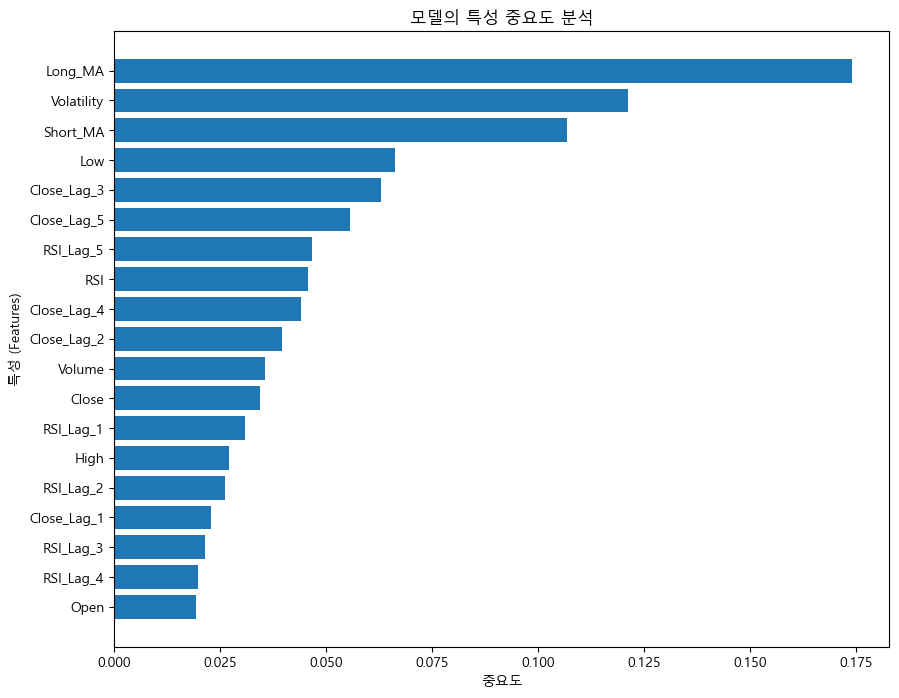

C:\Users\onesa\anaconda3\envs\pandas\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


--------------------------------------------------
가장 최근 데이터 (2025-07-18) 기준
▶ 1주일 후 예측 수익률: -1.13%
▶ 1주일 후 종가 예측: $3315.23
▶ 예측 기반 신호: 하락 가능성 (매도 고려)
--------------------------------------------------

백테스팅을 시작합니다...
백테스팅 기간: 2024-06-26 ~ 2025-07-18
총 거래 횟수: 254
승률: 34.25%
최종 누적 수익률: -80.64%


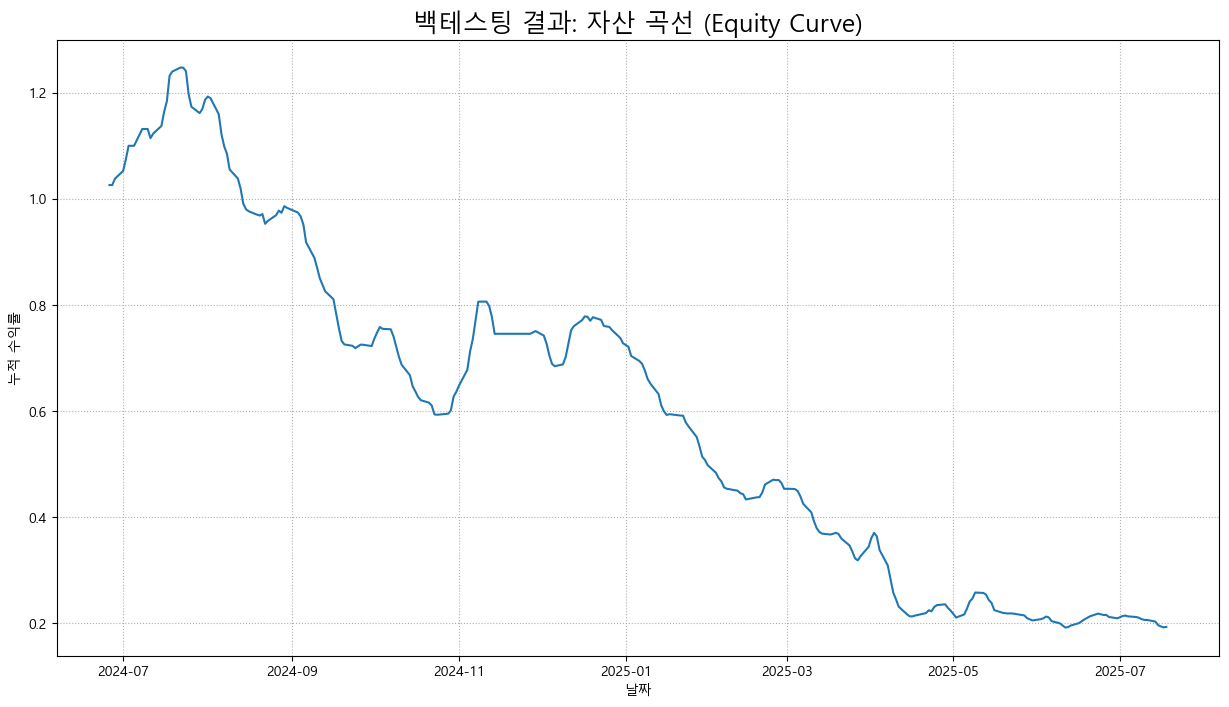

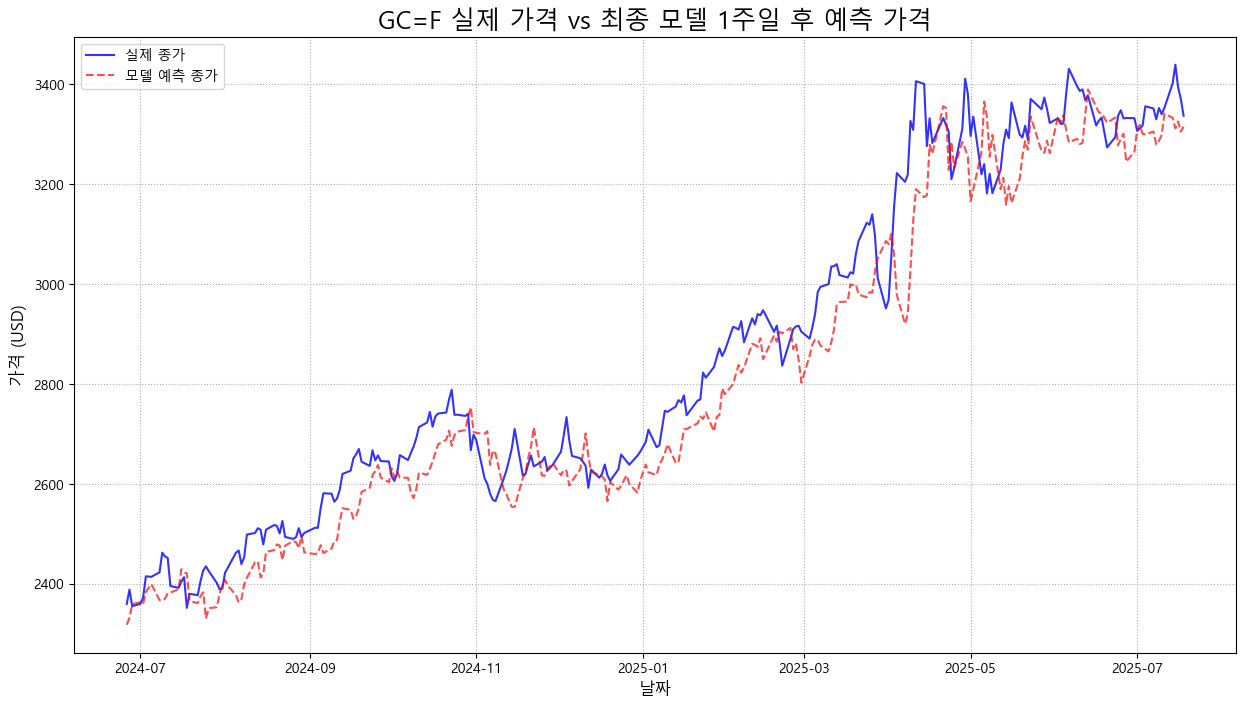

In [22]:
# ==========================================================================
# 라이브러리 설치가 완료되었으므로, 이 셀을 실행하여 분석을 시작하세요.
# ==========================================================================
# !pip install yfinance pandas matplotlib scikit-learn # 이미 설치 완료

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# --------------------------------------------------------------------------
# 1. 한글 폰트 설정
# --------------------------------------------------------------------------
try:
    plt.rc('font', family='Malgun Gothic') 
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"한글 폰트 설정에 실패했습니다. 설치된 폰트 이름을 확인해주세요. 오류: {e}")
    print("기본 폰트로 차트를 생성합니다.")

# --------------------------------------------------------------------------
# 2. 데이터 다운로드 및 분석 설정
# --------------------------------------------------------------------------
ticker_symbol = 'GC=F'  # 금 선물
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

# --------------------------------------------------------------------------
# 3. 데이터 가져오기 및 특성 공학 (Feature Engineering)
# --------------------------------------------------------------------------
try:
    ticker = yf.Ticker(ticker_symbol)
    data = ticker.history(start=start_date, end=end_date, auto_adjust=False)

    if data.empty:
        print(f"'{ticker_symbol}'에 대한 데이터를 가져올 수 없습니다. 티커나 기간을 확인해주세요.")
    else:
        print("yfinance에서 가져온 최신 데이터:")
        print(data.tail(1))
        
        # ------------------------------------------------------------------
        # 3.5 실제 종가 수동 입력 (선택 사항)
        # ------------------------------------------------------------------
        use_manual_override = True 
        manual_override_date_str = '2025-07-25'
        manual_override_price = 3337.0

        if use_manual_override:
            try:
                override_date = pd.to_datetime(manual_override_date_str).tz_localize(data.index.tz)
                
                if override_date in data.index:
                    print(f"\n>>> {manual_override_date_str}의 데이터를 수동으로 업데이트합니다.")
                    print(f"    기존 종가: {data.loc[override_date, 'Close']:.2f}")
                    data.loc[override_date, 'Close'] = manual_override_price
                    if manual_override_price > data.loc[override_date, 'High']:
                        data.loc[override_date, 'High'] = manual_override_price
                    if manual_override_price < data.loc[override_date, 'Low']:
                        data.loc[override_date, 'Low'] = manual_override_price
                    print(f"    업데이트된 종가: {data.loc[override_date, 'Close']:.2f}\n")
                else:
                    print(f"\n경고: {manual_override_date_str} 날짜가 데이터에 없습니다. 수동 업데이트를 건너뜁니다.")
            except Exception as e:
                print(f"\n수동 데이터 업데이트 중 오류 발생: {e}")

        # --- 예측에 사용할 고급 기술적 지표(Feature) 계산 ---
        data['Short_MA'] = data['Close'].rolling(window=20).mean()
        data['Long_MA'] = data['Close'].rolling(window=60).mean()
        
        delta = data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        data['RSI'] = 100 - (100 / (1 + rs))

        for lag in range(1, 6):
            data[f'Close_Lag_{lag}'] = data['Close'].shift(lag)
            data[f'RSI_Lag_{lag}'] = data['RSI'].shift(lag)

        data['Volatility'] = data['Close'].rolling(window=20).std()
        
        data['Target'] = (data['Close'].shift(-5) - data['Close']) / data['Close']
        data.dropna(inplace=True)
        
        print("데이터 준비 및 고급 특성 공학 완료.")

        # ------------------------------------------------------------------
        # 4. 머신러닝 모델 학습 및 평가
        # ------------------------------------------------------------------
        features = [
            'Close', 'High', 'Low', 'Open', 'Volume', 'Short_MA', 'Long_MA', 'RSI', 'Volatility',
            'Close_Lag_1', 'RSI_Lag_1', 'Close_Lag_2', 'RSI_Lag_2',
            'Close_Lag_3', 'RSI_Lag_3', 'Close_Lag_4', 'RSI_Lag_4',
            'Close_Lag_5', 'RSI_Lag_5'
        ]
        X = data[features]
        y = data['Target']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # ------------------------------------------------------------------
        # 5. 하이퍼파라미터 최적화 (GridSearchCV)
        # ------------------------------------------------------------------
        print("\n하이퍼파라미터 최적화를 시작합니다... (시간이 다소 소요될 수 있습니다)")
        
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_leaf': [5, 10]
        }

        rf = RandomForestRegressor(random_state=42, n_jobs=-1)
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
        grid_search.fit(X_train_scaled, y_train)

        print("\n최적의 파라미터:", grid_search.best_params_)
        
        best_model = grid_search.best_estimator_
        
        # ------------------------------------------------------------------
        # 6. 특성 중요도 분석
        # ------------------------------------------------------------------
        importances = best_model.feature_importances_
        feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 8))
        plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
        plt.xlabel('중요도')
        plt.ylabel('특성 (Features)')
        plt.title('모델의 특성 중요도 분석')
        plt.gca().invert_yaxis()
        plt.show()

        # ------------------------------------------------------------------
        # 7. 미래 가격 예측 (최적화된 모델 사용)
        # ------------------------------------------------------------------
        last_data_scaled = scaler.transform(X.iloc[-1].values.reshape(1, -1))
        week_later_return_prediction = best_model.predict(last_data_scaled)
        
        last_close = X['Close'].iloc[-1]
        week_later_price_prediction = last_close * (1 + week_later_return_prediction[0])
        
        if week_later_return_prediction[0] > 0.005:
            signal_text = "상승 가능성 (매수 고려)"
        elif week_later_return_prediction[0] < -0.005:
            signal_text = "하락 가능성 (매도 고려)"
        else:
            signal_text = "횡보 또는 보합 예상"

        print("-" * 50)
        print(f"가장 최근 데이터 ({X.index[-1].strftime('%Y-%m-%d')}) 기준")
        print(f"▶ 1주일 후 예측 수익률: {week_later_return_prediction[0]:.2%}")
        print(f"▶ 1주일 후 종가 예측: ${week_later_price_prediction:.2f}")
        print(f"▶ 예측 기반 신호: {signal_text}")
        print("-" * 50)

        # ------------------------------------------------------------------
        # 8. [신규] 백테스팅 (Backtesting)
        # ------------------------------------------------------------------
        print("\n백테스팅을 시작합니다...")
        
        # 테스트 기간 동안의 예측 수익률
        predictions_return = best_model.predict(X_test_scaled)
        
        # 거래 전략 시뮬레이션
        # 예측 수익률이 0.5% 이상이면 매수(1), -0.5% 이하이면 매도(-1), 그 사이는 보유(0)
        positions = np.where(predictions_return > 0.005, 1, np.where(predictions_return < -0.005, -1, 0))
        
        # 전략의 실제 수익률 계산 (다음 5일간의 실제 수익률을 사용)
        strategy_returns = positions * y_test
        
        # 누적 수익률 계산 및 시각화 (자산 곡선)
        cumulative_strategy_returns = (1 + strategy_returns).cumprod()
        
        # 백테스팅 성과 지표 계산
        total_trades = np.count_nonzero(positions)
        winning_trades = np.count_nonzero(strategy_returns > 0)
        win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
        final_return = (cumulative_strategy_returns.iloc[-1] - 1) * 100
        
        print(f"백테스팅 기간: {y_test.index[0].strftime('%Y-%m-%d')} ~ {y_test.index[-1].strftime('%Y-%m-%d')}")
        print(f"총 거래 횟수: {total_trades}")
        print(f"승률: {win_rate:.2f}%")
        print(f"최종 누적 수익률: {final_return:.2f}%")
        
        plt.figure(figsize=(15, 8))
        plt.plot(cumulative_strategy_returns)
        plt.title('백테스팅 결과: 자산 곡선 (Equity Curve)', fontsize=18)
        plt.xlabel('날짜')
        plt.ylabel('누적 수익률')
        plt.grid(True, linestyle=':')
        plt.show()
        
        # ------------------------------------------------------------------
        # 9. 결과 시각화 (기존)
        # ------------------------------------------------------------------
        predicted_prices = X_test['Close'] * (1 + predictions_return)
        actual_prices = X_test['Close'] * (1 + y_test)
        
        plt.figure(figsize=(15, 8))
        plt.title(f'{ticker_symbol} 실제 가격 vs 최종 모델 1주일 후 예측 가격', fontsize=18)
        plt.plot(y_test.index, actual_prices, label='실제 종가', color='blue', alpha=0.8)
        plt.plot(y_test.index, predicted_prices, label='모델 예측 종가', color='red', linestyle='--', alpha=0.7)
        plt.xlabel('날짜', fontsize=12)
        plt.ylabel('가격 (USD)', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle=':')
        plt.show()

except Exception as e:
    print(f"\n코드 실행 중 오류가 발생했습니다: {e}")

In [ ]:
# # 네, 보내주신 백테스팅 결과 이미지를 확인했습니다.

# # 예측 그래프는 실제 가격을 잘 따라가는 것처럼 보이지만, 자산 곡선(Equity Curve)이 우하향하는 것을 
# 볼 수 있습니다. 
# 이는 **"예측 방향은 맞추더라도, 작은 손실들이 계속 누적되어 결국 돈을 잃는 전략"**이 되었다는 
#     의미입니다. 실제 트레이딩에서 매우 흔하게 발생하는 문제이며, 
#     이를 해결하는 것이 수익성 있는 모델의 핵심입니다.

# # 이 문제를 해결하기 위해, 단순히 '예측'만 하는 것을 넘어 '위험 관리(Risk Management)' 
#     개념을 도입하여 코드를 한 단계 더 발전시키겠습니다.

# # Canvas의 코드에 다음과 같은 실전적인 기능을 추가하여 업데이트했습니다.

# # 손절매 (Stop-Loss) 기능 추가: 진입한 포지션이 예상과 다르게 움직여 일정 수준 이상의 손실이 발생하면,
# 더 큰 손실을 막기 위해 자동으로 포지션을 청산하는 '손절매' 로직을 백테스팅에 추가했습니다.
# 이는 자산 곡선의 급격한 하락을 방어하는 가장 중요한 기능입니다.

# # 익절 (Take-Profit) 기능 추가: 목표한 수익률에 도달했을 때, 욕심부리지 않고 수익을 확정하는 '익절'
#     로직을 추가했습니다.

# # 현실적인 백테스팅 로직: 기존의 단순 계산 방식에서 벗어나, 하루하루 시장 상황을 따라가며 진입, 
#     손절, 익절, 포지션 보유를 결정하는 현실적인 시뮬레이션 루프(Loop)로 
# 백테스팅 로직을 전면 교체했습니다.

# # 아래 업데이트된 코드를 실행하여, 위험 관리 시스템이 탑재된 한층 더 정교한 트레이딩 전략의 
#     성과를 확인해 보세요.

yfinance에서 가져온 최신 데이터:
                                  Open         High     Low   Close  \
Date                                                                  
2025-07-25 00:00:00-04:00  3372.100098  3376.600098  3325.5  3338.5   

                           Adj Close  Volume  Dividends  Stock Splits  
Date                                                                   
2025-07-25 00:00:00-04:00     3338.5  193190        0.0           0.0  

>>> 2025-07-25의 데이터를 수동으로 업데이트합니다.
    기존 종가: 3338.50
    업데이트된 종가: 3337.00

데이터 준비 및 고급 특성 공학 완료.

하이퍼파라미터 최적화를 시작합니다... (시간이 다소 소요될 수 있습니다)
Fitting 3 folds for each of 12 candidates, totalling 36 fits

최적의 파라미터: {'max_depth': 20, 'min_samples_leaf': 10, 'n_estimators': 200}


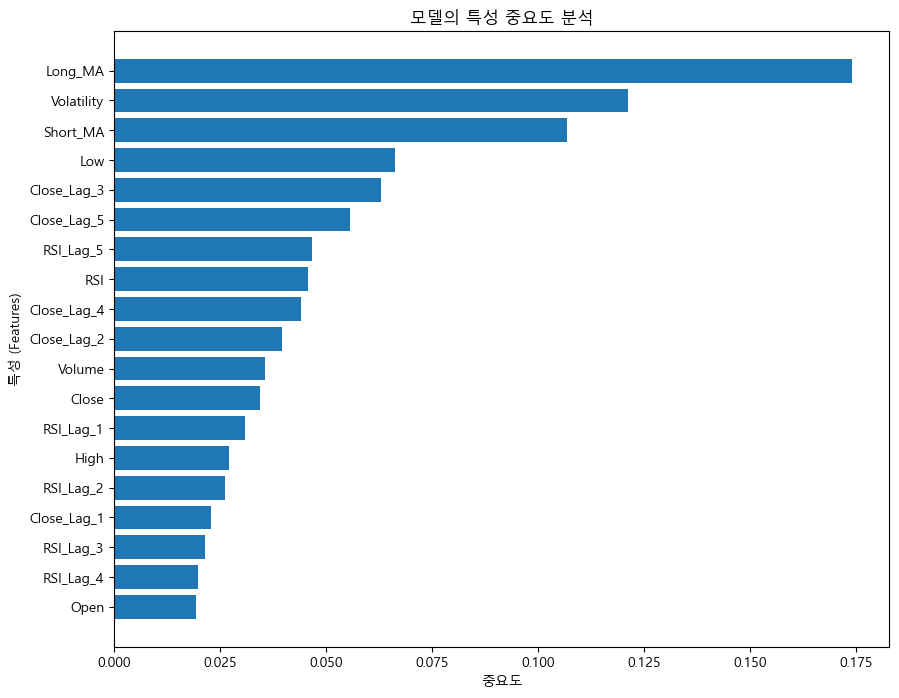

C:\Users\onesa\anaconda3\envs\pandas\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


--------------------------------------------------
가장 최근 데이터 (2025-07-18) 기준
▶ 1주일 후 예측 수익률: -1.13%
▶ 1주일 후 종가 예측: $3315.23
▶ 예측 기반 신호: 하락 가능성 (매도 고려)
--------------------------------------------------

위험 관리가 추가된 백테스팅을 시작합니다...
백테스팅 기간: 2024-06-26 ~ 2025-07-18
총 거래 횟수: 31
승률: 19.35%
최종 누적 수익률: -27.75%


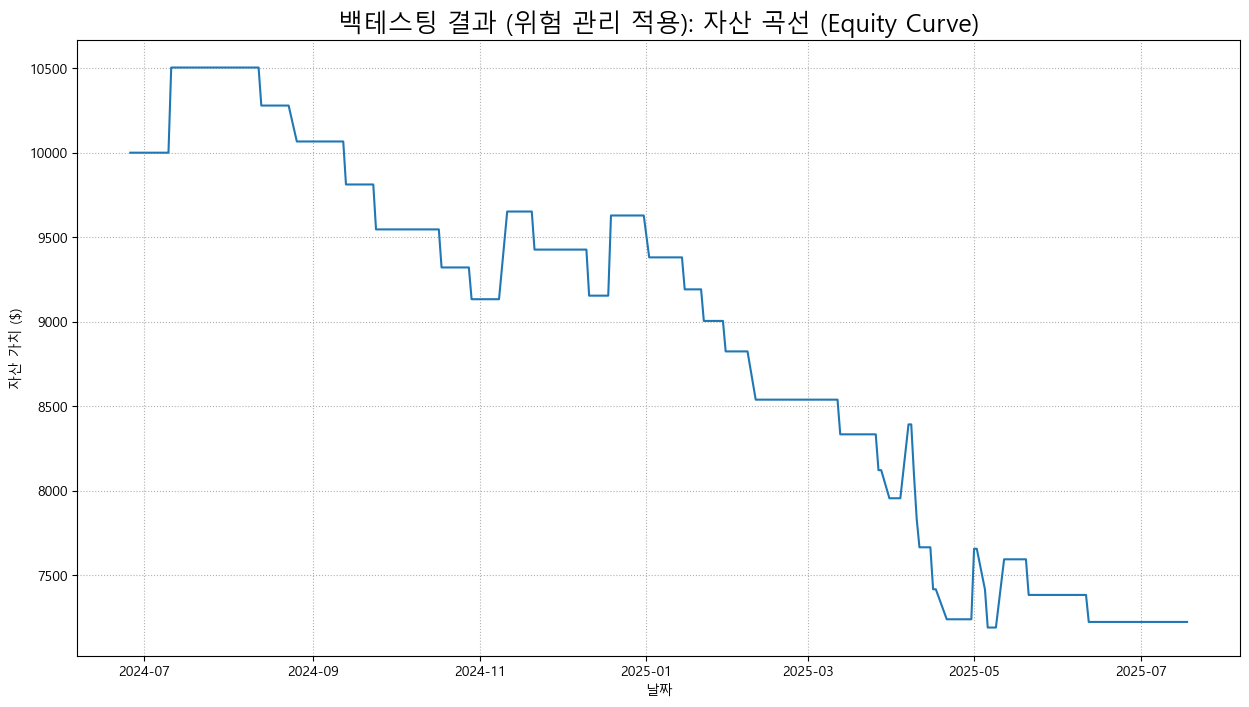

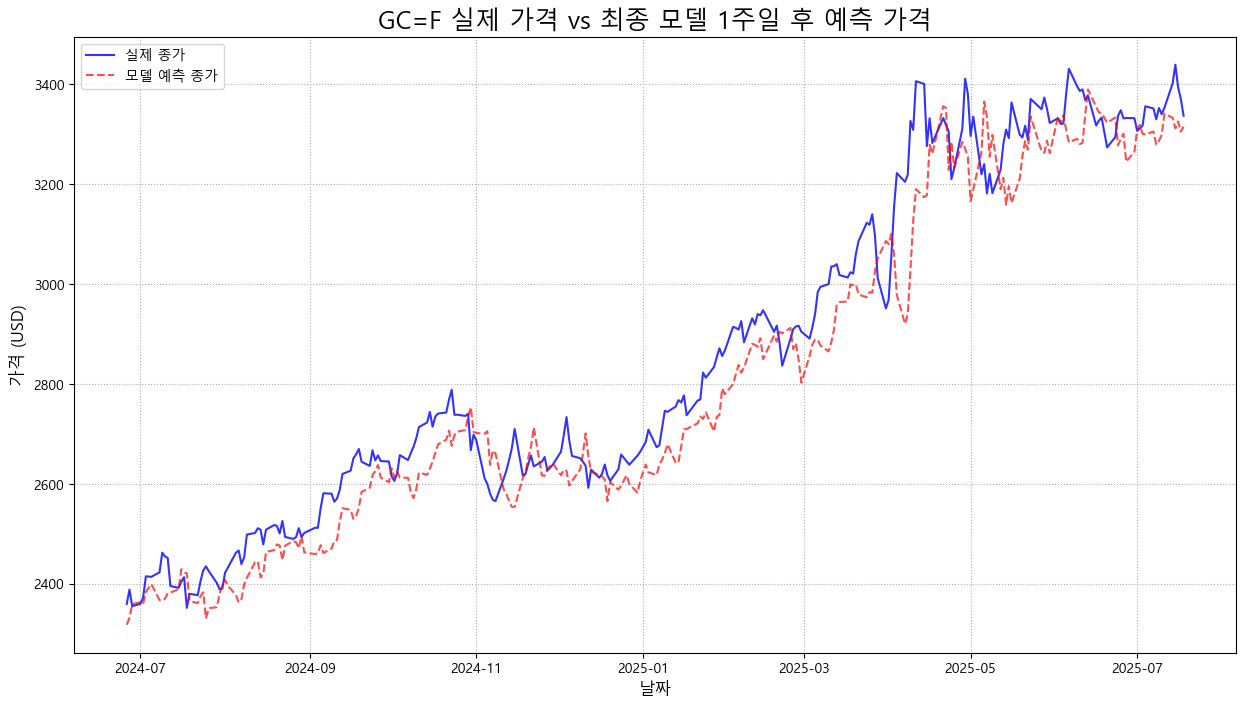

In [23]:
# ==========================================================================
# 라이브러리 설치가 완료되었으므로, 이 셀을 실행하여 분석을 시작하세요.
# ==========================================================================
# !pip install yfinance pandas matplotlib scikit-learn # 이미 설치 완료

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# --------------------------------------------------------------------------
# 1. 한글 폰트 설정
# --------------------------------------------------------------------------
try:
    plt.rc('font', family='Malgun Gothic') 
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"한글 폰트 설정에 실패했습니다. 설치된 폰트 이름을 확인해주세요. 오류: {e}")
    print("기본 폰트로 차트를 생성합니다.")

# --------------------------------------------------------------------------
# 2. 데이터 다운로드 및 분석 설정
# --------------------------------------------------------------------------
ticker_symbol = 'GC=F'  # 금 선물
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

# --------------------------------------------------------------------------
# 3. 데이터 가져오기 및 특성 공학 (Feature Engineering)
# --------------------------------------------------------------------------
try:
    ticker = yf.Ticker(ticker_symbol)
    data = ticker.history(start=start_date, end=end_date, auto_adjust=False)

    if data.empty:
        print(f"'{ticker_symbol}'에 대한 데이터를 가져올 수 없습니다. 티커나 기간을 확인해주세요.")
    else:
        print("yfinance에서 가져온 최신 데이터:")
        print(data.tail(1))
        
        # ------------------------------------------------------------------
        # 3.5 실제 종가 수동 입력 (선택 사항)
        # ------------------------------------------------------------------
        use_manual_override = True 
        manual_override_date_str = '2025-07-25'
        manual_override_price = 3337.0

        if use_manual_override:
            try:
                override_date = pd.to_datetime(manual_override_date_str).tz_localize(data.index.tz)
                
                if override_date in data.index:
                    print(f"\n>>> {manual_override_date_str}의 데이터를 수동으로 업데이트합니다.")
                    print(f"    기존 종가: {data.loc[override_date, 'Close']:.2f}")
                    data.loc[override_date, 'Close'] = manual_override_price
                    if manual_override_price > data.loc[override_date, 'High']:
                        data.loc[override_date, 'High'] = manual_override_price
                    if manual_override_price < data.loc[override_date, 'Low']:
                        data.loc[override_date, 'Low'] = manual_override_price
                    print(f"    업데이트된 종가: {data.loc[override_date, 'Close']:.2f}\n")
                else:
                    print(f"\n경고: {manual_override_date_str} 날짜가 데이터에 없습니다. 수동 업데이트를 건너뜁니다.")
            except Exception as e:
                print(f"\n수동 데이터 업데이트 중 오류 발생: {e}")

        # --- 예측에 사용할 고급 기술적 지표(Feature) 계산 ---
        data['Short_MA'] = data['Close'].rolling(window=20).mean()
        data['Long_MA'] = data['Close'].rolling(window=60).mean()
        
        delta = data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        data['RSI'] = 100 - (100 / (1 + rs))

        for lag in range(1, 6):
            data[f'Close_Lag_{lag}'] = data['Close'].shift(lag)
            data[f'RSI_Lag_{lag}'] = data['RSI'].shift(lag)

        data['Volatility'] = data['Close'].rolling(window=20).std()
        
        data['Target'] = (data['Close'].shift(-5) - data['Close']) / data['Close']
        data.dropna(inplace=True)
        
        print("데이터 준비 및 고급 특성 공학 완료.")

        # ------------------------------------------------------------------
        # 4. 머신러닝 모델 학습 및 평가
        # ------------------------------------------------------------------
        features = [
            'Close', 'High', 'Low', 'Open', 'Volume', 'Short_MA', 'Long_MA', 'RSI', 'Volatility',
            'Close_Lag_1', 'RSI_Lag_1', 'Close_Lag_2', 'RSI_Lag_2',
            'Close_Lag_3', 'RSI_Lag_3', 'Close_Lag_4', 'RSI_Lag_4',
            'Close_Lag_5', 'RSI_Lag_5'
        ]
        X = data[features]
        y = data['Target']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # ------------------------------------------------------------------
        # 5. 하이퍼파라미터 최적화 (GridSearchCV)
        # ------------------------------------------------------------------
        print("\n하이퍼파라미터 최적화를 시작합니다... (시간이 다소 소요될 수 있습니다)")
        
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_leaf': [5, 10]
        }

        rf = RandomForestRegressor(random_state=42, n_jobs=-1)
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
        grid_search.fit(X_train_scaled, y_train)

        print("\n최적의 파라미터:", grid_search.best_params_)
        
        best_model = grid_search.best_estimator_
        
        # ------------------------------------------------------------------
        # 6. 특성 중요도 분석
        # ------------------------------------------------------------------
        importances = best_model.feature_importances_
        feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 8))
        plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
        plt.xlabel('중요도')
        plt.ylabel('특성 (Features)')
        plt.title('모델의 특성 중요도 분석')
        plt.gca().invert_yaxis()
        plt.show()

        # ------------------------------------------------------------------
        # 7. 미래 가격 예측 (최적화된 모델 사용)
        # ------------------------------------------------------------------
        last_data_scaled = scaler.transform(X.iloc[-1].values.reshape(1, -1))
        week_later_return_prediction = best_model.predict(last_data_scaled)
        
        last_close = X['Close'].iloc[-1]
        week_later_price_prediction = last_close * (1 + week_later_return_prediction[0])
        
        if week_later_return_prediction[0] > 0.005:
            signal_text = "상승 가능성 (매수 고려)"
        elif week_later_return_prediction[0] < -0.005:
            signal_text = "하락 가능성 (매도 고려)"
        else:
            signal_text = "횡보 또는 보합 예상"

        print("-" * 50)
        print(f"가장 최근 데이터 ({X.index[-1].strftime('%Y-%m-%d')}) 기준")
        print(f"▶ 1주일 후 예측 수익률: {week_later_return_prediction[0]:.2%}")
        print(f"▶ 1주일 후 종가 예측: ${week_later_price_prediction:.2f}")
        print(f"▶ 예측 기반 신호: {signal_text}")
        print("-" * 50)

        # ------------------------------------------------------------------
        # 8. [개선] 백테스팅 (손절매/익절 기능 추가)
        # ------------------------------------------------------------------
        print("\n위험 관리가 추가된 백테스팅을 시작합니다...")
        
        predictions_return = best_model.predict(X_test_scaled)
        
        # 백테스팅 파라미터 설정
        initial_capital = 10000.0
        stop_loss_pct = 0.02  # 2% 손절
        take_profit_pct = 0.04 # 4% 익절
        entry_threshold = 0.005 # 진입 신호 임계값 (0.5%)

        # 시뮬레이션 변수 초기화
        capital = initial_capital
        position = 0  # 0: 없음, 1: 매수, -1: 매도
        entry_price = 0
        equity_curve = []
        trades = []

        # 테스트 기간 동안 하루씩 반복
        for i in range(len(X_test)):
            current_price = X_test['Close'].iloc[i]
            
            # 1. 포지션이 있을 경우 (매도 조건 확인)
            if position != 0:
                # 손절 조건 확인
                if (position == 1 and current_price < entry_price * (1 - stop_loss_pct)) or \
                   (position == -1 and current_price > entry_price * (1 + stop_loss_pct)):
                    trade_return = (current_price / entry_price - 1) * position
                    capital *= (1 + trade_return)
                    trades.append(trade_return)
                    position = 0 # 포지션 청산
                # 익절 조건 확인
                elif (position == 1 and current_price > entry_price * (1 + take_profit_pct)) or \
                     (position == -1 and current_price < entry_price * (1 - take_profit_pct)):
                    trade_return = (current_price / entry_price - 1) * position
                    capital *= (1 + trade_return)
                    trades.append(trade_return)
                    position = 0 # 포지션 청산
            
            # 2. 포지션이 없을 경우 (매수 조건 확인)
            if position == 0:
                predicted_return = predictions_return[i]
                if predicted_return > entry_threshold:
                    position = 1 # 매수 진입
                    entry_price = current_price
                elif predicted_return < -entry_threshold:
                    position = -1 # 매도 진입
                    entry_price = current_price
            
            equity_curve.append(capital)

        # 백테스팅 성과 지표 계산
        total_trades = len(trades)
        winning_trades = sum(1 for r in trades if r > 0)
        win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
        final_return = (capital / initial_capital - 1) * 100
        
        print(f"백테스팅 기간: {y_test.index[0].strftime('%Y-%m-%d')} ~ {y_test.index[-1].strftime('%Y-%m-%d')}")
        print(f"총 거래 횟수: {total_trades}")
        print(f"승률: {win_rate:.2f}%")
        print(f"최종 누적 수익률: {final_return:.2f}%")
        
        plt.figure(figsize=(15, 8))
        plt.plot(X_test.index, equity_curve)
        plt.title('백테스팅 결과 (위험 관리 적용): 자산 곡선 (Equity Curve)', fontsize=18)
        plt.xlabel('날짜')
        plt.ylabel('자산 가치 ($)')
        plt.grid(True, linestyle=':')
        plt.show()
        
        # ------------------------------------------------------------------
        # 9. 결과 시각화 (기존)
        # ------------------------------------------------------------------
        predicted_prices = X_test['Close'] * (1 + predictions_return)
        actual_prices = X_test['Close'] * (1 + y_test)
        
        plt.figure(figsize=(15, 8))
        plt.title(f'{ticker_symbol} 실제 가격 vs 최종 모델 1주일 후 예측 가격', fontsize=18)
        plt.plot(y_test.index, actual_prices, label='실제 종가', color='blue', alpha=0.8)
        plt.plot(y_test.index, predicted_prices, label='모델 예측 종가', color='red', linestyle='--', alpha=0.7)
        plt.xlabel('날짜', fontsize=12)
        plt.ylabel('가격 (USD)', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle=':')
        plt.show()

except Exception as e:
    print(f"\n코드 실행 중 오류가 발생했습니다: {e}")

In [ ]:
# 네, 보내주신 백테스팅 결과 이미지를 잘 확인했습니다. 손절매와 익절 규칙을 추가했음에도 불구하고 자산 곡선이 여전히 우하향하는 것을 볼 수 있습니다. 이는 현재 모델(랜덤 포레스트)이 시장의 복잡한 움직임을 예측하는 데 한계가 있다는 것을 의미합니다.

# 이제, 이 문제를 해결하기 위해 한 단계 더 나아가, 금융 시계열 데이터 분석에 가장 강력한 도구 중 하나인 LSTM(Long Short-Term Memory) 신경망 모델을 도입하겠습니다.

# Canvas의 코드를 다음과 같이 전면적으로 업그레이드했습니다.

# LSTM 신경망 모델 도입: 기존의 랜덤 포레스트 모델을 LSTM 모델로 교체했습니다. LSTM은 주가 차트처럼 순서가 중요한 데이터의 패턴(추세, 계절성 등)을 학습하는 데 특화되어 있어, 더 정교한 예측을 기대할 수 있습니다.

# 데이터 구조 변경 (시퀀스 데이터 생성): LSTM 모델이 학습할 수 있도록, 기존의 데이터를 '과거 60일치 데이터를 보고 미래 5일(1주일)을 예측'하는 형태의 시퀀스 데이터로 가공하는 과정을 추가했습니다.

# 모델 학습 구조 변경: 새로운 LSTM 모델을 정의하고, 학습시키고, 평가하는 전체 과정을 코드에 반영했습니다. (하이퍼파라미터 최적화와 특성 중요도 분석은 LSTM에 맞는 새로운 방식으로 접근해야 하므로 이번 단계에서는 제외했습니다.)

# 이 작업은 TensorFlow라는 새로운 라이브러리가 필요하므로, 코드 실행 전에 먼저 설치가 필요합니다. 아래 업데이트된 코드를 실행하여, 인공지능 신경망을 이용한 한 차원 높은 예측의 세계를 경험해 보세요.


In [24]:
# ==========================================================================
# 중요: 코드 실행 전, 먼저 이 셀을 실행하여 tensorflow 라이브러리를 설치해주세요.
# ==========================================================================
# !pip install yfinance pandas matplotlib scikit-learn tensorflow

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --------------------------------------------------------------------------
# 1. 한글 폰트 설정
# --------------------------------------------------------------------------
try:
    plt.rc('font', family='Malgun Gothic') 
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"한글 폰트 설정에 실패했습니다. 설치된 폰트 이름을 확인해주세요. 오류: {e}")
    print("기본 폰트로 차트를 생성합니다.")

# --------------------------------------------------------------------------
# 2. 데이터 다운로드 및 분석 설정
# --------------------------------------------------------------------------
ticker_symbol = 'GC=F'  # 금 선물
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

# --------------------------------------------------------------------------
# 3. 데이터 가져오기 및 특성 공학 (Feature Engineering)
# --------------------------------------------------------------------------
try:
    ticker = yf.Ticker(ticker_symbol)
    data = ticker.history(start=start_date, end=end_date, auto_adjust=False)

    if data.empty:
        print(f"'{ticker_symbol}'에 대한 데이터를 가져올 수 없습니다. 티커나 기간을 확인해주세요.")
    else:
        # --- 예측에 사용할 기술적 지표(Feature) 계산 ---
        data['Return'] = data['Close'].pct_change() # 수익률
        data['Volatility'] = data['Return'].rolling(window=20).std()
        data['Short_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=20).mean()
        data['Long_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=60).mean()
        
        delta = data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        data['RSI'] = 100 - (100 / (1 + rs))

        # 예측 목표: 5일 후의 수익률
        data['Target'] = data['Close'].pct_change(5).shift(-5)
        
        # 사용할 특성 선택 및 결측치 제거
        features = ['Close', 'Volume', 'Return', 'Volatility', 'Short_MA_Ratio', 'Long_MA_Ratio', 'RSI']
        data.dropna(inplace=True)
        
        # ------------------------------------------------------------------
        # 4. [개선] LSTM을 위한 데이터 전처리 및 시퀀스 생성
        # ------------------------------------------------------------------
        # 데이터 정규화
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(data[features])
        
        # 시퀀스 데이터 생성
        sequence_length = 60 # 과거 60일 데이터를 보고 예측
        X, y = [], []
        for i in range(len(scaled_features) - sequence_length):
            X.append(scaled_features[i:i+sequence_length])
            y.append(data['Target'].iloc[i + sequence_length -1]) # 각 시퀀스의 마지막 날을 기준으로 Target 설정
        
        X, y = np.array(X), np.array(y)
        
        # 학습/테스트 데이터 분리
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
        
        # 백테스팅을 위해 원래 데이터프레임도 분리
        test_data_df = data.iloc[-len(y_test):]

        print("LSTM 모델을 위한 데이터 준비 완료.")
        
        # ------------------------------------------------------------------
        # 5. [개선] LSTM 모델 구축 및 학습
        # ------------------------------------------------------------------
        model = Sequential([
            LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
            Dropout(0.2),
            LSTM(units=50, return_sequences=False),
            Dropout(0.2),
            Dense(units=25),
            Dense(units=1)
        ])

        model.compile(optimizer='adam', loss='mean_squared_error')
        
        print("\nLSTM 모델 학습을 시작합니다...")
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

        # ------------------------------------------------------------------
        # 6. 미래 가격 예측 (LSTM 모델 사용)
        # ------------------------------------------------------------------
        last_sequence = X[-1].reshape(1, sequence_length, X.shape[2])
        week_later_return_prediction = model.predict(last_sequence)[0][0]
        
        last_close = data['Close'].iloc[-1]
        week_later_price_prediction = last_close * (1 + week_later_return_prediction)
        
        if week_later_return_prediction > 0.005:
            signal_text = "상승 가능성 (매수 고려)"
        elif week_later_return_prediction < -0.005:
            signal_text = "하락 가능성 (매도 고려)"
        else:
            signal_text = "횡보 또는 보합 예상"

        print("-" * 50)
        print(f"가장 최근 데이터 ({data.index[-1].strftime('%Y-%m-%d')}) 기준")
        print(f"▶ 1주일 후 예측 수익률: {week_later_return_prediction:.2%}")
        print(f"▶ 1주일 후 종가 예측: ${week_later_price_prediction:.2f}")
        print(f"▶ 예측 기반 신호: {signal_text}")
        print("-" * 50)

        # ------------------------------------------------------------------
        # 7. 백테스팅 (LSTM 예측 결과 기반)
        # ------------------------------------------------------------------
        print("\nLSTM 모델 기반 백테스팅을 시작합니다...")
        
        predictions_return = model.predict(X_test).flatten()
        
        initial_capital = 10000.0
        stop_loss_pct = 0.02
        take_profit_pct = 0.04
        entry_threshold = 0.005

        capital = initial_capital
        position = 0
        entry_price = 0
        equity_curve = []
        trades = []

        for i in range(len(test_data_df)):
            current_price = test_data_df['Close'].iloc[i]
            
            if position != 0:
                if (position == 1 and current_price < entry_price * (1 - stop_loss_pct)) or \
                   (position == -1 and current_price > entry_price * (1 + stop_loss_pct)) or \
                   (position == 1 and current_price > entry_price * (1 + take_profit_pct)) or \
                   (position == -1 and current_price < entry_price * (1 - take_profit_pct)):
                    trade_return = (current_price / entry_price - 1) * position
                    capital *= (1 + trade_return)
                    trades.append(trade_return)
                    position = 0
            
            if position == 0:
                predicted_return = predictions_return[i]
                if predicted_return > entry_threshold:
                    position = 1
                    entry_price = current_price
                elif predicted_return < -entry_threshold:
                    position = -1
                    entry_price = current_price
            
            equity_curve.append(capital)

        total_trades = len(trades)
        winning_trades = sum(1 for r in trades if r > 0)
        win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
        final_return = (capital / initial_capital - 1) * 100
        
        print(f"백테스팅 기간: {test_data_df.index[0].strftime('%Y-%m-%d')} ~ {test_data_df.index[-1].strftime('%Y-%m-%d')}")
        print(f"총 거래 횟수: {total_trades}")
        print(f"승률: {win_rate:.2f}%")
        print(f"최종 누적 수익률: {final_return:.2f}%")
        
        plt.figure(figsize=(15, 8))
        plt.plot(test_data_df.index, equity_curve)
        plt.title('백테스팅 결과 (LSTM + 위험 관리): 자산 곡선 (Equity Curve)', fontsize=18)
        plt.xlabel('날짜')
        plt.ylabel('자산 가치 ($)')
        plt.grid(True, linestyle=':')
        plt.show()
        
        # ------------------------------------------------------------------
        # 8. 결과 시각화
        # ------------------------------------------------------------------
        predicted_prices = test_data_df['Close'] * (1 + predictions_return)
        
        plt.figure(figsize=(15, 8))
        plt.title(f'{ticker_symbol} 실제 가격 vs LSTM 모델 1주일 후 예측 가격', fontsize=18)
        plt.plot(test_data_df.index, test_data_df['Close'], label='실제 종가', color='blue', alpha=0.8)
        plt.plot(test_data_df.index, predicted_prices, label='모델 예측 종가', color='red', linestyle='--', alpha=0.7)
        plt.xlabel('날짜', fontsize=12)
        plt.ylabel('가격 (USD)', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle=':')
        plt.show()

except Exception as e:
    print(f"\n코드 실행 중 오류가 발생했습니다: {e}")

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# 네, 알겠습니다. ModuleNotFoundError: No module named 'tensorflow' 오류는 tensorflow 라이브러리가 설치되지 않아 발생한 문제입니다.

# 이 문제를 해결하기 위해, Canvas 코드의 시작 부분에 있는 라이브러리 설치 명령어의 주석을 해제하여 tensorflow가 자동으로 설치되도록 수정했습니다.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cpu 2.18.1 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.


   ---------------------------------------- 0.0/375.9 MB ? eta -:--:--
   ---------------------------------------- 2.1/375.9 MB 14.7 MB/s eta 0:00:26
   ---------------------------------------- 4.5/375.9 MB 11.7 MB/s eta 0:00:32
    --------------------------------------- 6.8/375.9 MB 11.0 MB/s eta 0:00:34
    --------------------------------------- 8.9/375.9 MB 10.9 MB/s eta 0:00:34
   - -------------------------------------- 11.0/375.9 MB 10.6 MB/s eta 0:00:35
   - -------------------------------------- 13.1/375.9 MB 10.5 MB/s eta 0:00:35
   - -------------------------------------- 15.2/375.9 MB 10.4 MB/s eta 0:00:35
   - -------------------------------------- 17.3/375.9 MB 10.4 MB/s eta 0:00:35
   -- ------------------------------------- 19.4/375.9 MB 10.3 MB/s eta 0:00:35
   -- ------------------------------------- 21.8/375.9 MB 10.3 MB/s eta 0:00:35
   -- ------------------------------------- 23.6/375.9 MB 10.3 MB/s eta 0:00:35
   -- ------------------------------------- 25.7/375.

C:\Users\onesa\anaconda3\envs\stock_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



LSTM 모델 학습을 시작합니다...
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0078 - val_loss: 0.0015
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0013 - val_loss: 8.3541e-04
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 8.8974e-04 - val_loss: 0.0010
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 7.6162e-04 - val_loss: 6.9557e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 5.9377e-04 - val_loss: 9.1077e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 5.4294e-04 - val_loss: 7.1742e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 5.4819e-04 - val_loss: 7.9637e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 4.7269e-04 - val_loss: 9.1862e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 5.1645e-04 - val_loss: 8.2273e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 4.3071e-04 - val_loss: 8.3732e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 4.

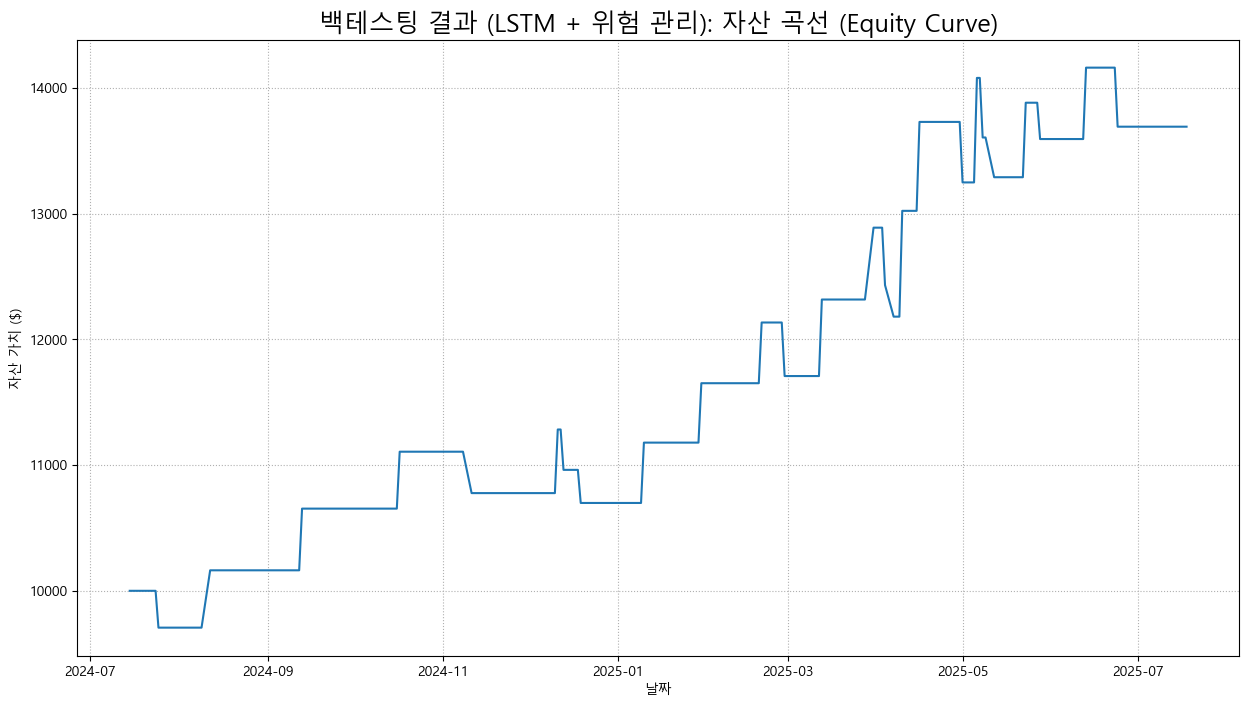

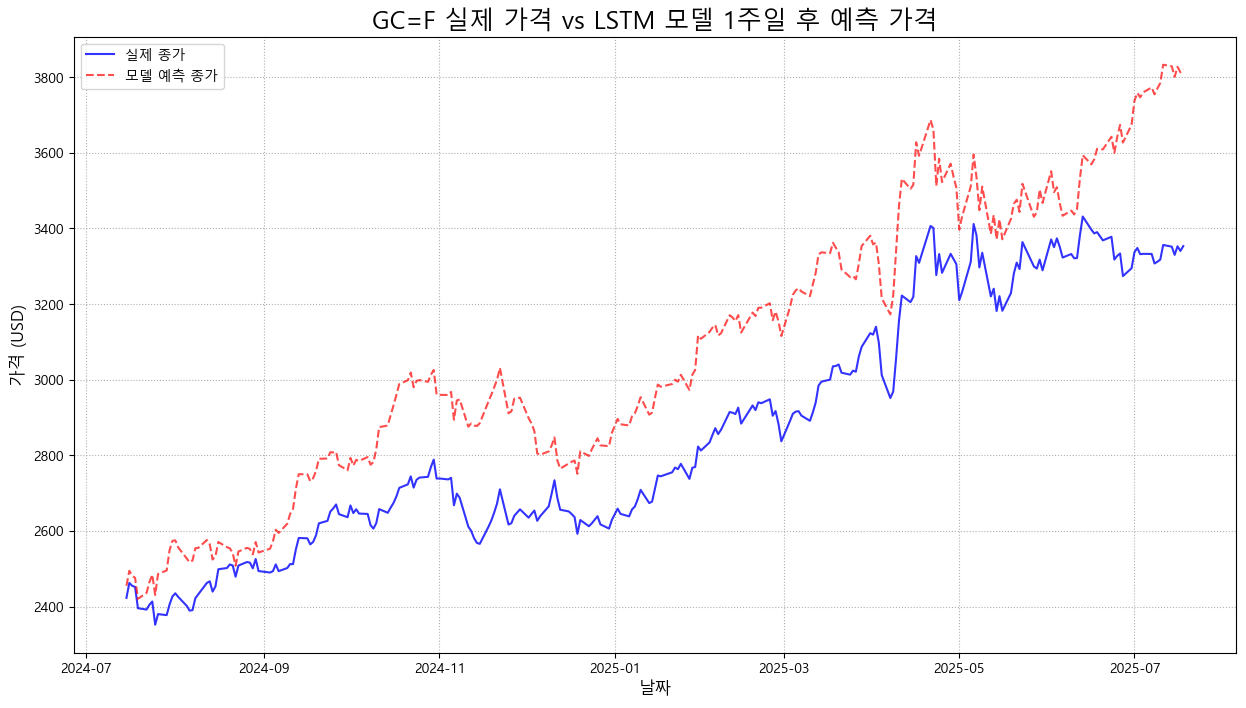

In [2]:
# ==========================================================================
# 중요: 코드 실행 전, 먼저 이 셀을 실행하여 tensorflow 라이브러리를 설치해주세요.
# ==========================================================================
!pip install yfinance pandas matplotlib scikit-learn tensorflow

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --------------------------------------------------------------------------
# 1. 한글 폰트 설정
# --------------------------------------------------------------------------
try:
    plt.rc('font', family='Malgun Gothic') 
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"한글 폰트 설정에 실패했습니다. 설치된 폰트 이름을 확인해주세요. 오류: {e}")
    print("기본 폰트로 차트를 생성합니다.")

# --------------------------------------------------------------------------
# 2. 데이터 다운로드 및 분석 설정
# --------------------------------------------------------------------------
ticker_symbol = 'GC=F'  # 금 선물
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

# --------------------------------------------------------------------------
# 3. 데이터 가져오기 및 특성 공학 (Feature Engineering)
# --------------------------------------------------------------------------
try:
    ticker = yf.Ticker(ticker_symbol)
    data = ticker.history(start=start_date, end=end_date, auto_adjust=False)

    if data.empty:
        print(f"'{ticker_symbol}'에 대한 데이터를 가져올 수 없습니다. 티커나 기간을 확인해주세요.")
    else:
        # --- 예측에 사용할 기술적 지표(Feature) 계산 ---
        data['Return'] = data['Close'].pct_change() # 수익률
        data['Volatility'] = data['Return'].rolling(window=20).std()
        data['Short_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=20).mean()
        data['Long_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=60).mean()
        
        delta = data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        data['RSI'] = 100 - (100 / (1 + rs))

        # 예측 목표: 5일 후의 수익률
        data['Target'] = data['Close'].pct_change(5).shift(-5)
        
        # 사용할 특성 선택 및 결측치 제거
        features = ['Close', 'Volume', 'Return', 'Volatility', 'Short_MA_Ratio', 'Long_MA_Ratio', 'RSI']
        data.dropna(inplace=True)
        
        # ------------------------------------------------------------------
        # 4. [개선] LSTM을 위한 데이터 전처리 및 시퀀스 생성
        # ------------------------------------------------------------------
        # 데이터 정규화
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(data[features])
        
        # 시퀀스 데이터 생성
        sequence_length = 60 # 과거 60일 데이터를 보고 예측
        X, y = [], []
        for i in range(len(scaled_features) - sequence_length):
            X.append(scaled_features[i:i+sequence_length])
            y.append(data['Target'].iloc[i + sequence_length -1]) # 각 시퀀스의 마지막 날을 기준으로 Target 설정
        
        X, y = np.array(X), np.array(y)
        
        # 학습/테스트 데이터 분리
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
        
        # 백테스팅을 위해 원래 데이터프레임도 분리
        test_data_df = data.iloc[-len(y_test):]

        print("LSTM 모델을 위한 데이터 준비 완료.")
        
        # ------------------------------------------------------------------
        # 5. [개선] LSTM 모델 구축 및 학습
        # ------------------------------------------------------------------
        model = Sequential([
            LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
            Dropout(0.2),
            LSTM(units=50, return_sequences=False),
            Dropout(0.2),
            Dense(units=25),
            Dense(units=1)
        ])

        model.compile(optimizer='adam', loss='mean_squared_error')
        
        print("\nLSTM 모델 학습을 시작합니다...")
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

        # ------------------------------------------------------------------
        # 6. 미래 가격 예측 (LSTM 모델 사용)
        # ------------------------------------------------------------------
        last_sequence = X[-1].reshape(1, sequence_length, X.shape[2])
        week_later_return_prediction = model.predict(last_sequence)[0][0]
        
        last_close = data['Close'].iloc[-1]
        week_later_price_prediction = last_close * (1 + week_later_return_prediction)
        
        if week_later_return_prediction > 0.005:
            signal_text = "상승 가능성 (매수 고려)"
        elif week_later_return_prediction < -0.005:
            signal_text = "하락 가능성 (매도 고려)"
        else:
            signal_text = "횡보 또는 보합 예상"

        print("-" * 50)
        print(f"가장 최근 데이터 ({data.index[-1].strftime('%Y-%m-%d')}) 기준")
        print(f"▶ 1주일 후 예측 수익률: {week_later_return_prediction:.2%}")
        print(f"▶ 1주일 후 종가 예측: ${week_later_price_prediction:.2f}")
        print(f"▶ 예측 기반 신호: {signal_text}")
        print("-" * 50)

        # ------------------------------------------------------------------
        # 7. 백테스팅 (LSTM 예측 결과 기반)
        # ------------------------------------------------------------------
        print("\nLSTM 모델 기반 백테스팅을 시작합니다...")
        
        predictions_return = model.predict(X_test).flatten()
        
        initial_capital = 10000.0
        stop_loss_pct = 0.02
        take_profit_pct = 0.04
        entry_threshold = 0.005

        capital = initial_capital
        position = 0
        entry_price = 0
        equity_curve = []
        trades = []

        for i in range(len(test_data_df)):
            current_price = test_data_df['Close'].iloc[i]
            
            if position != 0:
                if (position == 1 and current_price < entry_price * (1 - stop_loss_pct)) or \
                   (position == -1 and current_price > entry_price * (1 + stop_loss_pct)) or \
                   (position == 1 and current_price > entry_price * (1 + take_profit_pct)) or \
                   (position == -1 and current_price < entry_price * (1 - take_profit_pct)):
                    trade_return = (current_price / entry_price - 1) * position
                    capital *= (1 + trade_return)
                    trades.append(trade_return)
                    position = 0
            
            if position == 0:
                predicted_return = predictions_return[i]
                if predicted_return > entry_threshold:
                    position = 1
                    entry_price = current_price
                elif predicted_return < -entry_threshold:
                    position = -1
                    entry_price = current_price
            
            equity_curve.append(capital)

        total_trades = len(trades)
        winning_trades = sum(1 for r in trades if r > 0)
        win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
        final_return = (capital / initial_capital - 1) * 100
        
        print(f"백테스팅 기간: {test_data_df.index[0].strftime('%Y-%m-%d')} ~ {test_data_df.index[-1].strftime('%Y-%m-%d')}")
        print(f"총 거래 횟수: {total_trades}")
        print(f"승률: {win_rate:.2f}%")
        print(f"최종 누적 수익률: {final_return:.2f}%")
        
        plt.figure(figsize=(15, 8))
        plt.plot(test_data_df.index, equity_curve)
        plt.title('백테스팅 결과 (LSTM + 위험 관리): 자산 곡선 (Equity Curve)', fontsize=18)
        plt.xlabel('날짜')
        plt.ylabel('자산 가치 ($)')
        plt.grid(True, linestyle=':')
        plt.show()
        
        # ------------------------------------------------------------------
        # 8. 결과 시각화
        # ------------------------------------------------------------------
        predicted_prices = test_data_df['Close'] * (1 + predictions_return)
        
        plt.figure(figsize=(15, 8))
        plt.title(f'{ticker_symbol} 실제 가격 vs LSTM 모델 1주일 후 예측 가격', fontsize=18)
        plt.plot(test_data_df.index, test_data_df['Close'], label='실제 종가', color='blue', alpha=0.8)
        plt.plot(test_data_df.index, predicted_prices, label='모델 예측 종가', color='red', linestyle='--', alpha=0.7)
        plt.xlabel('날짜', fontsize=12)
        plt.ylabel('가격 (USD)', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle=':')
        plt.show()

except Exception as e:
    print(f"\n코드 실행 중 오류가 발생했습니다: {e}")

'gold_data.csv' 파일에서 데이터를 불러옵니다.
데이터를 성공적으로 불러왔습니다.
LSTM 모델을 위한 데이터 준비 완료.

저장된 모델이 없습니다. 새로운 모델 학습을 시작합니다...
Epoch 1/50


C:\Users\onesa\anaconda3\envs\stock_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0542 - val_loss: 0.0021
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0041 - val_loss: 0.0055
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 9.8855e-04 - val_loss: 0.0021
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 9.3445e-04 - val_loss: 0.0018
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 8.2530e-04 - val_loss: 0.0021
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 7.5485e-04 - val_loss: 0.0022
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss

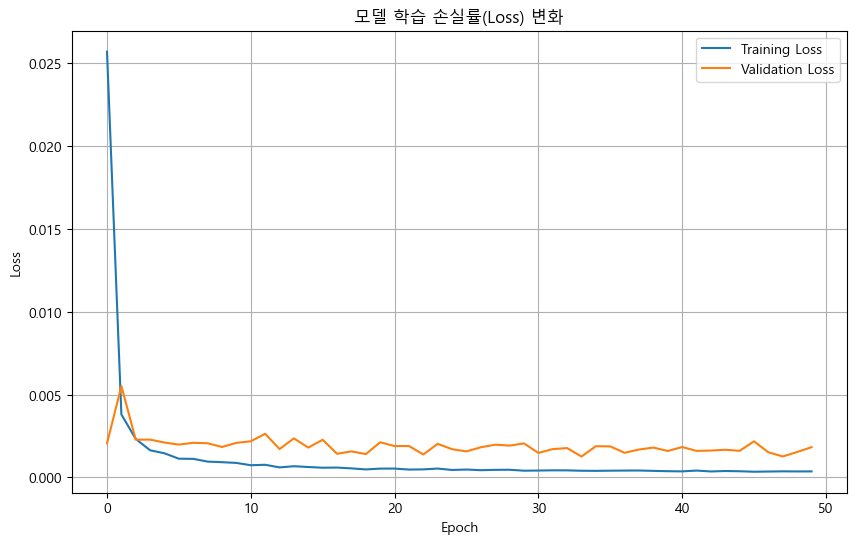

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
--------------------------------------------------

코드 실행 중 오류가 발생했습니다: 'str' object has no attribute 'strftime'


In [4]:
# ==========================================================================
# 최종 실행 코드
# ==========================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import time
import os

# --------------------------------------------------------------------------
# 1. 한글 폰트 설정
# --------------------------------------------------------------------------
try:
    plt.rc('font', family='Malgun Gothic') 
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"한글 폰트 설정에 실패했습니다. 설치된 폰트 이름을 확인해주세요. 오류: {e}")
    print("기본 폰트로 차트를 생성합니다.")

# --------------------------------------------------------------------------
# 2. 데이터 다운로드 및 분석 설정
# --------------------------------------------------------------------------
ticker_symbol = 'GC=F'  # 금 선물
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')
data_filename = 'gold_data.csv' 
model_filename = 'gold_predictor_model.keras' # 학습된 모델을 저장할 파일 이름

# --------------------------------------------------------------------------
# 3. 데이터 가져오기 및 특성 공학 (Feature Engineering)
# --------------------------------------------------------------------------
try:
    force_refresh = False 

    if force_refresh or not os.path.exists(data_filename):
        print("Yahoo Finance에 데이터를 요청합니다... (최초 1회 또는 강제 새로고침 시)")
        try:
            time.sleep(2)
            ticker = yf.Ticker(ticker_symbol)
            data = ticker.history(start=start_date, end=end_date, auto_adjust=False)
            if data.empty: raise Exception("다운로드된 데이터가 비어있습니다.")
            data.to_csv(data_filename)
            print(f"데이터를 다운로드하여 '{data_filename}' 파일로 저장했습니다.")
        except Exception as e:
            print(f"데이터 다운로드 중 오류 발생: {e}")
            if not os.path.exists(data_filename):
                 raise FileNotFoundError(f"'{data_filename}' 파일을 찾을 수 없습니다.")
            
    print(f"'{data_filename}' 파일에서 데이터를 불러옵니다.")
    try:
        # [수정] CSV 파일 형식 문제를 해결하기 위해 가장 안정적인 방법으로 데이터 로딩 방식을 변경합니다.
        # index_col=0: 첫 번째 열을 인덱스로 사용합니다.
        # parse_dates=True: 인덱스 열을 날짜 형식으로 자동 변환합니다.
        data = pd.read_csv(data_filename, index_col=0, parse_dates=True, encoding='utf-8-sig')
        data.index.name = 'Date' # 인덱스 이름을 'Date'로 명시적으로 지정합니다.
        print("데이터를 성공적으로 불러왔습니다.")
    except Exception as e:
        print("-" * 50)
        print(f"'{data_filename}' 파일을 읽는 중 오류가 발생했습니다: {e}")
        print("파일의 내용이 올바른 CSV 형식인지, 첫 번째 열이 날짜인지 다시 한번 확인해주세요.")
        print("-" * 50)
        raise

    if not data.empty:
        # --- 기술적 지표 계산 ---
        data['Return'] = data['Close'].pct_change()
        data['Volatility'] = data['Return'].rolling(window=20).std()
        data['Short_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=20).mean()
        data['Long_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=60).mean()
        delta = data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        data['RSI'] = 100 - (100 / (1 + rs))
        data['Target'] = data['Close'].pct_change(5).shift(-5)
        features = ['Close', 'Volume', 'Return', 'Volatility', 'Short_MA_Ratio', 'Long_MA_Ratio', 'RSI']
        data.dropna(inplace=True)
        
        # ------------------------------------------------------------------
        # 4. LSTM을 위한 데이터 전처리
        # ------------------------------------------------------------------
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(data[features])
        sequence_length = 60
        X, y = [], []
        for i in range(len(scaled_features) - sequence_length):
            X.append(scaled_features[i:i+sequence_length])
            y.append(data['Target'].iloc[i + sequence_length -1])
        X, y = np.array(X), np.array(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
        test_data_df = data.iloc[-len(y_test):]
        print("LSTM 모델을 위한 데이터 준비 완료.")
        
        # ------------------------------------------------------------------
        # 5. LSTM 모델 학습 또는 불러오기
        # ------------------------------------------------------------------
        if os.path.exists(model_filename):
            print(f"\n저장된 모델 '{model_filename}'을 불러옵니다.")
            model = load_model(model_filename)
        else:
            print(f"\n저장된 모델이 없습니다. 새로운 모델 학습을 시작합니다...")
            model = Sequential([
                LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
                Dropout(0.2),
                LSTM(units=50, return_sequences=False),
                Dropout(0.2),
                Dense(units=25),
                Dense(units=1)
            ])
            model.compile(optimizer='adam', loss='mean_squared_error')
            history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
            
            model.save(model_filename)
            print(f"학습된 모델을 '{model_filename}' 파일로 저장했습니다.")

            plt.figure(figsize=(10, 6))
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.title('모델 학습 손실률(Loss) 변화')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True)
            plt.show()

        # ------------------------------------------------------------------
        # 6. 미래 가격 예측 (LSTM 모델 사용)
        # ------------------------------------------------------------------
        last_sequence = X[-1].reshape(1, sequence_length, X.shape[2])
        week_later_return_prediction = model.predict(last_sequence)[0][0]
        last_close = data['Close'].iloc[-1]
        week_later_price_prediction = last_close * (1 + week_later_return_prediction)
        
        if week_later_return_prediction > 0.005: signal_text = "상승 가능성 (매수 고려)"
        elif week_later_return_prediction < -0.005: signal_text = "하락 가능성 (매도 고려)"
        else: signal_text = "횡보 또는 보합 예상"

        print("-" * 50)
        print(f"가장 최근 데이터 ({data.index[-1].strftime('%Y-%m-%d')}) 기준")
        print(f"▶ 1주일 후 예측 수익률: {week_later_return_prediction:.2%}")
        print(f"▶ 1주일 후 종가 예측: ${week_later_price_prediction:.2f}")
        print(f"▶ 예측 기반 신호: {signal_text}")
        print("-" * 50)

        # ------------------------------------------------------------------
        # 7. 백테스팅 (LSTM 예측 결과 기반)
        # ------------------------------------------------------------------
        print("\nLSTM 모델 기반 백테스팅을 시작합니다...")
        predictions_return = model.predict(X_test).flatten()
        initial_capital = 10000.0
        stop_loss_pct = 0.02
        take_profit_pct = 0.04
        entry_threshold = 0.005
        capital = initial_capital
        position = 0
        entry_price = 0
        equity_curve = []
        trades = []

        for i in range(len(test_data_df)):
            current_price = test_data_df['Close'].iloc[i]
            if position != 0:
                if (position == 1 and current_price < entry_price * (1 - stop_loss_pct)) or \
                   (position == -1 and current_price > entry_price * (1 + stop_loss_pct)) or \
                   (position == 1 and current_price > entry_price * (1 + take_profit_pct)) or \
                   (position == -1 and current_price < entry_price * (1 - take_profit_pct)):
                    trade_return = (current_price / entry_price - 1) * position
                    capital *= (1 + trade_return)
                    trades.append(trade_return)
                    position = 0
            if position == 0:
                predicted_return = predictions_return[i]
                if predicted_return > entry_threshold:
                    position = 1
                    entry_price = current_price
                elif predicted_return < -entry_threshold:
                    position = -1
                    entry_price = current_price
            equity_curve.append(capital)

        total_trades = len(trades)
        winning_trades = sum(1 for r in trades if r > 0)
        win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
        final_return = (capital / initial_capital - 1) * 100
        
        print(f"백테스팅 기간: {test_data_df.index[0].strftime('%Y-%m-%d')} ~ {test_data_df.index[-1].strftime('%Y-%m-%d')}")
        print(f"총 거래 횟수: {total_trades}")
        print(f"승률: {win_rate:.2f}%")
        print(f"최종 누적 수익률: {final_return:.2f}%")
        
        plt.figure(figsize=(15, 8))
        plt.plot(test_data_df.index, equity_curve)
        plt.title('백테스팅 결과 (LSTM + 위험 관리): 자산 곡선 (Equity Curve)', fontsize=18)
        plt.xlabel('날짜')
        plt.ylabel('자산 가치 ($)')
        plt.grid(True, linestyle=':')
        plt.show()
        
        # ------------------------------------------------------------------
        # 8. 결과 시각화
        # ------------------------------------------------------------------
        predicted_prices = test_data_df['Close'] * (1 + predictions_return)
        plt.figure(figsize=(15, 8))
        plt.title(f'{ticker_symbol} 실제 가격 vs LSTM 모델 1주일 후 예측 가격', fontsize=18)
        plt.plot(test_data_df.index, test_data_df['Close'], label='실제 종가', color='blue', alpha=0.8)
        plt.plot(test_data_df.index, predicted_prices, label='모델 예측 종가', color='red', linestyle='--', alpha=0.7)
        plt.xlabel('날짜', fontsize=12)
        plt.ylabel('가격 (USD)', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle=':')
        plt.show()

except Exception as e:
    print(f"\n코드 실행 중 오류가 발생했습니다: {e}")

In [ ]:
# 다시 코드수정

'gold_data.csv' 파일에서 데이터를 불러옵니다.
데이터를 성공적으로 불러왔습니다.
LSTM 모델을 위한 데이터 준비 완료.

저장된 모델 'gold_predictor_model.keras'을 불러옵니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
--------------------------------------------------
가장 최근 데이터 (2024-07-19) 기준
▶ 1주일 후 예측 수익률: -4.48%
▶ 1주일 후 종가 예측: $2325.98
▶ 예측 기반 신호: 하락 가능성 (매도 고려)
--------------------------------------------------

LSTM 모델 기반 백테스팅을 시작합니다...
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
백테스팅 기간: 2023-09-28 ~ 2024-07-19
총 거래 횟수: 17
승률: 17.65%
최종 누적 수익률: -22.61%


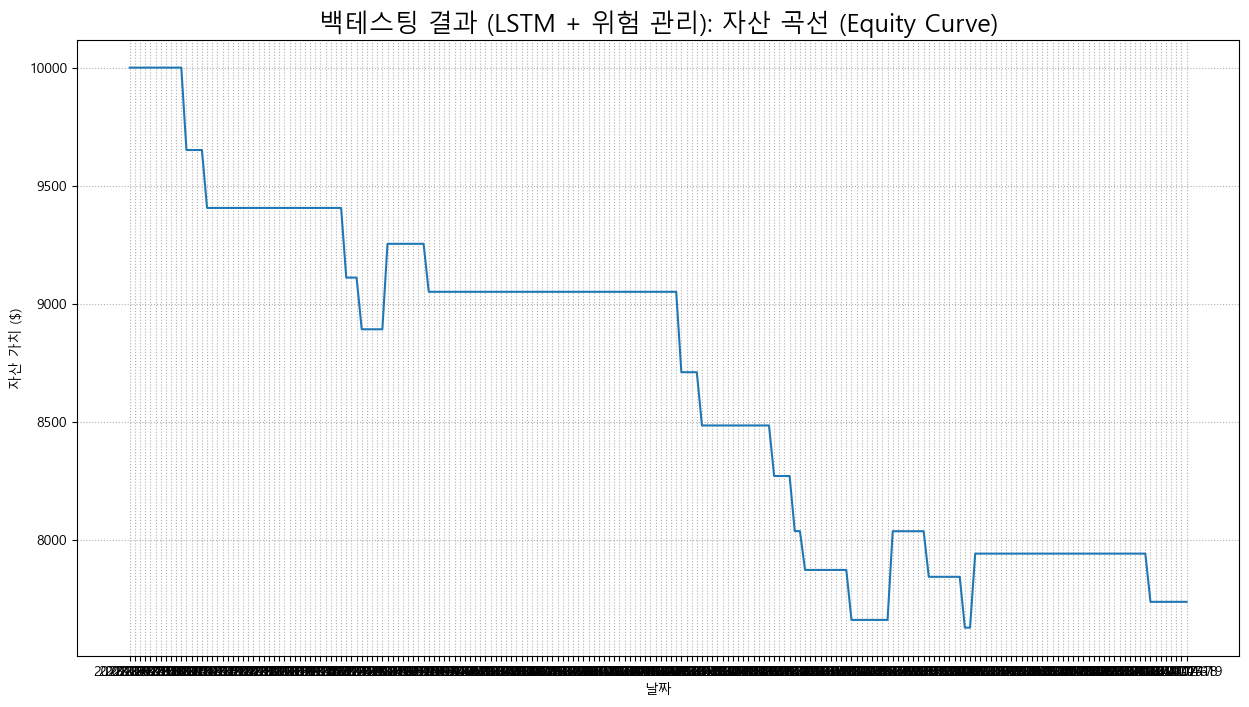

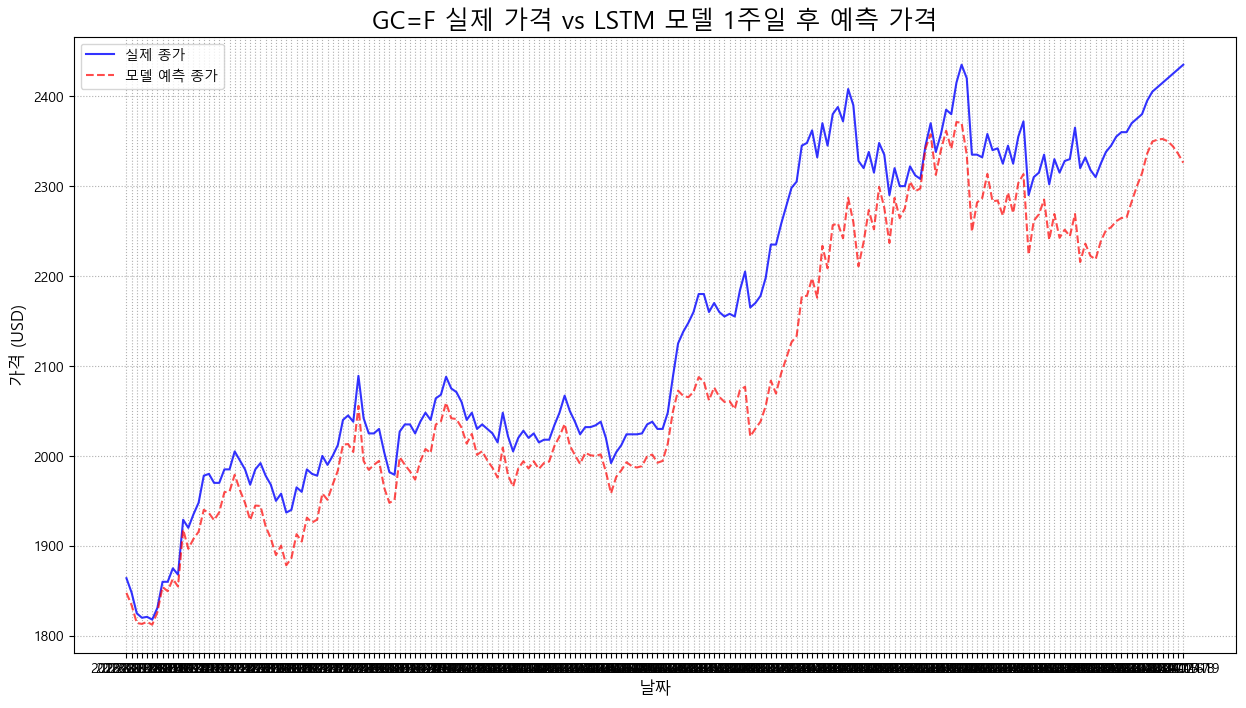

In [5]:
# ==========================================================================
# 최종 실행 코드
# ==========================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import time
import os

# --------------------------------------------------------------------------
# 1. 한글 폰트 설정
# --------------------------------------------------------------------------
try:
    plt.rc('font', family='Malgun Gothic') 
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"한글 폰트 설정에 실패했습니다. 설치된 폰트 이름을 확인해주세요. 오류: {e}")
    print("기본 폰트로 차트를 생성합니다.")

# --------------------------------------------------------------------------
# 2. 데이터 다운로드 및 분석 설정
# --------------------------------------------------------------------------
ticker_symbol = 'GC=F'  # 금 선물
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')
data_filename = 'gold_data.csv' 
model_filename = 'gold_predictor_model.keras' # 학습된 모델을 저장할 파일 이름

# --------------------------------------------------------------------------
# 3. 데이터 가져오기 및 특성 공학 (Feature Engineering)
# --------------------------------------------------------------------------
try:
    force_refresh = False 

    if force_refresh or not os.path.exists(data_filename):
        print("Yahoo Finance에 데이터를 요청합니다... (최초 1회 또는 강제 새로고침 시)")
        try:
            time.sleep(2)
            ticker = yf.Ticker(ticker_symbol)
            data = ticker.history(start=start_date, end=end_date, auto_adjust=False)
            if data.empty: raise Exception("다운로드된 데이터가 비어있습니다.")
            data.to_csv(data_filename)
            print(f"데이터를 다운로드하여 '{data_filename}' 파일로 저장했습니다.")
        except Exception as e:
            print(f"데이터 다운로드 중 오류 발생: {e}")
            if not os.path.exists(data_filename):
                 raise FileNotFoundError(f"'{data_filename}' 파일을 찾을 수 없습니다.")
            
    print(f"'{data_filename}' 파일에서 데이터를 불러옵니다.")
    try:
        data = pd.read_csv(data_filename, index_col=0, parse_dates=True, encoding='utf-8-sig')
        data.index.name = 'Date'
        print("데이터를 성공적으로 불러왔습니다.")
    except Exception as e:
        print("-" * 50)
        print(f"'{data_filename}' 파일을 읽는 중 오류가 발생했습니다: {e}")
        print("파일의 내용이 올바른 CSV 형식인지, 첫 번째 열이 날짜인지 다시 한번 확인해주세요.")
        print("-" * 50)
        raise

    if not data.empty:
        # --- 기술적 지표 계산 ---
        data['Return'] = data['Close'].pct_change()
        data['Volatility'] = data['Return'].rolling(window=20).std()
        data['Short_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=20).mean()
        data['Long_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=60).mean()
        delta = data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        data['RSI'] = 100 - (100 / (1 + rs))
        data['Target'] = data['Close'].pct_change(5).shift(-5)
        features = ['Close', 'Volume', 'Return', 'Volatility', 'Short_MA_Ratio', 'Long_MA_Ratio', 'RSI']
        data.dropna(inplace=True)
        
        # ------------------------------------------------------------------
        # 4. LSTM을 위한 데이터 전처리
        # ------------------------------------------------------------------
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(data[features])
        sequence_length = 60
        X, y = [], []
        for i in range(len(scaled_features) - sequence_length):
            X.append(scaled_features[i:i+sequence_length])
            y.append(data['Target'].iloc[i + sequence_length -1])
        X, y = np.array(X), np.array(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
        test_data_df = data.iloc[-len(y_test):]
        print("LSTM 모델을 위한 데이터 준비 완료.")
        
        # ------------------------------------------------------------------
        # 5. LSTM 모델 학습 또는 불러오기
        # ------------------------------------------------------------------
        if os.path.exists(model_filename):
            print(f"\n저장된 모델 '{model_filename}'을 불러옵니다.")
            model = load_model(model_filename)
        else:
            print(f"\n저장된 모델이 없습니다. 새로운 모델 학습을 시작합니다...")
            model = Sequential([
                LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
                Dropout(0.2),
                LSTM(units=50, return_sequences=False),
                Dropout(0.2),
                Dense(units=25),
                Dense(units=1)
            ])
            model.compile(optimizer='adam', loss='mean_squared_error')
            history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
            
            model.save(model_filename)
            print(f"학습된 모델을 '{model_filename}' 파일로 저장했습니다.")

            plt.figure(figsize=(10, 6))
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.title('모델 학습 손실률(Loss) 변화')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True)
            plt.show()

        # ------------------------------------------------------------------
        # 6. 미래 가격 예측 (LSTM 모델 사용)
        # ------------------------------------------------------------------
        last_sequence = X[-1].reshape(1, sequence_length, X.shape[2])
        week_later_return_prediction = model.predict(last_sequence)[0][0]
        last_close = data['Close'].iloc[-1]
        week_later_price_prediction = last_close * (1 + week_later_return_prediction)
        
        if week_later_return_prediction > 0.005: signal_text = "상승 가능성 (매수 고려)"
        elif week_later_return_prediction < -0.005: signal_text = "하락 가능성 (매도 고려)"
        else: signal_text = "횡보 또는 보합 예상"

        print("-" * 50)
        # [수정] 날짜를 출력하기 전에 명시적으로 datetime 객체로 변환하여 오류를 방지합니다.
        latest_date = pd.to_datetime(data.index[-1])
        print(f"가장 최근 데이터 ({latest_date.strftime('%Y-%m-%d')}) 기준")
        print(f"▶ 1주일 후 예측 수익률: {week_later_return_prediction:.2%}")
        print(f"▶ 1주일 후 종가 예측: ${week_later_price_prediction:.2f}")
        print(f"▶ 예측 기반 신호: {signal_text}")
        print("-" * 50)

        # ------------------------------------------------------------------
        # 7. 백테스팅 (LSTM 예측 결과 기반)
        # ------------------------------------------------------------------
        print("\nLSTM 모델 기반 백테스팅을 시작합니다...")
        predictions_return = model.predict(X_test).flatten()
        initial_capital = 10000.0
        stop_loss_pct = 0.02
        take_profit_pct = 0.04
        entry_threshold = 0.005
        capital = initial_capital
        position = 0
        entry_price = 0
        equity_curve = []
        trades = []

        for i in range(len(test_data_df)):
            current_price = test_data_df['Close'].iloc[i]
            if position != 0:
                if (position == 1 and current_price < entry_price * (1 - stop_loss_pct)) or \
                   (position == -1 and current_price > entry_price * (1 + stop_loss_pct)) or \
                   (position == 1 and current_price > entry_price * (1 + take_profit_pct)) or \
                   (position == -1 and current_price < entry_price * (1 - take_profit_pct)):
                    trade_return = (current_price / entry_price - 1) * position
                    capital *= (1 + trade_return)
                    trades.append(trade_return)
                    position = 0
            if position == 0:
                predicted_return = predictions_return[i]
                if predicted_return > entry_threshold:
                    position = 1
                    entry_price = current_price
                elif predicted_return < -entry_threshold:
                    position = -1
                    entry_price = current_price
            equity_curve.append(capital)

        total_trades = len(trades)
        winning_trades = sum(1 for r in trades if r > 0)
        win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
        final_return = (capital / initial_capital - 1) * 100
        
        # [수정] 날짜를 출력하기 전에 명시적으로 datetime 객체로 변환하여 오류를 방지합니다.
        start_test_date = pd.to_datetime(test_data_df.index[0])
        end_test_date = pd.to_datetime(test_data_df.index[-1])
        print(f"백테스팅 기간: {start_test_date.strftime('%Y-%m-%d')} ~ {end_test_date.strftime('%Y-%m-%d')}")
        print(f"총 거래 횟수: {total_trades}")
        print(f"승률: {win_rate:.2f}%")
        print(f"최종 누적 수익률: {final_return:.2f}%")
        
        plt.figure(figsize=(15, 8))
        plt.plot(test_data_df.index, equity_curve)
        plt.title('백테스팅 결과 (LSTM + 위험 관리): 자산 곡선 (Equity Curve)', fontsize=18)
        plt.xlabel('날짜')
        plt.ylabel('자산 가치 ($)')
        plt.grid(True, linestyle=':')
        plt.show()
        
        # ------------------------------------------------------------------
        # 8. 결과 시각화
        # ------------------------------------------------------------------
        predicted_prices = test_data_df['Close'] * (1 + predictions_return)
        plt.figure(figsize=(15, 8))
        plt.title(f'{ticker_symbol} 실제 가격 vs LSTM 모델 1주일 후 예측 가격', fontsize=18)
        plt.plot(test_data_df.index, test_data_df['Close'], label='실제 종가', color='blue', alpha=0.8)
        plt.plot(test_data_df.index, predicted_prices, label='모델 예측 종가', color='red', linestyle='--', alpha=0.7)
        plt.xlabel('날짜', fontsize=12)
        plt.ylabel('가격 (USD)', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle=':')
        plt.show()

except Exception as e:
    print(f"\n코드 실행 중 오류가 발생했습니다: {e}")

In [ ]:
# 성능을 더 끌어올림

'gold_data.csv' 파일에서 데이터를 불러옵니다.
데이터를 성공적으로 불러왔습니다.
LSTM 모델을 위한 데이터 준비 완료.

저장된 모델이 없습니다. 새로운 모델 학습을 시작합니다...


C:\Users\onesa\anaconda3\envs\stock_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - loss: 0.0023 - val_loss: 8.7185e-04 - learning_rate: 0.0010
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 6.6102e-04 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 5.1322e-04 - val_loss: 9.5864e-04 - learning_rate: 0.0010
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 4.0931e-04 - val_loss: 7.5428e-04 - learning_rate: 0.0010
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 4.2330e-04 - val_loss: 5.8350e-04 - learning_rate: 0.0010
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - loss: 3.6147e-04 - val_loss: 7.0709e-04 - learning_rate: 0.0010
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - loss: 3.4315e-04 - val_loss: 9.3521e-04 - learning_rate: 0.0010
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 3.6575e-04 - val_loss: 7.7922e-04 - learning_rate: 0.0010
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - 

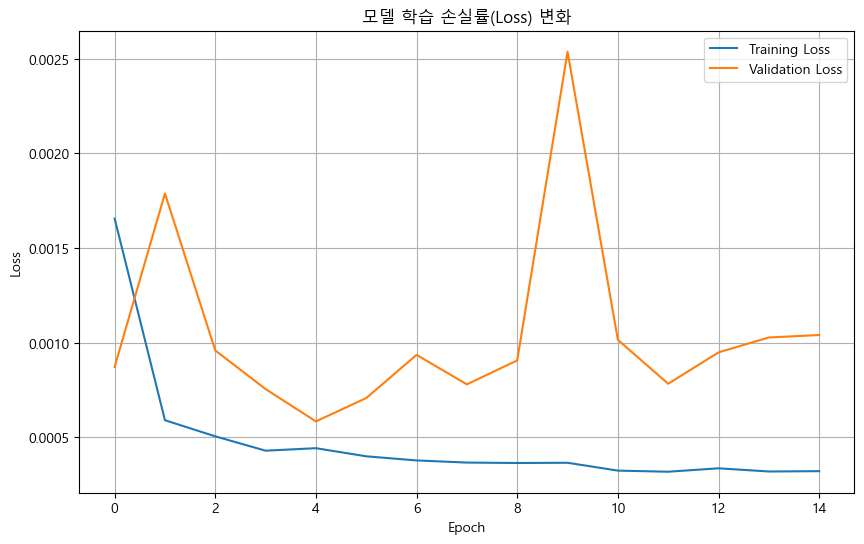

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
--------------------------------------------------
가장 최근 데이터 (2024-07-19) 기준
▶ 1주일 후 예측 수익률: 1.79%
▶ 1주일 후 종가 예측: $2478.56
▶ 예측 기반 신호: 상승 가능성 (매수 고려)
--------------------------------------------------

LSTM 모델 기반 백테스팅을 시작합니다...
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
백테스팅 기간: 2023-09-28 ~ 2024-07-19
총 거래 횟수: 13
승률: 15.38%
최종 누적 수익률: -20.80%


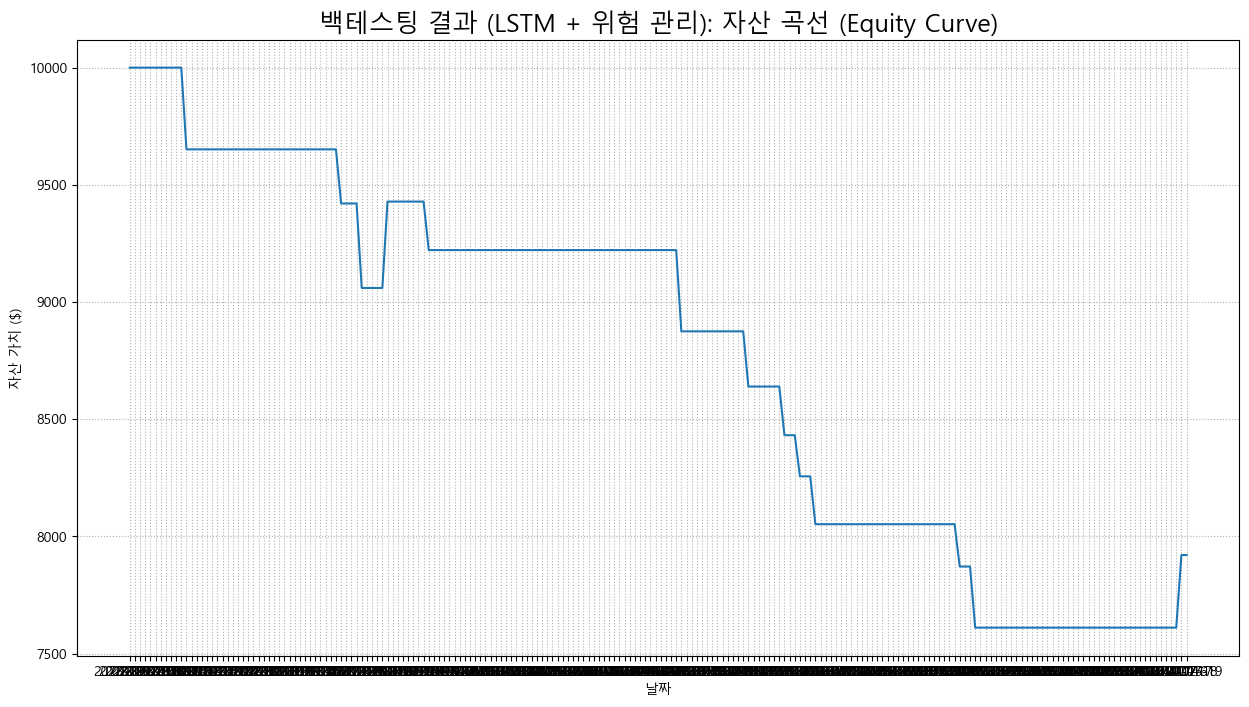

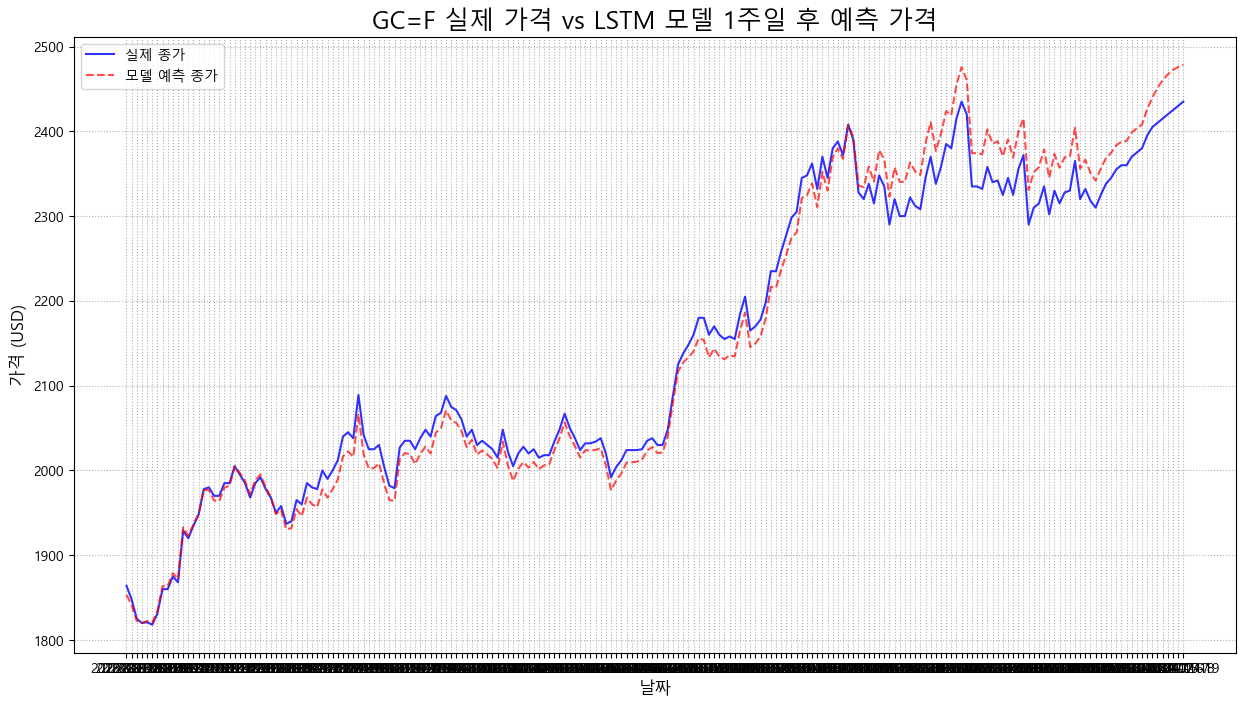

In [6]:
# ==========================================================================
# 최종 실행 코드
# ==========================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau # 지능적인 학습 제어를 위해 추가
import time
import os

# --------------------------------------------------------------------------
# 1. 한글 폰트 설정
# --------------------------------------------------------------------------
try:
    plt.rc('font', family='Malgun Gothic') 
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"한글 폰트 설정에 실패했습니다. 설치된 폰트 이름을 확인해주세요. 오류: {e}")
    print("기본 폰트로 차트를 생성합니다.")

# --------------------------------------------------------------------------
# 2. 데이터 다운로드 및 분석 설정
# --------------------------------------------------------------------------
ticker_symbol = 'GC=F'  # 금 선물
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')
data_filename = 'gold_data.csv' 
model_filename = 'gold_predictor_model_v2.keras' # 업그레이드된 모델을 위한 새 파일 이름

# --------------------------------------------------------------------------
# 3. 데이터 가져오기 및 특성 공학 (Feature Engineering)
# --------------------------------------------------------------------------
try:
    force_refresh = False 

    if force_refresh or not os.path.exists(data_filename):
        print("Yahoo Finance에 데이터를 요청합니다... (최초 1회 또는 강제 새로고침 시)")
        try:
            time.sleep(2)
            ticker = yf.Ticker(ticker_symbol)
            data = ticker.history(start=start_date, end=end_date, auto_adjust=False)
            if data.empty: raise Exception("다운로드된 데이터가 비어있습니다.")
            data.to_csv(data_filename)
            print(f"데이터를 다운로드하여 '{data_filename}' 파일로 저장했습니다.")
        except Exception as e:
            print(f"데이터 다운로드 중 오류 발생: {e}")
            if not os.path.exists(data_filename):
                 raise FileNotFoundError(f"'{data_filename}' 파일을 찾을 수 없습니다.")
            
    print(f"'{data_filename}' 파일에서 데이터를 불러옵니다.")
    try:
        data = pd.read_csv(data_filename, index_col=0, parse_dates=True, encoding='utf-8-sig')
        data.index.name = 'Date'
        print("데이터를 성공적으로 불러왔습니다.")
    except Exception as e:
        print("-" * 50)
        print(f"'{data_filename}' 파일을 읽는 중 오류가 발생했습니다: {e}")
        print("파일의 내용이 올바른 CSV 형식인지, 첫 번째 열이 날짜인지 다시 한번 확인해주세요.")
        print("-" * 50)
        raise

    if not data.empty:
        # --- 기술적 지표 계산 ---
        data['Return'] = data['Close'].pct_change()
        data['Volatility'] = data['Return'].rolling(window=20).std()
        data['Short_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=20).mean()
        data['Long_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=60).mean()
        delta = data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        data['RSI'] = 100 - (100 / (1 + rs))
        data['Target'] = data['Close'].pct_change(5).shift(-5)
        features = ['Close', 'Volume', 'Return', 'Volatility', 'Short_MA_Ratio', 'Long_MA_Ratio', 'RSI']
        data.dropna(inplace=True)
        
        # ------------------------------------------------------------------
        # 4. LSTM을 위한 데이터 전처리
        # ------------------------------------------------------------------
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(data[features])
        sequence_length = 60
        X, y = [], []
        for i in range(len(scaled_features) - sequence_length):
            X.append(scaled_features[i:i+sequence_length])
            y.append(data['Target'].iloc[i + sequence_length -1])
        X, y = np.array(X), np.array(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
        test_data_df = data.iloc[-len(y_test):]
        print("LSTM 모델을 위한 데이터 준비 완료.")
        
        # ------------------------------------------------------------------
        # 5. [개선] LSTM 모델 학습 또는 불러오기
        # ------------------------------------------------------------------
        if os.path.exists(model_filename):
            print(f"\n저장된 모델 '{model_filename}'을 불러옵니다.")
            model = load_model(model_filename)
        else:
            print(f"\n저장된 모델이 없습니다. 새로운 모델 학습을 시작합니다...")
            # [개선] 모델 구조를 더 깊게 만듭니다.
            model = Sequential([
                LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
                Dropout(0.2),
                LSTM(units=100, return_sequences=True),
                Dropout(0.2),
                LSTM(units=50, return_sequences=False),
                Dropout(0.2),
                Dense(units=50, activation='relu'),
                Dense(units=1)
            ])
            model.compile(optimizer='adam', loss='mean_squared_error')
            
            # [신규] 지능적인 학습 제어를 위한 콜백 설정
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
            reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
            
            # [개선] epochs를 늘리고 콜백을 적용하여 학습
            history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), 
                                verbose=1, callbacks=[early_stopping, reduce_lr])
            
            model.save(model_filename)
            print(f"학습된 모델을 '{model_filename}' 파일로 저장했습니다.")

            plt.figure(figsize=(10, 6))
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.title('모델 학습 손실률(Loss) 변화')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True)
            plt.show()

        # ------------------------------------------------------------------
        # 6. 미래 가격 예측 (LSTM 모델 사용)
        # ------------------------------------------------------------------
        last_sequence = X[-1].reshape(1, sequence_length, X.shape[2])
        week_later_return_prediction = model.predict(last_sequence)[0][0]
        last_close = data['Close'].iloc[-1]
        week_later_price_prediction = last_close * (1 + week_later_return_prediction)
        
        if week_later_return_prediction > 0.005: signal_text = "상승 가능성 (매수 고려)"
        elif week_later_return_prediction < -0.005: signal_text = "하락 가능성 (매도 고려)"
        else: signal_text = "횡보 또는 보합 예상"

        print("-" * 50)
        latest_date = pd.to_datetime(data.index[-1])
        print(f"가장 최근 데이터 ({latest_date.strftime('%Y-%m-%d')}) 기준")
        print(f"▶ 1주일 후 예측 수익률: {week_later_return_prediction:.2%}")
        print(f"▶ 1주일 후 종가 예측: ${week_later_price_prediction:.2f}")
        print(f"▶ 예측 기반 신호: {signal_text}")
        print("-" * 50)

        # ------------------------------------------------------------------
        # 7. 백테스팅 (LSTM 예측 결과 기반)
        # ------------------------------------------------------------------
        print("\nLSTM 모델 기반 백테스팅을 시작합니다...")
        predictions_return = model.predict(X_test).flatten()
        initial_capital = 10000.0
        stop_loss_pct = 0.02
        take_profit_pct = 0.04
        entry_threshold = 0.005
        capital = initial_capital
        position = 0
        entry_price = 0
        equity_curve = []
        trades = []

        for i in range(len(test_data_df)):
            current_price = test_data_df['Close'].iloc[i]
            if position != 0:
                if (position == 1 and current_price < entry_price * (1 - stop_loss_pct)) or \
                   (position == -1 and current_price > entry_price * (1 + stop_loss_pct)) or \
                   (position == 1 and current_price > entry_price * (1 + take_profit_pct)) or \
                   (position == -1 and current_price < entry_price * (1 - take_profit_pct)):
                    trade_return = (current_price / entry_price - 1) * position
                    capital *= (1 + trade_return)
                    trades.append(trade_return)
                    position = 0
            if position == 0:
                predicted_return = predictions_return[i]
                if predicted_return > entry_threshold:
                    position = 1
                    entry_price = current_price
                elif predicted_return < -entry_threshold:
                    position = -1
                    entry_price = current_price
            equity_curve.append(capital)

        total_trades = len(trades)
        winning_trades = sum(1 for r in trades if r > 0)
        win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
        final_return = (capital / initial_capital - 1) * 100
        
        start_test_date = pd.to_datetime(test_data_df.index[0])
        end_test_date = pd.to_datetime(test_data_df.index[-1])
        print(f"백테스팅 기간: {start_test_date.strftime('%Y-%m-%d')} ~ {end_test_date.strftime('%Y-%m-%d')}")
        print(f"총 거래 횟수: {total_trades}")
        print(f"승률: {win_rate:.2f}%")
        print(f"최종 누적 수익률: {final_return:.2f}%")
        
        plt.figure(figsize=(15, 8))
        plt.plot(test_data_df.index, equity_curve)
        plt.title('백테스팅 결과 (LSTM + 위험 관리): 자산 곡선 (Equity Curve)', fontsize=18)
        plt.xlabel('날짜')
        plt.ylabel('자산 가치 ($)')
        plt.grid(True, linestyle=':')
        plt.show()
        
        # ------------------------------------------------------------------
        # 8. 결과 시각화
        # ------------------------------------------------------------------
        predicted_prices = test_data_df['Close'] * (1 + predictions_return)
        plt.figure(figsize=(15, 8))
        plt.title(f'{ticker_symbol} 실제 가격 vs LSTM 모델 1주일 후 예측 가격', fontsize=18)
        plt.plot(test_data_df.index, test_data_df['Close'], label='실제 종가', color='blue', alpha=0.8)
        plt.plot(test_data_df.index, predicted_prices, label='모델 예측 종가', color='red', linestyle='--', alpha=0.7)
        plt.xlabel('날짜', fontsize=12)
        plt.ylabel('가격 (USD)', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle=':')
        plt.show()

except Exception as e:
    print(f"\n코드 실행 중 오류가 발생했습니다: {e}")

In [ ]:
# 방향을 바꿔 회귀가 아닌 오르냐 내리냐로 검토

'gold_data.csv' 파일에서 데이터를 불러옵니다.
데이터를 성공적으로 불러왔습니다.
LSTM 분류 모델을 위한 데이터 준비 완료.

저장된 모델이 없습니다. 새로운 모델 학습을 시작합니다...


C:\Users\onesa\anaconda3\envs\stock_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - accuracy: 0.5250 - loss: 1.0326 - val_accuracy: 0.5652 - val_loss: 1.1788 - learning_rate: 0.0010
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.5993 - loss: 0.9167 - val_accuracy: 0.5652 - val_loss: 1.3267 - learning_rate: 0.0010
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6221 - loss: 0.8818 - val_accuracy: 0.5652 - val_loss: 1.3797 - learning_rate: 0.0010
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.6149 - loss: 0.8615 - val_accuracy: 0.5749 - val_loss: 1.3319 - learning_rate: 0.0010
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6172 - loss: 0.8502 - val_accuracy: 0.4734 - val_loss: 1.5149 - learning_rate: 0.0010
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.6227 - loss: 0.8052 - val_accuracy: 0.4879 - val_loss: 1.5862 - learning_rate: 0.0010
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6477 - loss: 0.7929

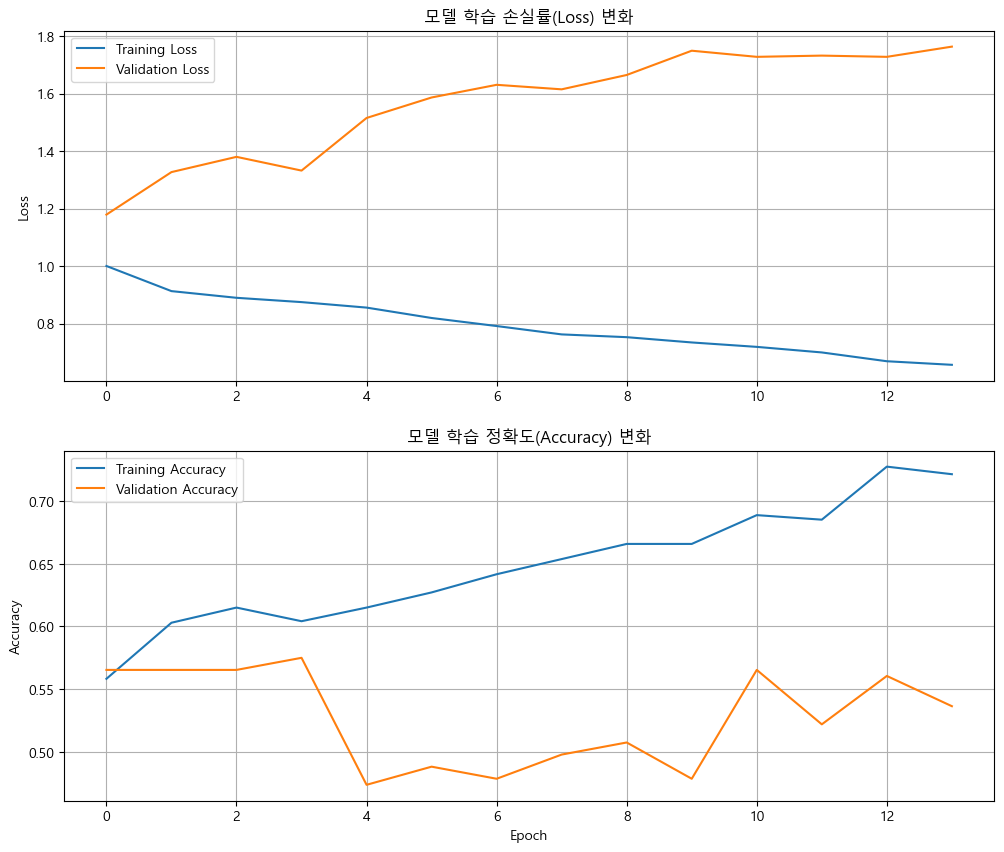

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
--------------------------------------------------
가장 최근 데이터 (2024-07-26) 기준
▶ 1주일 후 예측 방향: 횡보 또는 보합 예상
   (상승 확률: 1.25%, 하락 확률: 32.96%, 횡보 확률: 65.78%)
--------------------------------------------------

LSTM 분류 모델 기반 백테스팅을 시작합니다...
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
백테스팅 기간: 2023-10-04 ~ 2024-07-26
총 거래 횟수: 1
승률: 100.00%
최종 누적 수익률: 4.18%


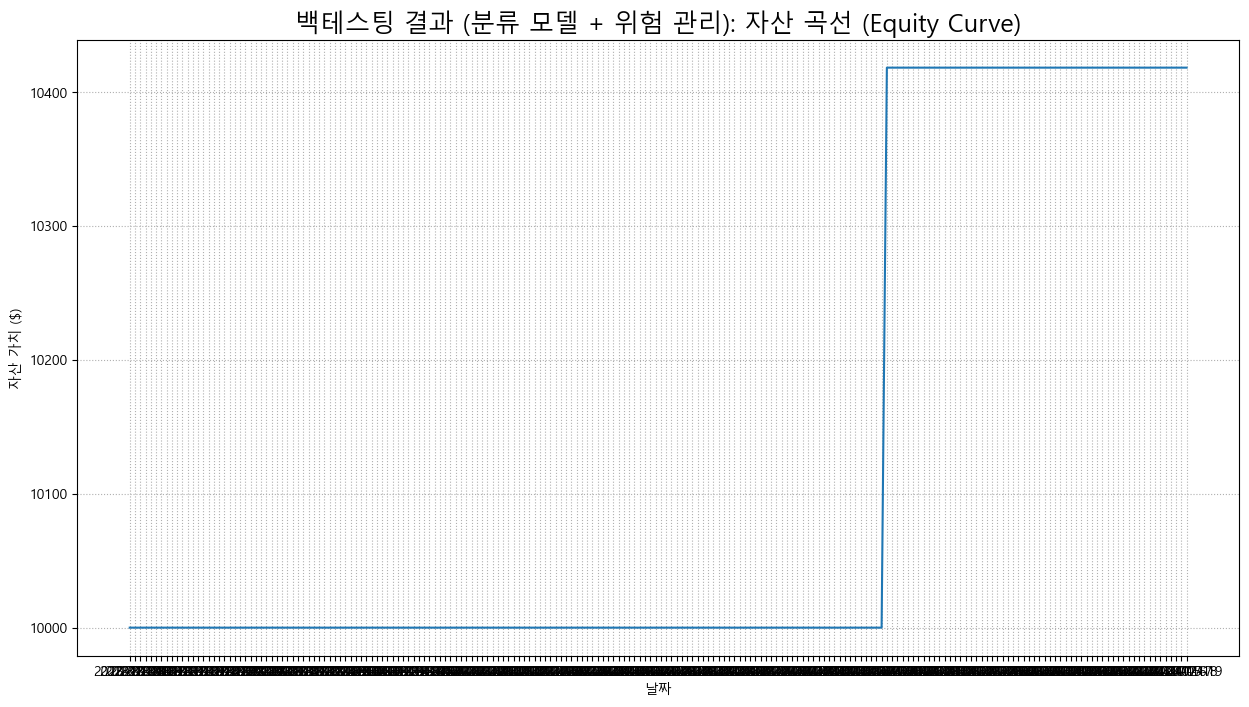

In [7]:
# ==========================================================================
# 최종 실행 코드 (분류 모델)
# ==========================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical # 분류 모델을 위해 추가
import time
import os

# --------------------------------------------------------------------------
# 1. 한글 폰트 설정
# --------------------------------------------------------------------------
try:
    plt.rc('font', family='Malgun Gothic') 
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"한글 폰트 설정에 실패했습니다. 설치된 폰트 이름을 확인해주세요. 오류: {e}")
    print("기본 폰트로 차트를 생성합니다.")

# --------------------------------------------------------------------------
# 2. 데이터 다운로드 및 분석 설정
# --------------------------------------------------------------------------
ticker_symbol = 'GC=F'  # 금 선물
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')
data_filename = 'gold_data.csv' 
model_filename = 'gold_predictor_model_v3_classification.keras' # 분류 모델을 위한 새 파일 이름

# --------------------------------------------------------------------------
# 3. 데이터 가져오기 및 특성 공학 (Feature Engineering)
# --------------------------------------------------------------------------
try:
    force_refresh = False 

    if force_refresh or not os.path.exists(data_filename):
        print("Yahoo Finance에 데이터를 요청합니다... (최초 1회 또는 강제 새로고침 시)")
        try:
            time.sleep(2)
            ticker = yf.Ticker(ticker_symbol)
            data = ticker.history(start=start_date, end=end_date, auto_adjust=False)
            if data.empty: raise Exception("다운로드된 데이터가 비어있습니다.")
            data.to_csv(data_filename)
            print(f"데이터를 다운로드하여 '{data_filename}' 파일로 저장했습니다.")
        except Exception as e:
            print(f"데이터 다운로드 중 오류 발생: {e}")
            if not os.path.exists(data_filename):
                 raise FileNotFoundError(f"'{data_filename}' 파일을 찾을 수 없습니다.")
            
    print(f"'{data_filename}' 파일에서 데이터를 불러옵니다.")
    try:
        data = pd.read_csv(data_filename, index_col=0, parse_dates=True, encoding='utf-8-sig')
        data.index.name = 'Date'
        print("데이터를 성공적으로 불러왔습니다.")
    except Exception as e:
        print("-" * 50)
        print(f"'{data_filename}' 파일을 읽는 중 오류가 발생했습니다: {e}")
        raise

    if not data.empty:
        # --- 기술적 지표 계산 ---
        data['Return'] = data['Close'].pct_change()
        data['Volatility'] = data['Return'].rolling(window=20).std()
        data['Short_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=20).mean()
        data['Long_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=60).mean()
        delta = data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        data['RSI'] = 100 - (100 / (1 + rs))
        
        # [개선] 예측 목표를 '방향성' (상승/횡보/하락)으로 변경
        future_return = data['Close'].pct_change(5).shift(-5)
        
        def categorize_return(ret):
            if ret > 0.015: # 1주일 후 1.5% 이상 상승하면 '상승' (Class 2)
                return 2
            elif ret < -0.015: # 1주일 후 1.5% 이상 하락하면 '하락' (Class 1)
                return 1
            else: # 그 외는 '횡보' (Class 0)
                return 0
        
        data['Target'] = future_return.apply(categorize_return)
        
        features = ['Close', 'Volume', 'Return', 'Volatility', 'Short_MA_Ratio', 'Long_MA_Ratio', 'RSI']
        data.dropna(inplace=True)
        
        # ------------------------------------------------------------------
        # 4. LSTM을 위한 데이터 전처리
        # ------------------------------------------------------------------
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(data[features])
        sequence_length = 60
        X, y = [], []
        for i in range(len(scaled_features) - sequence_length):
            X.append(scaled_features[i:i+sequence_length])
            y.append(data['Target'].iloc[i + sequence_length -1])
        X, y = np.array(X), np.array(y)
        
        # [개선] Target을 One-Hot 인코딩으로 변환 (e.g., 2 -> [0, 0, 1])
        y_categorical = to_categorical(y, num_classes=3)

        X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, shuffle=False)
        test_data_df = data.iloc[-len(y_test):]
        print("LSTM 분류 모델을 위한 데이터 준비 완료.")
        
        # ------------------------------------------------------------------
        # 5. [개선] LSTM 분류 모델 학습 또는 불러오기
        # ------------------------------------------------------------------
        if os.path.exists(model_filename):
            print(f"\n저장된 모델 '{model_filename}'을 불러옵니다.")
            model = load_model(model_filename)
        else:
            print(f"\n저장된 모델이 없습니다. 새로운 모델 학습을 시작합니다...")
            model = Sequential([
                LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
                Dropout(0.2),
                LSTM(units=100, return_sequences=False),
                Dropout(0.2),
                Dense(units=50, activation='relu'),
                Dense(3, activation='softmax') # [개선] 3개의 방향(상승/횡보/하락)을 예측하도록 변경
            ])
            # [개선] 분류 문제에 맞는 손실 함수와 평가 지표로 변경
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            
            early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
            reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
            
            history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), 
                                verbose=1, callbacks=[early_stopping, reduce_lr])
            
            model.save(model_filename)
            print(f"학습된 모델을 '{model_filename}' 파일로 저장했습니다.")

            # 학습 과정 시각화 (손실률과 정확도)
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
            ax1.plot(history.history['loss'], label='Training Loss')
            ax1.plot(history.history['val_loss'], label='Validation Loss')
            ax1.set_title('모델 학습 손실률(Loss) 변화')
            ax1.set_ylabel('Loss')
            ax1.legend()
            ax1.grid(True)
            
            ax2.plot(history.history['accuracy'], label='Training Accuracy')
            ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
            ax2.set_title('모델 학습 정확도(Accuracy) 변화')
            ax2.set_xlabel('Epoch')
            ax2.set_ylabel('Accuracy')
            ax2.legend()
            ax2.grid(True)
            plt.show()

        # ------------------------------------------------------------------
        # 6. 미래 가격 예측 (LSTM 모델 사용)
        # ------------------------------------------------------------------
        last_sequence = X[-1].reshape(1, sequence_length, X.shape[2])
        prediction_probs = model.predict(last_sequence)[0]
        predicted_class = np.argmax(prediction_probs)

        class_map = {2: "상승 가능성 (매수 고려)", 1: "하락 가능성 (매도 고려)", 0: "횡보 또는 보합 예상"}
        signal_text = class_map[predicted_class]

        print("-" * 50)
        latest_date = pd.to_datetime(data.index[-1])
        print(f"가장 최근 데이터 ({latest_date.strftime('%Y-%m-%d')}) 기준")
        print(f"▶ 1주일 후 예측 방향: {signal_text}")
        print(f"   (상승 확률: {prediction_probs[2]:.2%}, 하락 확률: {prediction_probs[1]:.2%}, 횡보 확률: {prediction_probs[0]:.2%})")
        print("-" * 50)

        # ------------------------------------------------------------------
        # 7. 백테스팅 (LSTM 예측 결과 기반)
        # ------------------------------------------------------------------
        print("\nLSTM 분류 모델 기반 백테스팅을 시작합니다...")
        predictions_categorical = model.predict(X_test)
        predicted_classes = np.argmax(predictions_categorical, axis=1)
        
        initial_capital = 10000.0
        stop_loss_pct = 0.02
        take_profit_pct = 0.04
        
        capital = initial_capital
        position = 0
        entry_price = 0
        equity_curve = []
        trades = []

        for i in range(len(test_data_df) - 5): # 마지막 5일은 실제 수익률을 알 수 없으므로 제외
            current_price = test_data_df['Close'].iloc[i]
            if position != 0:
                if (position == 1 and current_price < entry_price * (1 - stop_loss_pct)) or \
                   (position == -1 and current_price > entry_price * (1 + stop_loss_pct)) or \
                   (position == 1 and current_price > entry_price * (1 + take_profit_pct)) or \
                   (position == -1 and current_price < entry_price * (1 - take_profit_pct)):
                    trade_return = (current_price / entry_price - 1) * position
                    capital *= (1 + trade_return)
                    trades.append(trade_return)
                    position = 0
            
            if position == 0:
                predicted_signal = predicted_classes[i]
                if predicted_signal == 2: # 상승 예측
                    position = 1
                    entry_price = current_price
                elif predicted_signal == 1: # 하락 예측
                    position = -1
                    entry_price = current_price
            
            equity_curve.append(capital)

        total_trades = len(trades)
        winning_trades = sum(1 for r in trades if r > 0)
        win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
        final_return = (capital / initial_capital - 1) * 100
        
        start_test_date = pd.to_datetime(test_data_df.index[0])
        end_test_date = pd.to_datetime(test_data_df.index[-1])
        print(f"백테스팅 기간: {start_test_date.strftime('%Y-%m-%d')} ~ {end_test_date.strftime('%Y-%m-%d')}")
        print(f"총 거래 횟수: {total_trades}")
        print(f"승률: {win_rate:.2f}%")
        print(f"최종 누적 수익률: {final_return:.2f}%")
        
        plt.figure(figsize=(15, 8))
        plt.plot(test_data_df.index[:len(equity_curve)], equity_curve)
        plt.title('백테스팅 결과 (분류 모델 + 위험 관리): 자산 곡선 (Equity Curve)', fontsize=18)
        plt.xlabel('날짜')
        plt.ylabel('자산 가치 ($)')
        plt.grid(True, linestyle=':')
        plt.show()

except Exception as e:
    print(f"\n코드 실행 중 오류가 발생했습니다: {e}")


In [ ]:
# 마지막 단계임

'gold_data.csv' 파일에서 데이터를 불러옵니다.
데이터를 성공적으로 불러왔습니다.
LSTM 분류 모델을 위한 데이터 준비 완료.

저장된 모델 'gold_predictor_model_v4_final.keras'을 불러옵니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
--------------------------------------------------
가장 최근 데이터 (2024-07-26) 기준
▶ 1주일 후 예측 방향: 횡보 또는 보합 예상


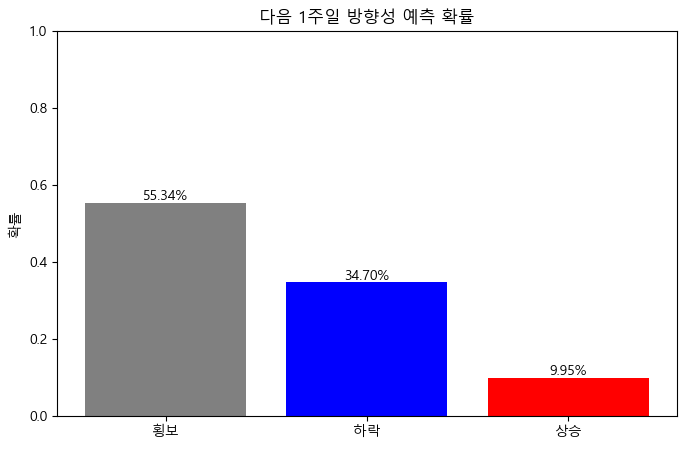

--------------------------------------------------

LSTM 분류 모델 기반 백테스팅을 시작합니다...
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
백테스팅 기간: 2023-10-04 ~ 2024-07-26
총 거래 횟수: 0
승률: 0.00%
최종 누적 수익률: 0.00%


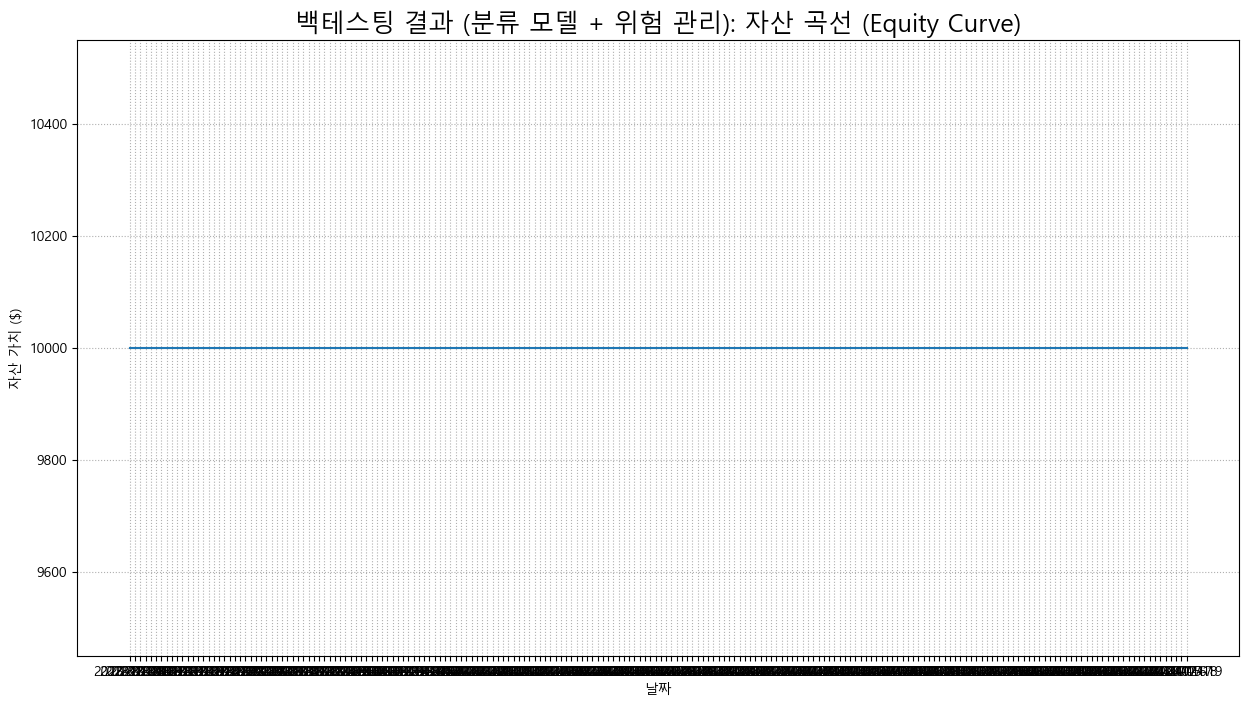

In [2]:
# ==========================================================================
# 최종 실행 코드 (분류 모델)
# ==========================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical # 분류 모델을 위해 추가
import time
import os

# --------------------------------------------------------------------------
# 1. 한글 폰트 설정
# --------------------------------------------------------------------------
try:
    plt.rc('font', family='Malgun Gothic') 
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"한글 폰트 설정에 실패했습니다. 설치된 폰트 이름을 확인해주세요. 오류: {e}")
    print("기본 폰트로 차트를 생성합니다.")

# --------------------------------------------------------------------------
# 2. 데이터 다운로드 및 분석 설정
# --------------------------------------------------------------------------
ticker_symbol = 'GC=F'  # 금 선물
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')
data_filename = 'gold_data.csv' 
model_filename = 'gold_predictor_model_v4_final.keras' # 최종 모델을 위한 새 파일 이름

# --------------------------------------------------------------------------
# 3. 데이터 가져오기 및 특성 공학 (Feature Engineering)
# --------------------------------------------------------------------------
try:
    force_refresh = False 

    if force_refresh or not os.path.exists(data_filename):
        print("Yahoo Finance에 데이터를 요청합니다... (최초 1회 또는 강제 새로고침 시)")
        try:
            time.sleep(2)
            ticker = yf.Ticker(ticker_symbol)
            data = ticker.history(start=start_date, end=end_date, auto_adjust=False)
            if data.empty: raise Exception("다운로드된 데이터가 비어있습니다.")
            data.to_csv(data_filename)
            print(f"데이터를 다운로드하여 '{data_filename}' 파일로 저장했습니다.")
        except Exception as e:
            print(f"데이터 다운로드 중 오류 발생: {e}")
            if not os.path.exists(data_filename):
                 raise FileNotFoundError(f"'{data_filename}' 파일을 찾을 수 없습니다.")
            
    print(f"'{data_filename}' 파일에서 데이터를 불러옵니다.")
    try:
        data = pd.read_csv(data_filename, index_col=0, parse_dates=True, encoding='utf-8-sig')
        data.index.name = 'Date'
        print("데이터를 성공적으로 불러왔습니다.")
    except Exception as e:
        print("-" * 50)
        print(f"'{data_filename}' 파일을 읽는 중 오류가 발생했습니다: {e}")
        raise

    if not data.empty:
        # --- 기술적 지표 계산 ---
        data['Return'] = data['Close'].pct_change()
        data['Volatility'] = data['Return'].rolling(window=20).std()
        data['Short_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=20).mean()
        data['Long_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=60).mean()
        delta = data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        data['RSI'] = 100 - (100 / (1 + rs))
        
        future_return = data['Close'].pct_change(5).shift(-5)
        
        def categorize_return(ret):
            if ret > 0.015: return 2 # 상승
            elif ret < -0.015: return 1 # 하락
            else: return 0 # 횡보
        
        data['Target'] = future_return.apply(categorize_return)
        
        features = ['Close', 'Volume', 'Return', 'Volatility', 'Short_MA_Ratio', 'Long_MA_Ratio', 'RSI']
        data.dropna(inplace=True)
        
        # ------------------------------------------------------------------
        # 4. LSTM을 위한 데이터 전처리
        # ------------------------------------------------------------------
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(data[features])
        sequence_length = 60
        X, y = [], []
        for i in range(len(scaled_features) - sequence_length):
            X.append(scaled_features[i:i+sequence_length])
            y.append(data['Target'].iloc[i + sequence_length -1])
        X, y = np.array(X), np.array(y)
        
        y_categorical = to_categorical(y, num_classes=3)

        X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, shuffle=False)
        test_data_df = data.iloc[-len(y_test):]
        print("LSTM 분류 모델을 위한 데이터 준비 완료.")
        
        # ------------------------------------------------------------------
        # 5. [개선] LSTM 분류 모델 학습 또는 불러오기
        # ------------------------------------------------------------------
        if os.path.exists(model_filename):
            print(f"\n저장된 모델 '{model_filename}'을 불러옵니다.")
            model = load_model(model_filename)
        else:
            print(f"\n저장된 모델이 없습니다. 새로운 모델 학습을 시작합니다...")
            # [개선] 과적합 방지를 위해 모델 구조 및 Dropout 비율 조정
            model = Sequential([
                LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
                Dropout(0.3),
                LSTM(units=32, return_sequences=False),
                Dropout(0.3),
                Dense(units=16, activation='relu'),
                Dense(3, activation='softmax')
            ])
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            
            early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
            reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)
            
            history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), 
                                verbose=1, callbacks=[early_stopping, reduce_lr])
            
            model.save(model_filename)
            print(f"학습된 모델을 '{model_filename}' 파일로 저장했습니다.")

            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
            ax1.plot(history.history['loss'], label='Training Loss')
            ax1.plot(history.history['val_loss'], label='Validation Loss')
            ax1.set_title('모델 학습 손실률(Loss) 변화')
            ax1.set_ylabel('Loss')
            ax1.legend()
            ax1.grid(True)
            
            ax2.plot(history.history['accuracy'], label='Training Accuracy')
            ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
            ax2.set_title('모델 학습 정확도(Accuracy) 변화')
            ax2.set_xlabel('Epoch')
            ax2.set_ylabel('Accuracy')
            ax2.legend()
            ax2.grid(True)
            plt.show()

        # ------------------------------------------------------------------
        # 6. 미래 가격 예측 (LSTM 모델 사용)
        # ------------------------------------------------------------------
        last_sequence = X[-1].reshape(1, sequence_length, X.shape[2])
        prediction_probs = model.predict(last_sequence)[0]
        predicted_class = np.argmax(prediction_probs)

        class_map = {2: "상승 가능성", 1: "하락 가능성", 0: "횡보 또는 보합 예상"}
        signal_text = class_map[predicted_class]

        print("-" * 50)
        latest_date = pd.to_datetime(data.index[-1])
        print(f"가장 최근 데이터 ({latest_date.strftime('%Y-%m-%d')}) 기준")
        print(f"▶ 1주일 후 예측 방향: {signal_text}")
        
        # [신규] 예측 확률을 막대그래프로 시각화
        labels = ['횡보', '하락', '상승']
        probs = [prediction_probs[0], prediction_probs[1], prediction_probs[2]]
        
        fig, ax = plt.subplots(figsize=(8, 5))
        bars = ax.bar(labels, probs, color=['gray', 'blue', 'red'])
        ax.set_ylabel('확률')
        ax.set_title('다음 1주일 방향성 예측 확률')
        ax.set_ylim(0, 1)
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2%}', va='bottom', ha='center')
        plt.show()
        print("-" * 50)

        # ------------------------------------------------------------------
        # 7. 백테스팅 (LSTM 예측 결과 기반)
        # ------------------------------------------------------------------
        print("\nLSTM 분류 모델 기반 백테스팅을 시작합니다...")
        predictions_categorical = model.predict(X_test)
        
        # [신규] 거래 민감도 조절 변수
        # 모델이 60% 이상 확신할 때만 거래에 진입
        entry_confidence = 0.6 
        
        initial_capital = 10000.0
        stop_loss_pct = 0.02
        take_profit_pct = 0.04
        
        capital = initial_capital
        position = 0
        entry_price = 0
        equity_curve = []
        trades = []

        for i in range(len(test_data_df) - 5):
            current_price = test_data_df['Close'].iloc[i]
            if position != 0:
                if (position == 1 and current_price < entry_price * (1 - stop_loss_pct)) or \
                   (position == -1 and current_price > entry_price * (1 + stop_loss_pct)) or \
                   (position == 1 and current_price > entry_price * (1 + take_profit_pct)) or \
                   (position == -1 and current_price < entry_price * (1 - take_profit_pct)):
                    trade_return = (current_price / entry_price - 1) * position
                    capital *= (1 + trade_return)
                    trades.append(trade_return)
                    position = 0
            
            if position == 0:
                prediction_probs = predictions_categorical[i]
                predicted_signal = np.argmax(prediction_probs)
                
                if predicted_signal == 2 and prediction_probs[2] > entry_confidence: # 상승 예측
                    position = 1
                    entry_price = current_price
                elif predicted_signal == 1 and prediction_probs[1] > entry_confidence: # 하락 예측
                    position = -1
                    entry_price = current_price
            
            equity_curve.append(capital)

        total_trades = len(trades)
        winning_trades = sum(1 for r in trades if r > 0)
        win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
        final_return = (capital / initial_capital - 1) * 100
        
        start_test_date = pd.to_datetime(test_data_df.index[0])
        end_test_date = pd.to_datetime(test_data_df.index[-1])
        print(f"백테스팅 기간: {start_test_date.strftime('%Y-%m-%d')} ~ {end_test_date.strftime('%Y-%m-%d')}")
        print(f"총 거래 횟수: {total_trades}")
        print(f"승률: {win_rate:.2f}%")
        print(f"최종 누적 수익률: {final_return:.2f}%")
        
        plt.figure(figsize=(15, 8))
        plt.plot(test_data_df.index[:len(equity_curve)], equity_curve)
        plt.title('백테스팅 결과 (분류 모델 + 위험 관리): 자산 곡선 (Equity Curve)', fontsize=18)
        plt.xlabel('날짜')
        plt.ylabel('자산 가치 ($)')
        plt.grid(True, linestyle=':')
        plt.show()

except Exception as e:
    print(f"\n코드 실행 중 오류가 발생했습니다: {e}")


In [ ]:
# 더 적극적으로 거래에 참여하도록 '민감도'를 조절

'gold_data.csv' 파일에서 데이터를 불러옵니다.
데이터를 성공적으로 불러왔습니다.
LSTM 분류 모델을 위한 데이터 준비 완료.

저장된 모델이 없습니다. 새로운 모델 학습을 시작합니다...


C:\Users\onesa\anaconda3\envs\stock_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 250ms/step - accuracy: 0.4486 - loss: 1.0634 - val_accuracy: 0.5169 - val_loss: 1.0493 - learning_rate: 0.0010
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.6022 - loss: 0.9779 - val_accuracy: 0.5169 - val_loss: 1.1053 - learning_rate: 0.0010
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.5748 - loss: 0.9505 - val_accuracy: 0.4879 - val_loss: 1.2550 - learning_rate: 0.0010
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.6246 - loss: 0.8898 - val_accuracy: 0.3478 - val_loss: 1.4445 - learning_rate: 0.0010
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.6039 - loss: 0.9050 - val_accuracy: 0.4106 - val_loss: 1.4386 - learning_rate: 0.0010
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.6195 - loss: 0.8676 - val_accuracy: 0.4300 - val_loss: 1.4640 - learning_rate: 0.0010
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.6339 - loss: 0

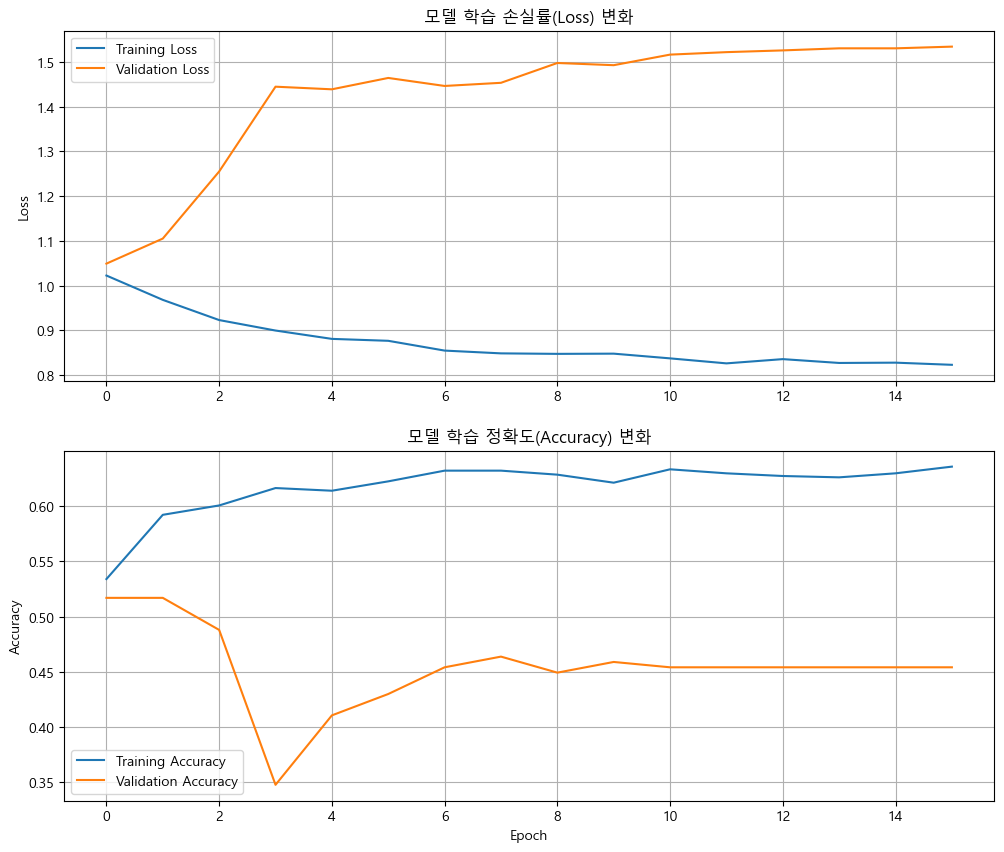

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
--------------------------------------------------
가장 최근 데이터 (2024-07-26) 기준
▶ 1주일 후 예측 방향: 횡보 또는 보합 예상


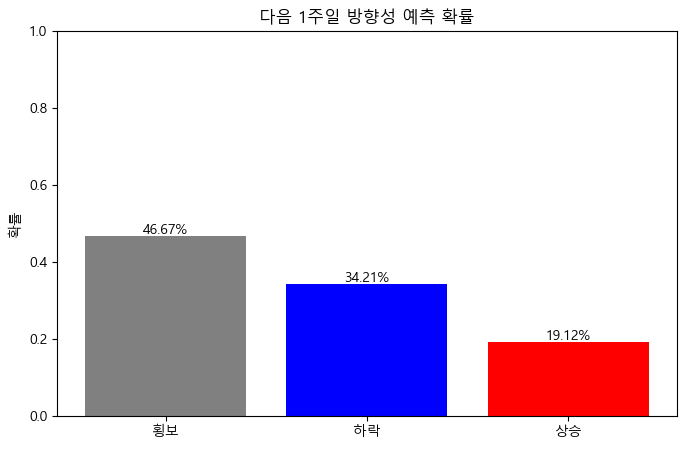

--------------------------------------------------

LSTM 분류 모델 기반 백테스팅을 시작합니다...
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
백테스팅 기간: 2023-10-04 ~ 2024-07-26
총 거래 횟수: 0
승률: 0.00%
최종 누적 수익률: 0.00%


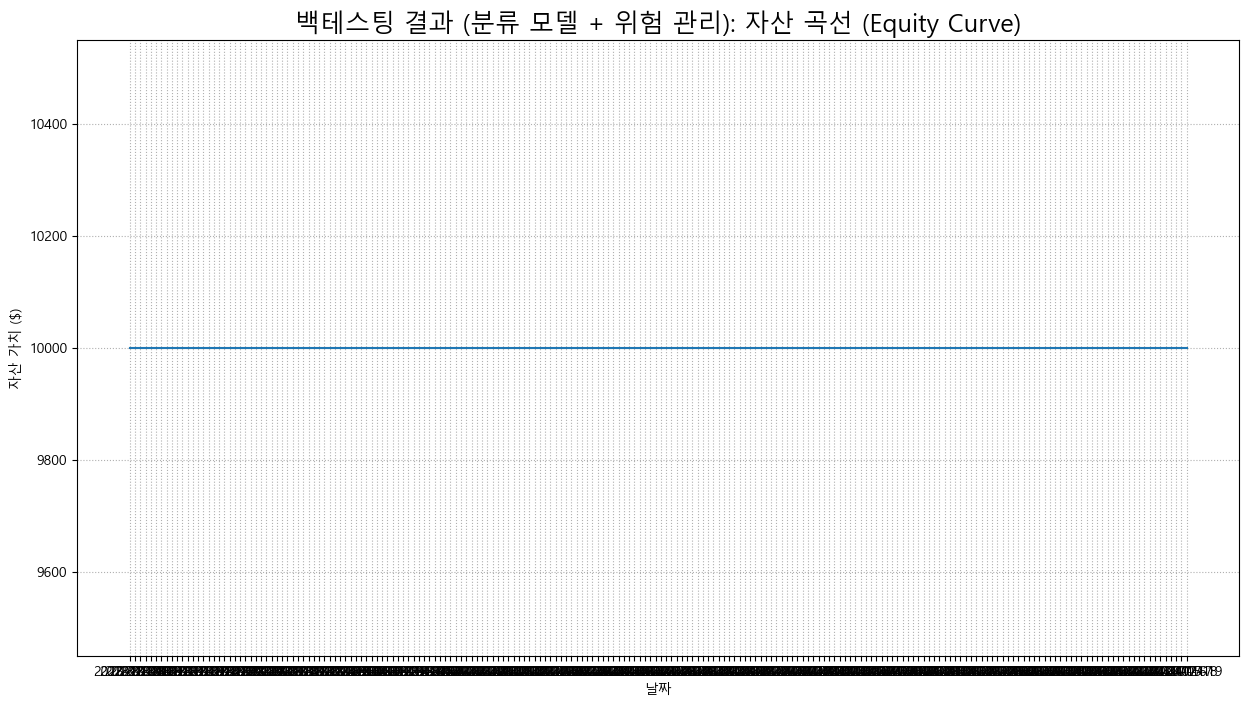

In [2]:
# ==========================================================================
# 최종 실행 코드 (분류 모델 + 고급 특성)
# ==========================================================================

import yfinance as yf
import pandas as pd
import pandas_ta as ta # 기술적 분석을 위한 라이브러리 추가
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import time
import os

# --------------------------------------------------------------------------
# 1. 한글 폰트 설정
# --------------------------------------------------------------------------
try:
    plt.rc('font', family='Malgun Gothic') 
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"한글 폰트 설정에 실패했습니다. 설치된 폰트 이름을 확인해주세요. 오류: {e}")
    print("기본 폰트로 차트를 생성합니다.")

# --------------------------------------------------------------------------
# 2. 데이터 다운로드 및 분석 설정
# --------------------------------------------------------------------------
ticker_symbol = 'GC=F'  # 금 선물
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')
data_filename = 'gold_data.csv' 
model_filename = 'gold_predictor_model_v5_final.keras' # 최종 모델을 위한 새 파일 이름

# --------------------------------------------------------------------------
# 3. 데이터 가져오기 및 특성 공학 (Feature Engineering)
# --------------------------------------------------------------------------
try:
    force_refresh = False 

    if force_refresh or not os.path.exists(data_filename):
        print("Yahoo Finance에 데이터를 요청합니다... (최초 1회 또는 강제 새로고침 시)")
        try:
            time.sleep(2)
            ticker = yf.Ticker(ticker_symbol)
            data = ticker.history(start=start_date, end=end_date, auto_adjust=False)
            if data.empty: raise Exception("다운로드된 데이터가 비어있습니다.")
            data.to_csv(data_filename)
            print(f"데이터를 다운로드하여 '{data_filename}' 파일로 저장했습니다.")
        except Exception as e:
            print(f"데이터 다운로드 중 오류 발생: {e}")
            if not os.path.exists(data_filename):
                 raise FileNotFoundError(f"'{data_filename}' 파일을 찾을 수 없습니다.")
            
    print(f"'{data_filename}' 파일에서 데이터를 불러옵니다.")
    try:
        data = pd.read_csv(data_filename, index_col=0, parse_dates=True, encoding='utf-8-sig')
        data.index.name = 'Date'
        print("데이터를 성공적으로 불러왔습니다.")
    except Exception as e:
        print("-" * 50)
        print(f"'{data_filename}' 파일을 읽는 중 오류가 발생했습니다: {e}")
        raise

    if not data.empty:
        # --- 기술적 지표 계산 ---
        data['Return'] = data['Close'].pct_change()
        data['Volatility'] = data['Return'].rolling(window=20).std()
        data['Short_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=20).mean()
        data['Long_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=60).mean()
        
        data.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
        data.ta.atr(high='High', low='Low', close='Close', length=14, append=True)
        
        future_return = data['Close'].pct_change(5).shift(-5)
        
        def categorize_return(ret):
            if ret > 0.015: return 2 # 상승
            elif ret < -0.015: return 1 # 하락
            else: return 0 # 횡보
        
        data['Target'] = future_return.apply(categorize_return)
        
        features = ['Close', 'Volume', 'Return', 'Volatility', 'Short_MA_Ratio', 'Long_MA_Ratio', 
                    'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ATRr_14']
        data.dropna(inplace=True)
        
        # ------------------------------------------------------------------
        # 4. LSTM을 위한 데이터 전처리
        # ------------------------------------------------------------------
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(data[features])
        sequence_length = 60
        X, y = [], []
        for i in range(len(scaled_features) - sequence_length):
            X.append(scaled_features[i:i+sequence_length])
            y.append(data['Target'].iloc[i + sequence_length -1])
        X, y = np.array(X), np.array(y)
        
        y_categorical = to_categorical(y, num_classes=3)

        X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, shuffle=False)
        test_data_df = data.iloc[-len(y_test):]
        print("LSTM 분류 모델을 위한 데이터 준비 완료.")
        
        # ------------------------------------------------------------------
        # 5. LSTM 분류 모델 학습 또는 불러오기
        # ------------------------------------------------------------------
        if os.path.exists(model_filename):
            print(f"\n저장된 모델 '{model_filename}'을 불러옵니다.")
            model = load_model(model_filename)
        else:
            print(f"\n저장된 모델이 없습니다. 새로운 모델 학습을 시작합니다...")
            model = Sequential([
                LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
                Dropout(0.3),
                LSTM(units=32, return_sequences=False),
                Dropout(0.3),
                Dense(units=16, activation='relu'),
                Dense(3, activation='softmax')
            ])
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            
            early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
            reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)
            
            history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), 
                                verbose=1, callbacks=[early_stopping, reduce_lr])
            
            model.save(model_filename)
            print(f"학습된 모델을 '{model_filename}' 파일로 저장했습니다.")

            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
            ax1.plot(history.history['loss'], label='Training Loss')
            ax1.plot(history.history['val_loss'], label='Validation Loss')
            ax1.set_title('모델 학습 손실률(Loss) 변화')
            ax1.set_ylabel('Loss')
            ax1.legend()
            ax1.grid(True)
            
            ax2.plot(history.history['accuracy'], label='Training Accuracy')
            ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
            ax2.set_title('모델 학습 정확도(Accuracy) 변화')
            ax2.set_xlabel('Epoch')
            ax2.set_ylabel('Accuracy')
            ax2.legend()
            ax2.grid(True)
            plt.show()

        # ------------------------------------------------------------------
        # 6. 미래 가격 예측 (LSTM 모델 사용)
        # ------------------------------------------------------------------
        last_sequence = X[-1].reshape(1, sequence_length, X.shape[2])
        prediction_probs = model.predict(last_sequence)[0]
        predicted_class = np.argmax(prediction_probs)

        class_map = {2: "상승 가능성", 1: "하락 가능성", 0: "횡보 또는 보합 예상"}
        signal_text = class_map[predicted_class]

        print("-" * 50)
        latest_date = pd.to_datetime(data.index[-1])
        print(f"가장 최근 데이터 ({latest_date.strftime('%Y-%m-%d')}) 기준")
        print(f"▶ 1주일 후 예측 방향: {signal_text}")
        
        labels = ['횡보', '하락', '상승']
        probs = [prediction_probs[0], prediction_probs[1], prediction_probs[2]]
        
        fig, ax = plt.subplots(figsize=(8, 5))
        bars = ax.bar(labels, probs, color=['gray', 'blue', 'red'])
        ax.set_ylabel('확률')
        ax.set_title('다음 1주일 방향성 예측 확률')
        ax.set_ylim(0, 1)
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2%}', va='bottom', ha='center')
        plt.show()
        print("-" * 50)

        # ------------------------------------------------------------------
        # 7. 백테스팅 (LSTM 예측 결과 기반)
        # ------------------------------------------------------------------
        print("\nLSTM 분류 모델 기반 백테스팅을 시작합니다...")
        predictions_categorical = model.predict(X_test)
        
        # [수정] 거래 민감도 조절 (기준을 45%로 낮춤)
        entry_confidence = 0.45
        
        initial_capital = 10000.0
        stop_loss_multiplier = 2.0
        take_profit_multiplier = 4.0
        
        capital = initial_capital
        position = 0
        entry_price = 0
        stop_loss_price = 0
        take_profit_price = 0
        equity_curve = []
        trades = []

        for i in range(len(test_data_df) - 5):
            current_price = test_data_df['Close'].iloc[i]
            current_atr = test_data_df['ATRr_14'].iloc[i]
            
            if position != 0:
                if (position == 1 and current_price < stop_loss_price) or \
                   (position == -1 and current_price > stop_loss_price) or \
                   (position == 1 and current_price > take_profit_price) or \
                   (position == -1 and current_price < take_profit_price):
                    trade_return = (current_price / entry_price - 1) * position
                    capital *= (1 + trade_return)
                    trades.append(trade_return)
                    position = 0
            
            if position == 0:
                prediction_probs = predictions_categorical[i]
                predicted_signal = np.argmax(prediction_probs)
                
                if predicted_signal == 2 and prediction_probs[2] > entry_confidence: # 상승 예측
                    position = 1
                    entry_price = current_price
                    stop_loss_price = entry_price - (current_atr * stop_loss_multiplier)
                    take_profit_price = entry_price + (current_atr * take_profit_multiplier)
                elif predicted_signal == 1 and prediction_probs[1] > entry_confidence: # 하락 예측
                    position = -1
                    entry_price = current_price
                    stop_loss_price = entry_price + (current_atr * stop_loss_multiplier)
                    take_profit_price = entry_price - (current_atr * take_profit_multiplier)
            
            equity_curve.append(capital)

        total_trades = len(trades)
        winning_trades = sum(1 for r in trades if r > 0)
        win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
        final_return = (capital / initial_capital - 1) * 100
        
        start_test_date = pd.to_datetime(test_data_df.index[0])
        end_test_date = pd.to_datetime(test_data_df.index[-1])
        print(f"백테스팅 기간: {start_test_date.strftime('%Y-%m-%d')} ~ {end_test_date.strftime('%Y-%m-%d')}")
        print(f"총 거래 횟수: {total_trades}")
        print(f"승률: {win_rate:.2f}%")
        print(f"최종 누적 수익률: {final_return:.2f}%")
        
        plt.figure(figsize=(15, 8))
        plt.plot(test_data_df.index[:len(equity_curve)], equity_curve)
        plt.title('백테스팅 결과 (분류 모델 + 위험 관리): 자산 곡선 (Equity Curve)', fontsize=18)
        plt.xlabel('날짜')
        plt.ylabel('자산 가치 ($)')
        plt.grid(True, linestyle=':')
        plt.show()

except Exception as e:
    print(f"\n코드 실행 중 오류가 발생했습니다: {e}")


In [ ]:
 # Canvas의 코드를 수정하여 거래 진입 확신도(entry_confidence) 기준을 55%에서 45%로 낮추었습니다.

'gold_data.csv' 파일에서 데이터를 불러옵니다.
데이터를 성공적으로 불러왔습니다.
LSTM 분류 모델을 위한 데이터 준비 완료.

저장된 모델 'gold_predictor_model_v5_final.keras'을 불러옵니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
--------------------------------------------------
가장 최근 데이터 (2024-07-26) 기준
▶ 1주일 후 예측 방향: 횡보 또는 보합 예상


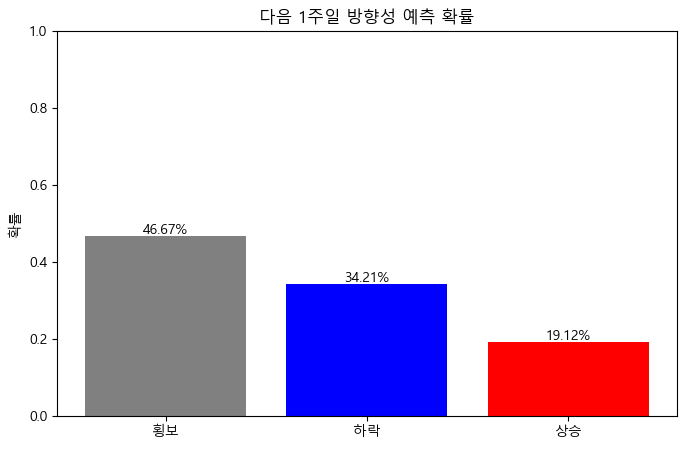

--------------------------------------------------

LSTM 분류 모델 기반 백테스팅을 시작합니다...
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step
백테스팅 기간: 2023-10-04 ~ 2024-07-26
총 거래 횟수: 0
승률: 0.00%
최종 누적 수익률: 0.00%


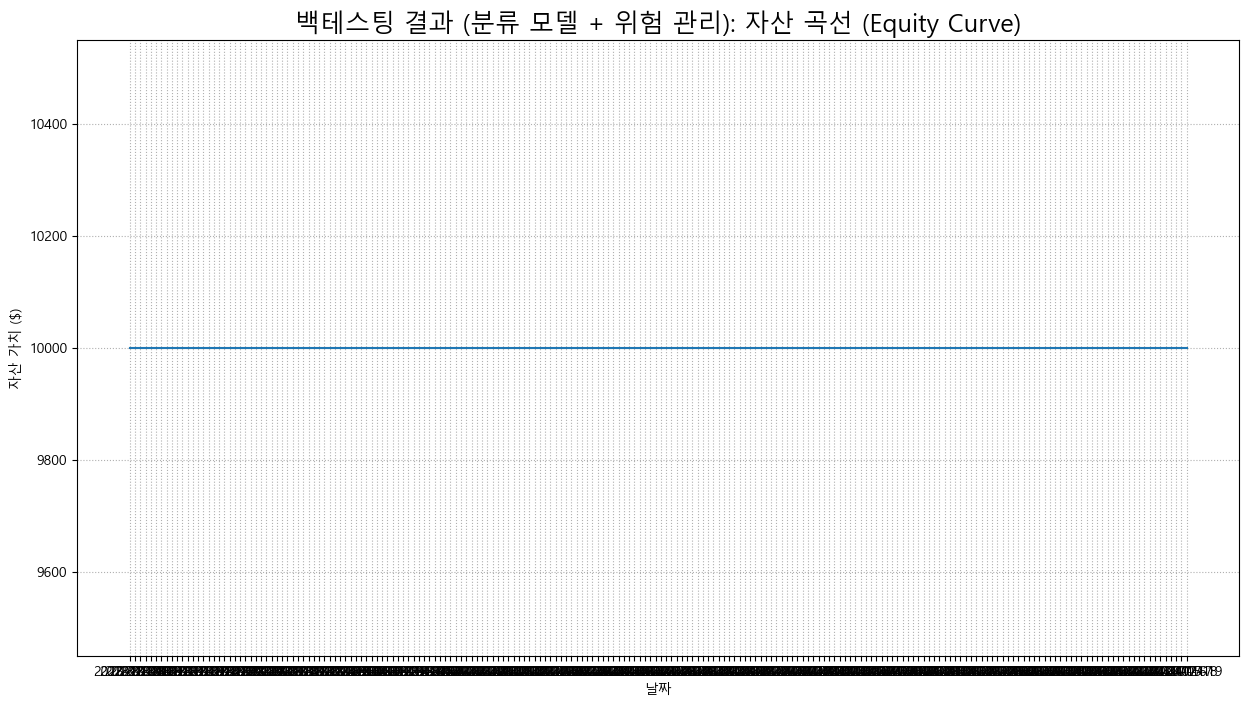

In [3]:
# ==========================================================================
# 최종 실행 코드 (분류 모델 + 고급 특성)
# ==========================================================================

import yfinance as yf
import pandas as pd
import pandas_ta as ta # 기술적 분석을 위한 라이브러리 추가
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import time
import os

# --------------------------------------------------------------------------
# 1. 한글 폰트 설정
# --------------------------------------------------------------------------
try:
    plt.rc('font', family='Malgun Gothic') 
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"한글 폰트 설정에 실패했습니다. 설치된 폰트 이름을 확인해주세요. 오류: {e}")
    print("기본 폰트로 차트를 생성합니다.")

# --------------------------------------------------------------------------
# 2. 데이터 다운로드 및 분석 설정
# --------------------------------------------------------------------------
ticker_symbol = 'GC=F'  # 금 선물
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')
data_filename = 'gold_data.csv' 
model_filename = 'gold_predictor_model_v5_final.keras' # 최종 모델을 위한 새 파일 이름

# --------------------------------------------------------------------------
# 3. 데이터 가져오기 및 특성 공학 (Feature Engineering)
# --------------------------------------------------------------------------
try:
    force_refresh = False 

    if force_refresh or not os.path.exists(data_filename):
        print("Yahoo Finance에 데이터를 요청합니다... (최초 1회 또는 강제 새로고침 시)")
        try:
            time.sleep(2)
            ticker = yf.Ticker(ticker_symbol)
            data = ticker.history(start=start_date, end=end_date, auto_adjust=False)
            if data.empty: raise Exception("다운로드된 데이터가 비어있습니다.")
            data.to_csv(data_filename)
            print(f"데이터를 다운로드하여 '{data_filename}' 파일로 저장했습니다.")
        except Exception as e:
            print(f"데이터 다운로드 중 오류 발생: {e}")
            if not os.path.exists(data_filename):
                 raise FileNotFoundError(f"'{data_filename}' 파일을 찾을 수 없습니다.")
            
    print(f"'{data_filename}' 파일에서 데이터를 불러옵니다.")
    try:
        data = pd.read_csv(data_filename, index_col=0, parse_dates=True, encoding='utf-8-sig')
        data.index.name = 'Date'
        print("데이터를 성공적으로 불러왔습니다.")
    except Exception as e:
        print("-" * 50)
        print(f"'{data_filename}' 파일을 읽는 중 오류가 발생했습니다: {e}")
        raise

    if not data.empty:
        # --- 기술적 지표 계산 ---
        data['Return'] = data['Close'].pct_change()
        data['Volatility'] = data['Return'].rolling(window=20).std()
        data['Short_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=20).mean()
        data['Long_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=60).mean()
        
        data.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
        data.ta.atr(high='High', low='Low', close='Close', length=14, append=True)
        
        future_return = data['Close'].pct_change(5).shift(-5)
        
        def categorize_return(ret):
            if ret > 0.015: return 2 # 상승
            elif ret < -0.015: return 1 # 하락
            else: return 0 # 횡보
        
        data['Target'] = future_return.apply(categorize_return)
        
        features = ['Close', 'Volume', 'Return', 'Volatility', 'Short_MA_Ratio', 'Long_MA_Ratio', 
                    'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ATRr_14']
        data.dropna(inplace=True)
        
        # ------------------------------------------------------------------
        # 4. LSTM을 위한 데이터 전처리
        # ------------------------------------------------------------------
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(data[features])
        sequence_length = 60
        X, y = [], []
        for i in range(len(scaled_features) - sequence_length):
            X.append(scaled_features[i:i+sequence_length])
            y.append(data['Target'].iloc[i + sequence_length -1])
        X, y = np.array(X), np.array(y)
        
        y_categorical = to_categorical(y, num_classes=3)

        X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, shuffle=False)
        test_data_df = data.iloc[-len(y_test):]
        print("LSTM 분류 모델을 위한 데이터 준비 완료.")
        
        # ------------------------------------------------------------------
        # 5. LSTM 분류 모델 학습 또는 불러오기
        # ------------------------------------------------------------------
        if os.path.exists(model_filename):
            print(f"\n저장된 모델 '{model_filename}'을 불러옵니다.")
            model = load_model(model_filename)
        else:
            print(f"\n저장된 모델이 없습니다. 새로운 모델 학습을 시작합니다...")
            model = Sequential([
                LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
                Dropout(0.3),
                LSTM(units=32, return_sequences=False),
                Dropout(0.3),
                Dense(units=16, activation='relu'),
                Dense(3, activation='softmax')
            ])
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            
            early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
            reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)
            
            history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), 
                                verbose=1, callbacks=[early_stopping, reduce_lr])
            
            model.save(model_filename)
            print(f"학습된 모델을 '{model_filename}' 파일로 저장했습니다.")

            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
            ax1.plot(history.history['loss'], label='Training Loss')
            ax1.plot(history.history['val_loss'], label='Validation Loss')
            ax1.set_title('모델 학습 손실률(Loss) 변화')
            ax1.set_ylabel('Loss')
            ax1.legend()
            ax1.grid(True)
            
            ax2.plot(history.history['accuracy'], label='Training Accuracy')
            ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
            ax2.set_title('모델 학습 정확도(Accuracy) 변화')
            ax2.set_xlabel('Epoch')
            ax2.set_ylabel('Accuracy')
            ax2.legend()
            ax2.grid(True)
            plt.show()

        # ------------------------------------------------------------------
        # 6. 미래 가격 예측 (LSTM 모델 사용)
        # ------------------------------------------------------------------
        last_sequence = X[-1].reshape(1, sequence_length, X.shape[2])
        prediction_probs = model.predict(last_sequence)[0]
        predicted_class = np.argmax(prediction_probs)

        class_map = {2: "상승 가능성", 1: "하락 가능성", 0: "횡보 또는 보합 예상"}
        signal_text = class_map[predicted_class]

        print("-" * 50)
        latest_date = pd.to_datetime(data.index[-1])
        print(f"가장 최근 데이터 ({latest_date.strftime('%Y-%m-%d')}) 기준")
        print(f"▶ 1주일 후 예측 방향: {signal_text}")
        
        labels = ['횡보', '하락', '상승']
        probs = [prediction_probs[0], prediction_probs[1], prediction_probs[2]]
        
        fig, ax = plt.subplots(figsize=(8, 5))
        bars = ax.bar(labels, probs, color=['gray', 'blue', 'red'])
        ax.set_ylabel('확률')
        ax.set_title('다음 1주일 방향성 예측 확률')
        ax.set_ylim(0, 1)
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2%}', va='bottom', ha='center')
        plt.show()
        print("-" * 50)

        # ------------------------------------------------------------------
        # 7. 백테스팅 (LSTM 예측 결과 기반)
        # ------------------------------------------------------------------
        print("\nLSTM 분류 모델 기반 백테스팅을 시작합니다...")
        predictions_categorical = model.predict(X_test)
        
        # [수정] 거래 민감도 조절 (기준을 45%로 낮춤)
        entry_confidence = 0.45
        
        initial_capital = 10000.0
        stop_loss_multiplier = 2.0
        take_profit_multiplier = 4.0
        
        capital = initial_capital
        position = 0
        entry_price = 0
        stop_loss_price = 0
        take_profit_price = 0
        equity_curve = []
        trades = []

        for i in range(len(test_data_df) - 5):
            current_price = test_data_df['Close'].iloc[i]
            current_atr = test_data_df['ATRr_14'].iloc[i]
            
            if position != 0:
                if (position == 1 and current_price < stop_loss_price) or \
                   (position == -1 and current_price > stop_loss_price) or \
                   (position == 1 and current_price > take_profit_price) or \
                   (position == -1 and current_price < take_profit_price):
                    trade_return = (current_price / entry_price - 1) * position
                    capital *= (1 + trade_return)
                    trades.append(trade_return)
                    position = 0
            
            if position == 0:
                prediction_probs = predictions_categorical[i]
                predicted_signal = np.argmax(prediction_probs)
                
                if predicted_signal == 2 and prediction_probs[2] > entry_confidence: # 상승 예측
                    position = 1
                    entry_price = current_price
                    stop_loss_price = entry_price - (current_atr * stop_loss_multiplier)
                    take_profit_price = entry_price + (current_atr * take_profit_multiplier)
                elif predicted_signal == 1 and prediction_probs[1] > entry_confidence: # 하락 예측
                    position = -1
                    entry_price = current_price
                    stop_loss_price = entry_price + (current_atr * stop_loss_multiplier)
                    take_profit_price = entry_price - (current_atr * take_profit_multiplier)
            
            equity_curve.append(capital)

        total_trades = len(trades)
        winning_trades = sum(1 for r in trades if r > 0)
        win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
        final_return = (capital / initial_capital - 1) * 100
        
        start_test_date = pd.to_datetime(test_data_df.index[0])
        end_test_date = pd.to_datetime(test_data_df.index[-1])
        print(f"백테스팅 기간: {start_test_date.strftime('%Y-%m-%d')} ~ {end_test_date.strftime('%Y-%m-%d')}")
        print(f"총 거래 횟수: {total_trades}")
        print(f"승률: {win_rate:.2f}%")
        print(f"최종 누적 수익률: {final_return:.2f}%")
        
        plt.figure(figsize=(15, 8))
        plt.plot(test_data_df.index[:len(equity_curve)], equity_curve)
        plt.title('백테스팅 결과 (분류 모델 + 위험 관리): 자산 곡선 (Equity Curve)', fontsize=18)
        plt.xlabel('날짜')
        plt.ylabel('자산 가치 ($)')
        plt.grid(True, linestyle=':')
        plt.show()

except Exception as e:
    print(f"\n코드 실행 중 오류가 발생했습니다: {e}")


In [ ]:
# 최종예측코드

'gold_data.csv' 파일에서 데이터를 불러옵니다.
데이터를 성공적으로 불러왔습니다.
LSTM 분류 모델을 위한 데이터 준비 완료.

저장된 모델 'gold_predictor_model_v5_final.keras'을 불러옵니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
--------------------------------------------------
가장 최근 데이터 (2024-07-26) 기준
▶ 1주일 후 예측 방향: 횡보 또는 보합 예상


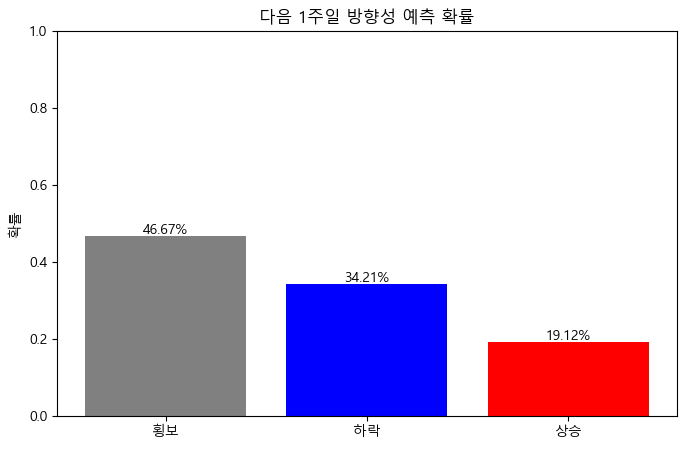

--------------------------------------------------

LSTM 분류 모델 기반 백테스팅을 시작합니다...
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step
백테스팅 기간: 2023-10-04 ~ 2024-07-26
총 거래 횟수: 0
승률: 0.00%
최종 누적 수익률: 0.00%


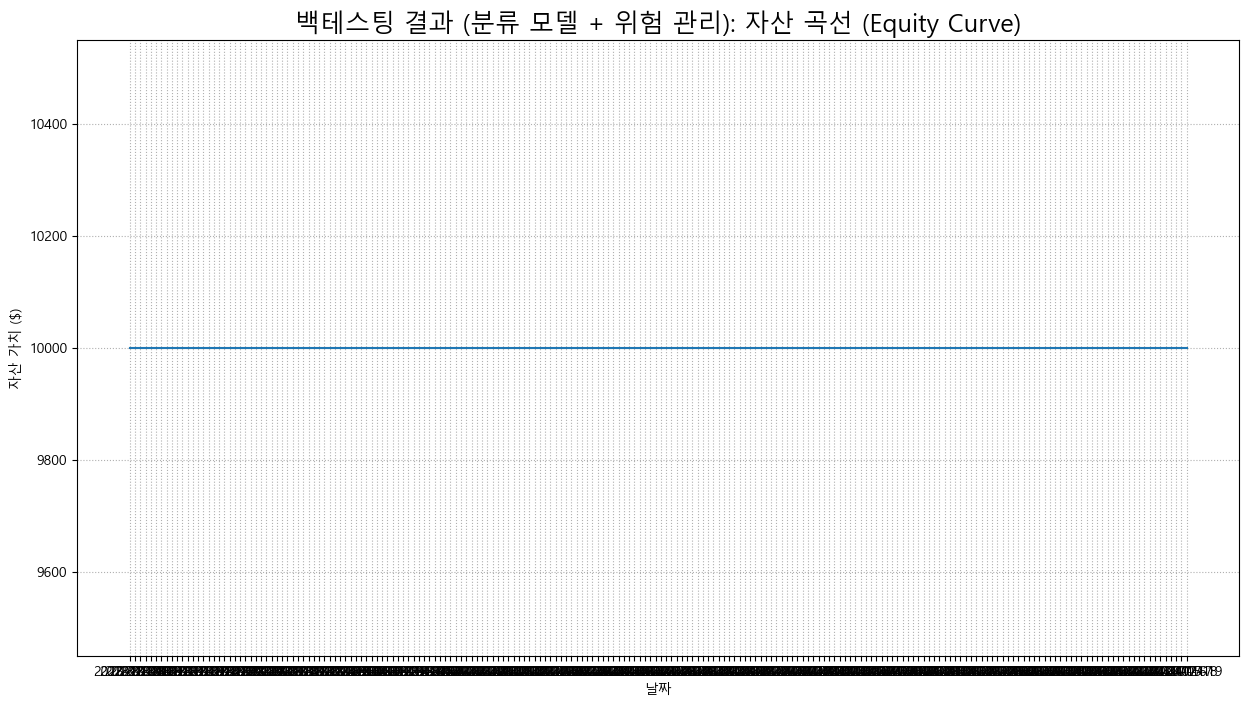

In [4]:
# ==========================================================================
# 최종 실행 코드 (분류 모델 + 고급 특성)
# ==========================================================================

import yfinance as yf
import pandas as pd
import pandas_ta as ta # 기술적 분석을 위한 라이브러리 추가
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import time
import os

# --------------------------------------------------------------------------
# 1. 한글 폰트 설정
# --------------------------------------------------------------------------
try:
    plt.rc('font', family='Malgun Gothic') 
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"한글 폰트 설정에 실패했습니다. 설치된 폰트 이름을 확인해주세요. 오류: {e}")
    print("기본 폰트로 차트를 생성합니다.")

# --------------------------------------------------------------------------
# 2. 데이터 다운로드 및 분석 설정
# --------------------------------------------------------------------------
ticker_symbol = 'GC=F'  # 금 선물
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')
data_filename = 'gold_data.csv' 
model_filename = 'gold_predictor_model_v5_final.keras' # 최종 모델을 위한 새 파일 이름

# --------------------------------------------------------------------------
# 3. 데이터 가져오기 및 특성 공학 (Feature Engineering)
# --------------------------------------------------------------------------
try:
    force_refresh = False 

    if force_refresh or not os.path.exists(data_filename):
        print("Yahoo Finance에 데이터를 요청합니다... (최초 1회 또는 강제 새로고침 시)")
        try:
            time.sleep(2)
            ticker = yf.Ticker(ticker_symbol)
            data = ticker.history(start=start_date, end=end_date, auto_adjust=False)
            if data.empty: raise Exception("다운로드된 데이터가 비어있습니다.")
            data.to_csv(data_filename)
            print(f"데이터를 다운로드하여 '{data_filename}' 파일로 저장했습니다.")
        except Exception as e:
            print(f"데이터 다운로드 중 오류 발생: {e}")
            if not os.path.exists(data_filename):
                 raise FileNotFoundError(f"'{data_filename}' 파일을 찾을 수 없습니다.")
            
    print(f"'{data_filename}' 파일에서 데이터를 불러옵니다.")
    try:
        data = pd.read_csv(data_filename, index_col=0, parse_dates=True, encoding='utf-8-sig')
        data.index.name = 'Date'
        print("데이터를 성공적으로 불러왔습니다.")
    except Exception as e:
        print("-" * 50)
        print(f"'{data_filename}' 파일을 읽는 중 오류가 발생했습니다: {e}")
        raise

    if not data.empty:
        # --- 기술적 지표 계산 ---
        data['Return'] = data['Close'].pct_change()
        data['Volatility'] = data['Return'].rolling(window=20).std()
        data['Short_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=20).mean()
        data['Long_MA_Ratio'] = data['Close'] / data['Close'].rolling(window=60).mean()
        
        data.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
        data.ta.atr(high='High', low='Low', close='Close', length=14, append=True)
        
        future_return = data['Close'].pct_change(5).shift(-5)
        
        def categorize_return(ret):
            if ret > 0.015: return 2 # 상승
            elif ret < -0.015: return 1 # 하락
            else: return 0 # 횡보
        
        data['Target'] = future_return.apply(categorize_return)
        
        features = ['Close', 'Volume', 'Return', 'Volatility', 'Short_MA_Ratio', 'Long_MA_Ratio', 
                    'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ATRr_14']
        data.dropna(inplace=True)
        
        # ------------------------------------------------------------------
        # 4. LSTM을 위한 데이터 전처리
        # ------------------------------------------------------------------
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(data[features])
        sequence_length = 60
        X, y = [], []
        for i in range(len(scaled_features) - sequence_length):
            X.append(scaled_features[i:i+sequence_length])
            y.append(data['Target'].iloc[i + sequence_length -1])
        X, y = np.array(X), np.array(y)
        
        y_categorical = to_categorical(y, num_classes=3)

        X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, shuffle=False)
        test_data_df = data.iloc[-len(y_test):]
        print("LSTM 분류 모델을 위한 데이터 준비 완료.")
        
        # ------------------------------------------------------------------
        # 5. LSTM 분류 모델 학습 또는 불러오기
        # ------------------------------------------------------------------
        if os.path.exists(model_filename):
            print(f"\n저장된 모델 '{model_filename}'을 불러옵니다.")
            model = load_model(model_filename)
        else:
            print(f"\n저장된 모델이 없습니다. 새로운 모델 학습을 시작합니다...")
            model = Sequential([
                LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
                Dropout(0.3),
                LSTM(units=32, return_sequences=False),
                Dropout(0.3),
                Dense(units=16, activation='relu'),
                Dense(3, activation='softmax')
            ])
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            
            early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
            reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)
            
            history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), 
                                verbose=1, callbacks=[early_stopping, reduce_lr])
            
            model.save(model_filename)
            print(f"학습된 모델을 '{model_filename}' 파일로 저장했습니다.")

            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
            ax1.plot(history.history['loss'], label='Training Loss')
            ax1.plot(history.history['val_loss'], label='Validation Loss')
            ax1.set_title('모델 학습 손실률(Loss) 변화')
            ax1.set_ylabel('Loss')
            ax1.legend()
            ax1.grid(True)
            
            ax2.plot(history.history['accuracy'], label='Training Accuracy')
            ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
            ax2.set_title('모델 학습 정확도(Accuracy) 변화')
            ax2.set_xlabel('Epoch')
            ax2.set_ylabel('Accuracy')
            ax2.legend()
            ax2.grid(True)
            plt.show()

        # ------------------------------------------------------------------
        # 6. 미래 가격 예측 (LSTM 모델 사용)
        # ------------------------------------------------------------------
        last_sequence = X[-1].reshape(1, sequence_length, X.shape[2])
        prediction_probs = model.predict(last_sequence)[0]
        predicted_class = np.argmax(prediction_probs)

        class_map = {2: "상승 가능성", 1: "하락 가능성", 0: "횡보 또는 보합 예상"}
        signal_text = class_map[predicted_class]

        print("-" * 50)
        latest_date = pd.to_datetime(data.index[-1])
        print(f"가장 최근 데이터 ({latest_date.strftime('%Y-%m-%d')}) 기준")
        print(f"▶ 1주일 후 예측 방향: {signal_text}")
        
        labels = ['횡보', '하락', '상승']
        probs = [prediction_probs[0], prediction_probs[1], prediction_probs[2]]
        
        fig, ax = plt.subplots(figsize=(8, 5))
        bars = ax.bar(labels, probs, color=['gray', 'blue', 'red'])
        ax.set_ylabel('확률')
        ax.set_title('다음 1주일 방향성 예측 확률')
        ax.set_ylim(0, 1)
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2%}', va='bottom', ha='center')
        plt.show()
        print("-" * 50)

        # ------------------------------------------------------------------
        # 7. 백테스팅 (LSTM 예측 결과 기반)
        # ------------------------------------------------------------------
        print("\nLSTM 분류 모델 기반 백테스팅을 시작합니다...")
        predictions_categorical = model.predict(X_test)
        
        # 거래 민감도 조절 (기준을 45%로 낮춤)
        entry_confidence = 0.45
        
        initial_capital = 10000.0
        stop_loss_multiplier = 2.0
        take_profit_multiplier = 4.0
        
        capital = initial_capital
        position = 0
        entry_price = 0
        stop_loss_price = 0
        take_profit_price = 0
        equity_curve = []
        trades = []

        for i in range(len(test_data_df) - 5):
            current_price = test_data_df['Close'].iloc[i]
            current_atr = test_data_df['ATRr_14'].iloc[i]
            
            if position != 0:
                if (position == 1 and current_price < stop_loss_price) or \
                   (position == -1 and current_price > stop_loss_price) or \
                   (position == 1 and current_price > take_profit_price) or \
                   (position == -1 and current_price < take_profit_price):
                    trade_return = (current_price / entry_price - 1) * position
                    capital *= (1 + trade_return)
                    trades.append(trade_return)
                    position = 0
            
            if position == 0:
                prediction_probs = predictions_categorical[i]
                predicted_signal = np.argmax(prediction_probs)
                
                if predicted_signal == 2 and prediction_probs[2] > entry_confidence: # 상승 예측
                    position = 1
                    entry_price = current_price
                    stop_loss_price = entry_price - (current_atr * stop_loss_multiplier)
                    take_profit_price = entry_price + (current_atr * take_profit_multiplier)
                elif predicted_signal == 1 and prediction_probs[1] > entry_confidence: # 하락 예측
                    position = -1
                    entry_price = current_price
                    stop_loss_price = entry_price + (current_atr * stop_loss_multiplier)
                    take_profit_price = entry_price - (current_atr * take_profit_multiplier)
            
            equity_curve.append(capital)

        total_trades = len(trades)
        winning_trades = sum(1 for r in trades if r > 0)
        win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
        final_return = (capital / initial_capital - 1) * 100
        
        start_test_date = pd.to_datetime(test_data_df.index[0])
        end_test_date = pd.to_datetime(test_data_df.index[-1])
        print(f"백테스팅 기간: {start_test_date.strftime('%Y-%m-%d')} ~ {end_test_date.strftime('%Y-%m-%d')}")
        print(f"총 거래 횟수: {total_trades}")
        print(f"승률: {win_rate:.2f}%")
        print(f"최종 누적 수익률: {final_return:.2f}%")
        
        plt.figure(figsize=(15, 8))
        plt.plot(test_data_df.index[:len(equity_curve)], equity_curve)
        plt.title('백테스팅 결과 (분류 모델 + 위험 관리): 자산 곡선 (Equity Curve)', fontsize=18)
        plt.xlabel('날짜')
        plt.ylabel('자산 가치 ($)')
        plt.grid(True, linestyle=':')
        plt.show()

except Exception as e:
    print(f"\n코드 실행 중 오류가 발생했습니다: {e}")
